# Introduction

> *Insurance fraud is a deliberate deception perpetrated against or by an insurance company or agent for the purpose of financial gain [[1]](https://www.iii.org/article/background-on-insurance-fraud). Automobile insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters purposely "arrange" for accidents to occur, the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, duplicate claims for the same injury, and make false personal injury claims where personal injuries are grossly exaggerated*.

Fraudulent insurance claims contribute to between 5 and 10 percent of total claims and are costing insurance companies approximately 31 billion dollars annually, with these numbers rising [[2]](https://www.scirp.org/journal/paperinformation.aspx?paperid=94450). The detection of such claims is not an easy task. Moreover, a number of old-school methods have proven to be inefficient and costly. To overcome this issue, we can utilize machine learning model. Specifically, having a historical data of insurance claims which have labeled as fraudulent or not, we can use supervised machine learning model to detect fraudulent claims more easily.

*Note: the picture is for reference only*
<img src="image/car-insurance-claims.jpg" width="450">

## Objective

- To get some insights about the potential claims that are fraudulent.
- To build supervised machine learning models that can detect fraudulent claims in automobile insurance.

## Business value

- We could help the fraud analyst team to detect fraudulent claims more easily and efficiently, at least detecting the potential claims that are fraudulent.

## Methodology

- Exploratory Data Analysis.
- Fraud Detection using Supervised Machine Learning Model (Classification): Logistic Regression, KNN, SVM, Random Forest, XGBoost, and AdaBoost.

## Challenge
- The main challenge when building machine learning model for fraud detection is that the fraudulent claims are extremely rare to happen compared to legit claims (imbalanced class).

## The dataset

The dataset for this project is obtained via [Kaggle](https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data) consisting of 1000 rows and 40 columns, i.e. 39 predictor variables and 1 response variable for labelling whether a claim is fraudulent or not. The data is about automobile incidents of policyholders from Ohio, Illinois, and Indiana states on 01 January 2015 to 01 March 2015. Here are some descriptions about the features:
- `age`: age in years of insured driver.
- `authorities_contacted`: type of authorities contacted such as Fire Department of Police.
- `auto_make`: brand of the auto vehicle.
- `auto_model`: model of the auto vehicle.
- `auto_year`: year the auto vehicle was made.
- `bodily_injuries`: severity of bodily injuries.
- `capital-gains`: data not defined by owner.
- `capital-loss`: data not defined by owner.
- `collision_type`: type of collision.
- `fraud_reported`: whether the claim is a fraud or not.
- `incident_city`: city of which incident occurred.
- `incident_date`: date of which incident occurred.
- `incident_hour_of_the_day`: hour of which incident occurred.
- `incident_location`: location of which incident occurred.
- `incident_severity`: severity of incident.
- `incident_state`: state of which incident occurred.
- `incident_type`: type of incident.
- `injury_claim`: injury claim amount.
- `insured_education_level`: insured driver's education level.
- `insured_hobbies`: insured driver's hobbies.
- `insured_occupation`: insured driver's occupation.
- `insured_relationship`: insured driver's relationship status.
- `insured_sex`: insured driver's sex.
- `insured_zip`: insured driver's zip code.
- `months_as_customer`: month as a customer to the insurer.
- `number_of_vehicles_involved`: number of vehicles involved in the incident.
- `police_report_available`: whether a police report is available or not.
- `policy_annual_premium`: annual premium of the policy.
- `policy_bind_date`: binding date of the policy.
- `policy_csl`: policy combined single limits scheme
- `policy_deductable`: deductible amount.
- `policy_number`: unique identifier each policy holder.
- `policy_state`: state of which policy was purchased.
- `property_claim`: property claim amount.
- `property_damage`: whether there were property damage or not.
- `total_claim_amount`: total claim amount.
- `umbrella_limit`: type of insurance add on rider to protect from excess liabilities.
- `vehicle_claim`: vehicle claim amount.
- `witnesses`: number of witnesses.
- `_c39`: invalid entry.

# Load the dataset

In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None
import datetime as dt
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PowerTransformer
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from xgboost import plot_importance

import shap

In [2]:
df = pd.read_csv('dataset/insurance_claims.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

#  Data cleaning

## Check the dataset structure

**Missing values**:
- Overall, the variables contain no missing values, yet the `_c39` contains 100% missing values. We will drop this `_c39`.

**Duplicates**:
- There aren't any duplicates in this dataset since the `policy_number` and total rows are the same number.

**Data types**:
- Convert `policy_number` and `insured_zip` into object data type.
- Convert `policy_bind_date` and `incident_date` into datetime data type.
- `incident_severity` should be numerical data type (same as the data type on `bodily_injuries`).

**Addition**:
- There are 3 variables, i.e. `collision_type`, `police_report_available`, `property_damage` which contain unusual category values, `"?"`. This value contributes in those variables in relatively high proportions. This information might be useful and important to predict the fraudulent claims. Hence, instead of dropping them, we decide to replace them with a string, `"undocumented"`.
- There are a little typos on `auto_make`.
- There is a negative value in `umbrella_limit` which is unreasonable. We will replace it to positive value.

In [3]:
def check_df(df):
    df = pd.DataFrame({'column_name':list(df.columns),
                       'total_data':df.shape[0],
                       'null_value':list(df.isnull().sum()),
                       'proportion_null_value':list((df.isnull().sum()/df.shape[0]*100).round(2)),
                       'NaN_values':[len(df[df[column].isin(['nan', 'NaN', np.nan])]) > 0 for column in df.columns],
                       'dtype':list(df.dtypes.values),
                       'nunique':list(df.nunique(dropna = False)),
                       'most_frequent_name':[df[column].value_counts(dropna = False).sort_values(ascending = False).index[0] for column in df.columns],
                       'most_frequent_value':[df[column].value_counts(dropna = False).sort_values(ascending = False).values[0] for column in df.columns]})
    return df.set_index('column_name')

In [4]:
check_df(df)

total_data  null_value  proportion_null_value  \
column_name                                                                  
months_as_customer                 1000           0                    0.0   
age                                1000           0                    0.0   
policy_number                      1000           0                    0.0   
policy_bind_date                   1000           0                    0.0   
policy_state                       1000           0                    0.0   
policy_csl                         1000           0                    0.0   
policy_deductable                  1000           0                    0.0   
policy_annual_premium              1000           0                    0.0   
umbrella_limit                     1000           0                    0.0   
insured_zip                        1000           0                    0.0   
insured_sex                        1000           0                    0.0   
insured_education_level            1000           0                    0.0   
insured_occupation                 1000           0                    0.0   
insured_hobbies                    1000           0                    0.0   
insured_relationship               1000           0                    0.0   
capital-gains                      1000           0                    0.0   
capital-loss                       1000           0                    0.0   
incident_date                      1000           0                    0.0   
incident_type                      1000           0                    0.0   
collision_type                     1000           0                    0.0   
incident_severity                  1000           0                    0.0   
authorities_contacted              1000           0                    0.0   
incident_state                     1000           0                    0.0   
incident_city                      1000           0                    0.0   
incident_location                  1000           0                    0.0   
incident_hour_of_the_day           1000           0                    0.0   
number_of_vehicles_involved        1000           0                    0.0   
property_damage                    1000           0                    0.0   
bodily_injuries                    1000           0                    0.0   
witnesses                          1000           0                    0.0   
police_report_available            1000           0                    0.0   
total_claim_amount                 1000           0                    0.0   
injury_claim                       1000           0                    0.0   
property_claim                     1000           0                    0.0   
vehicle_claim                      1000           0                    0.0   
auto_make                          1000           0                    0.0   
auto_model                         1000           0                    0.0   
auto_year                          1000           0                    0.0   
fraud_reported                     1000           0                    0.0   
_c39                               1000        1000                  100.0   

                             NaN_values    dtype  nunique  \
column_name                                                 
months_as_customer                False    int64      391   
age                               False    int64       46   
policy_number                     False    int64     1000   
policy_bind_date                  False   object      951   
policy_state                      False   object        3   
policy_csl                        False   object        3   
policy_deductable                 False    int64        3   
policy_annual_premium             False  float64      991   
umbrella_limit                    False    int64       11   
insured_zip                       False    int64      995   
insured_sex         

In [5]:
# # print each of the unique values in each column 
# print('='*40, 'The unique values for each variable', '='*40, '\n')
# for col in df.columns:
#     print('============== {} =============='.format(col))
#     print(list(df[col].unique()), '\n')

## Drop missing values

In [6]:
# drop '_c39'
df.drop('_c39', axis = 1, inplace = True)

##  Change data types

In [7]:
# change to object data type
df['policy_number'] =  df['policy_number'].astype('object')
df['insured_zip'] =  df['insured_zip'].astype('object')

# change to datetime data type
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [8]:
# change 'incident_severity' into numerical representation
df['incident_severity'] = df['incident_severity'].replace({'Trivial Damage':0,
                                                           'Minor Damage':1,
                                                           'Major Damage':2,
                                                           'Total Loss':3})

## Handle unusual value

In [9]:
# replace '?' with 'undocumented' 
df['collision_type'] = df['collision_type'].replace('?', 'Undocumented')
df['police_report_available'] = df['police_report_available'].replace('?', 'Undocumented')
df['property_damage'] = df['property_damage'].replace('?', 'Undocumented')

# revise typo on 'auto_make'
df['auto_make'] = df['auto_make'].replace("Suburu", "Subaru")
df['auto_make'] = df['auto_make'].replace("Accura", "Acura")

In [10]:
# replace negative number on 'umbrella_limit' to be positive number
df['umbrella_limit'] = df['umbrella_limit'].apply(lambda x: abs(x) if x < 0 else x)

# Exploratory Data Analysis (EDA)

## Data understanding

### Identify the data

We will separate the columns into numerical (continuous) and categorical (nominal and ordinal) columns.

For categorical columns, there are some columns with huge number of unique values (e.g. `incident_location` and `policy_number` up to 1000 unique values). Those variables usually are not meaningful and useful to predict fraudulent claims (those information is too detail). So we need to drop those unnecessary columns. We decide to set the threshold to drop unnecessary columns with 40 number of unique category since the `auto_model` (a categorical column with 39 number of unique category) might be useful to predict fraudulent claims.

- `col_nominal` is a list containing features with nominal data.
- `col_ordinal` is a list containing features with ordinal data.
- `col_continuous` is a list containing features with continuous data.

In [11]:
# all columns
all_columns = list(df.columns)
# print(all_columns)
print('total columns:', len(all_columns))

total columns: 39


In [12]:
# nominal columns
col_nominal = [column for column in df.columns if (df[column].dtype == 'object') and (df[column].nunique() < 40)]
# print(col_nominal)
print('total "col_nominal" columns:', len(col_nominal))

total "col_nominal" columns: 17


In [13]:
# ordinal columns
col_ordinal = ['policy_deductable', 'incident_severity', 'bodily_injuries', 
                'number_of_vehicles_involved', 'witnesses', 'auto_year']
# print(col_ordinal)
print('total "col_ordinal" columns:', len(col_ordinal))

total "col_ordinal" columns: 6


In [14]:
# continuous columns
temp = [column for column in df.columns if (df[column].dtype == 'int64') or (df[column].dtype == 'float64')]
col_continuous = [column for column in temp if column not in col_ordinal]
# print(col_continuous)
print('total "col_continuous" columns:', len(col_continuous))

total "col_continuous" columns: 11


In [15]:
print('columns to be dropped for modelling:', list(set(all_columns) - set(col_nominal + col_ordinal + col_continuous)))
print('total dropped columns:', len(list(set(all_columns) - set(col_nominal + col_ordinal + col_continuous))))

columns to be dropped for modelling: ['policy_bind_date', 'incident_location', 'policy_number', 'incident_date', 'insured_zip']
total dropped columns: 5


### Feature extraction

- Extract datetime information on `policy_bind_date` and `incident_date`.

In [16]:
# extract the year from 'policy_bind_date'
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# extract the month from 'incident_date'
df['incident_month'] = df['incident_date'].apply(lambda x: x.strftime("%B"))

In [17]:
col_nominal.append('incident_month')
col_ordinal.append('policy_bind_year')

### Data distribution

Many machine learning algorithms are likely to work well when the continuous data have normal distribution, especially for linear models. Yet, some of them could still work well too even when the data doesn't have normal distribution and has many outliers, such as tree-based model, i.e. Decision Tree, Random Forest, and Boosted Trees and also deep learning. 

We will examine the distribution of continuous data, `col_continuous` list.

- Since this is a real data, We will not remove any of these outliers. Although the `umbrella_limit` seems to have many outliers, this would happen because some of the policy holders would like to purchase the umbrella insurance to protect them from excess liabilities or even not like to purchase the umbrella insurance, so the lower limit could be zero and the upper limit could be relatively high.
- `policy_annual_premium` is normally distributed. 
- `months_as_customer`, `incident_hour_of_the_day`, and `age` have slightly normal distribution. 
- `capital-loss`, `capital-gains`, `injury_claim`, `total_claim_amount`, `property_claim`, `vehicle_claim`, and `umbrella_limit` have non-normal distribution. This is due to zeros values in those features.

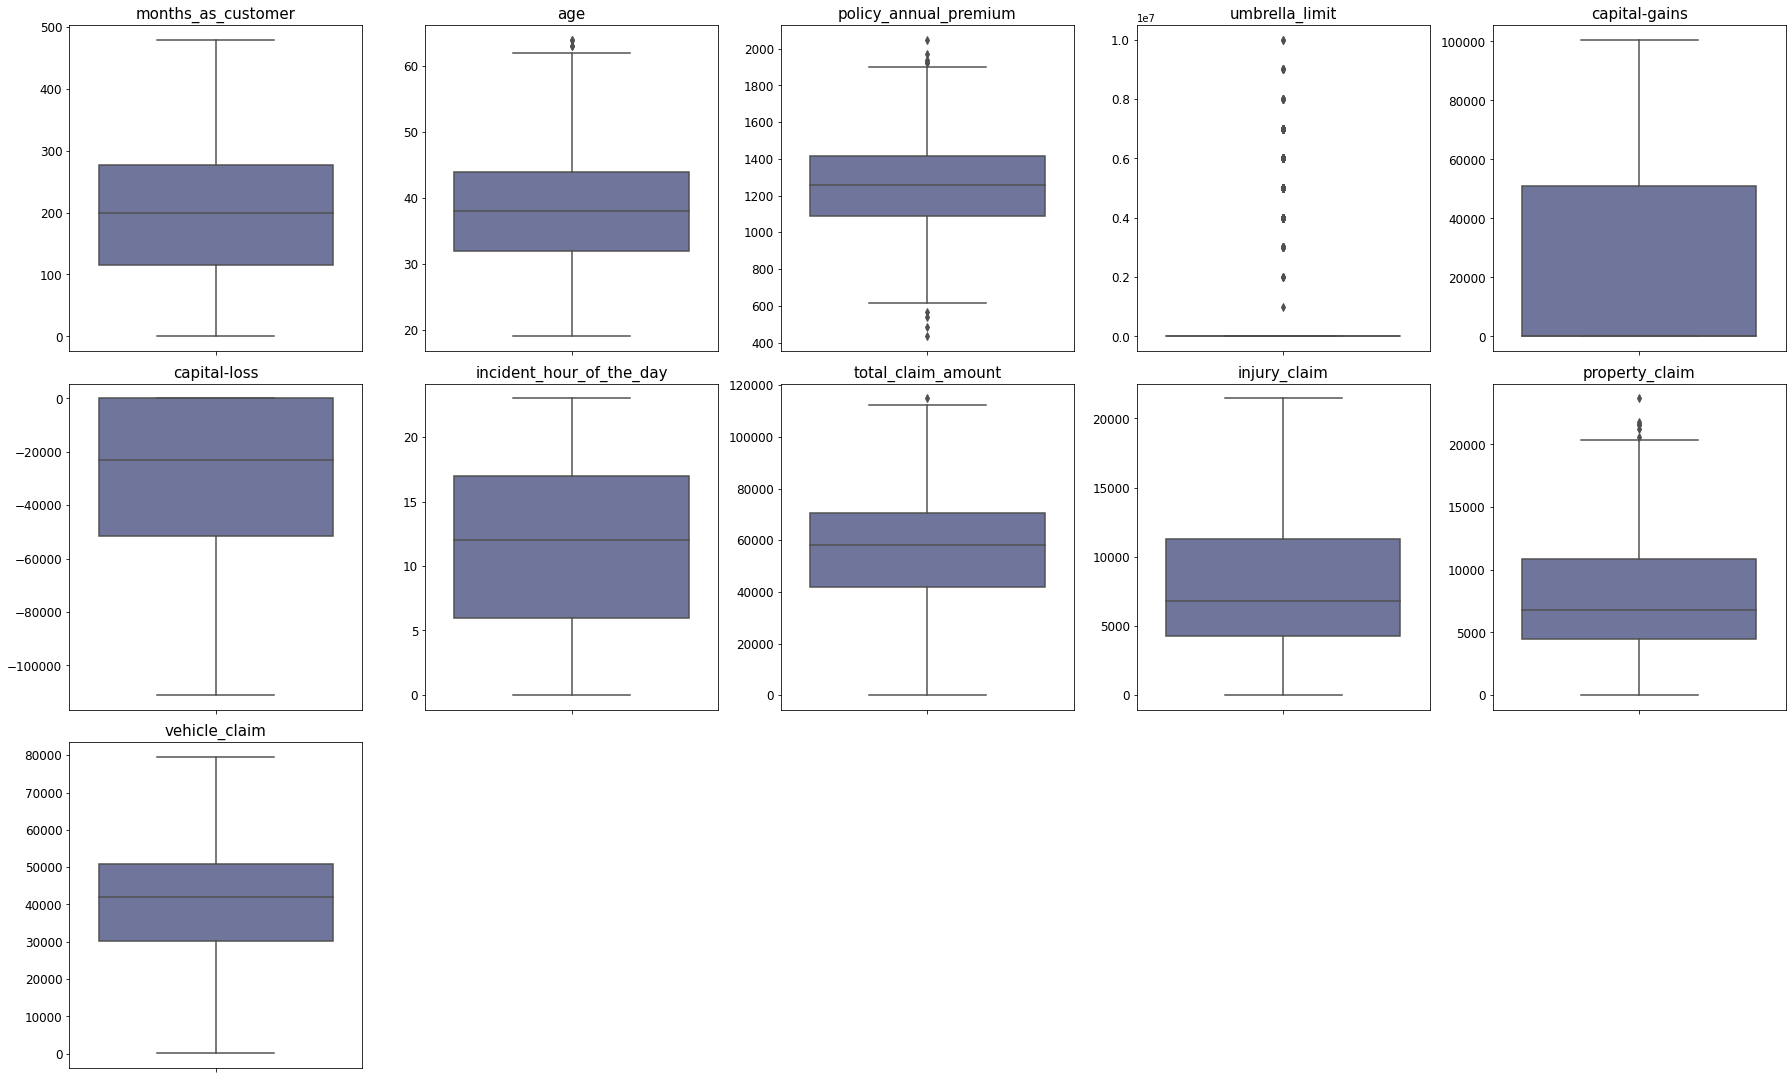

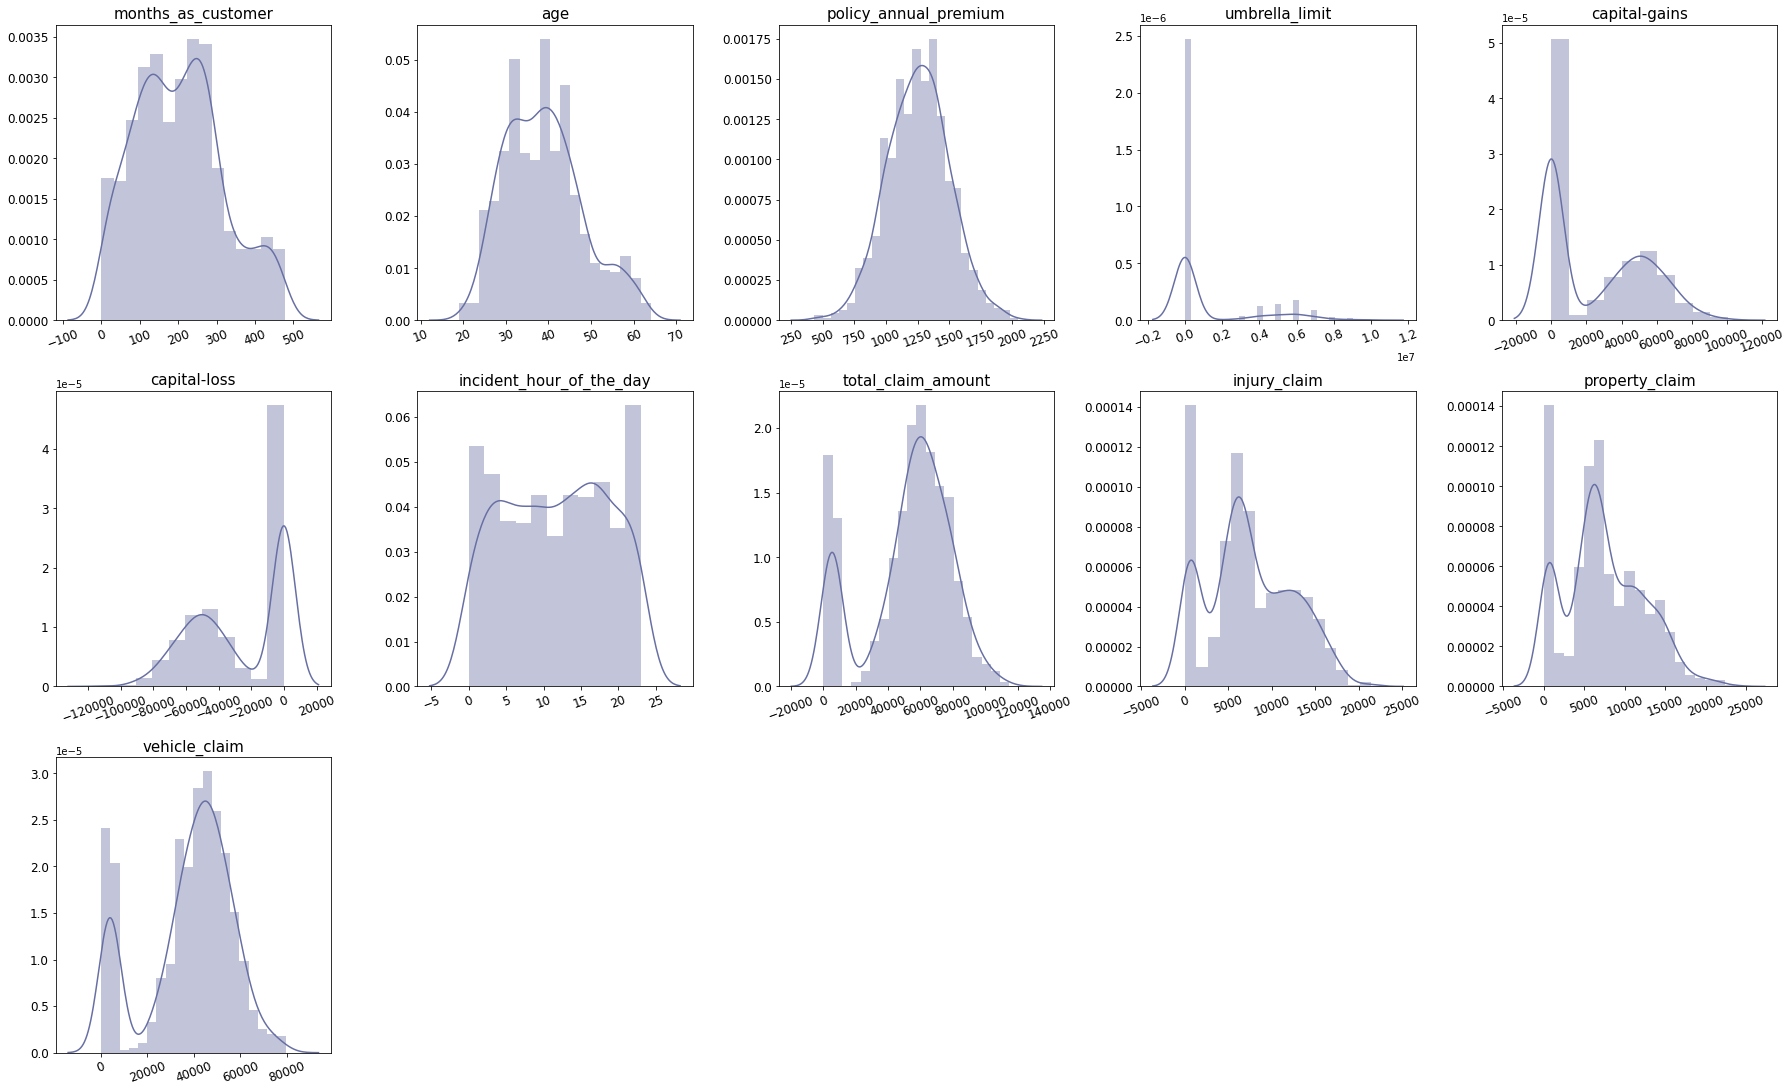

In [18]:
# 'col_continuous' data
fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[col_continuous].columns:
    plt.subplot(5, 5, i)
    ax = sns.boxplot(y = df[col], color = '#676FA3')

    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 15)
    plt.xticks(rotation = 20, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    i += 1
plt.show()

fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[col_continuous].columns:
    plt.subplot(5, 5, i)
    ax = sns.distplot(x = df[col], color = '#676FA3')

    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 15)
    plt.xticks(rotation = 20, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    i += 1
plt.show()

We will examine the distribution of nominal and ordinal data, `col_nominal` and `col_ordinal` lists.

- `incident_type`: small proportion on "Vehicle Theft" and "Parked Car" incidents.
- `collision_type`: "Undocumented" collosion type is smaller than the others.
- `authorities_contacted`: "None" authorities contacted is smaller than the others.
- `incident_state`: mostly, the incidents happen in NY, SC, and WV states.
- `fraud_reported`: 24.7% are fraudulent claims. The class is *imbalanced*. 
- `incident_month`: very small proportion of incidents in "March" because in "March" only contains the 1st date.
- `incident_severity`: small proportion on "zero" (a.k.a "Trivial Damage") incident severity.
- `number_of_vehicles_involved`: very small proportion on "2" and "4" vehicles involved. 

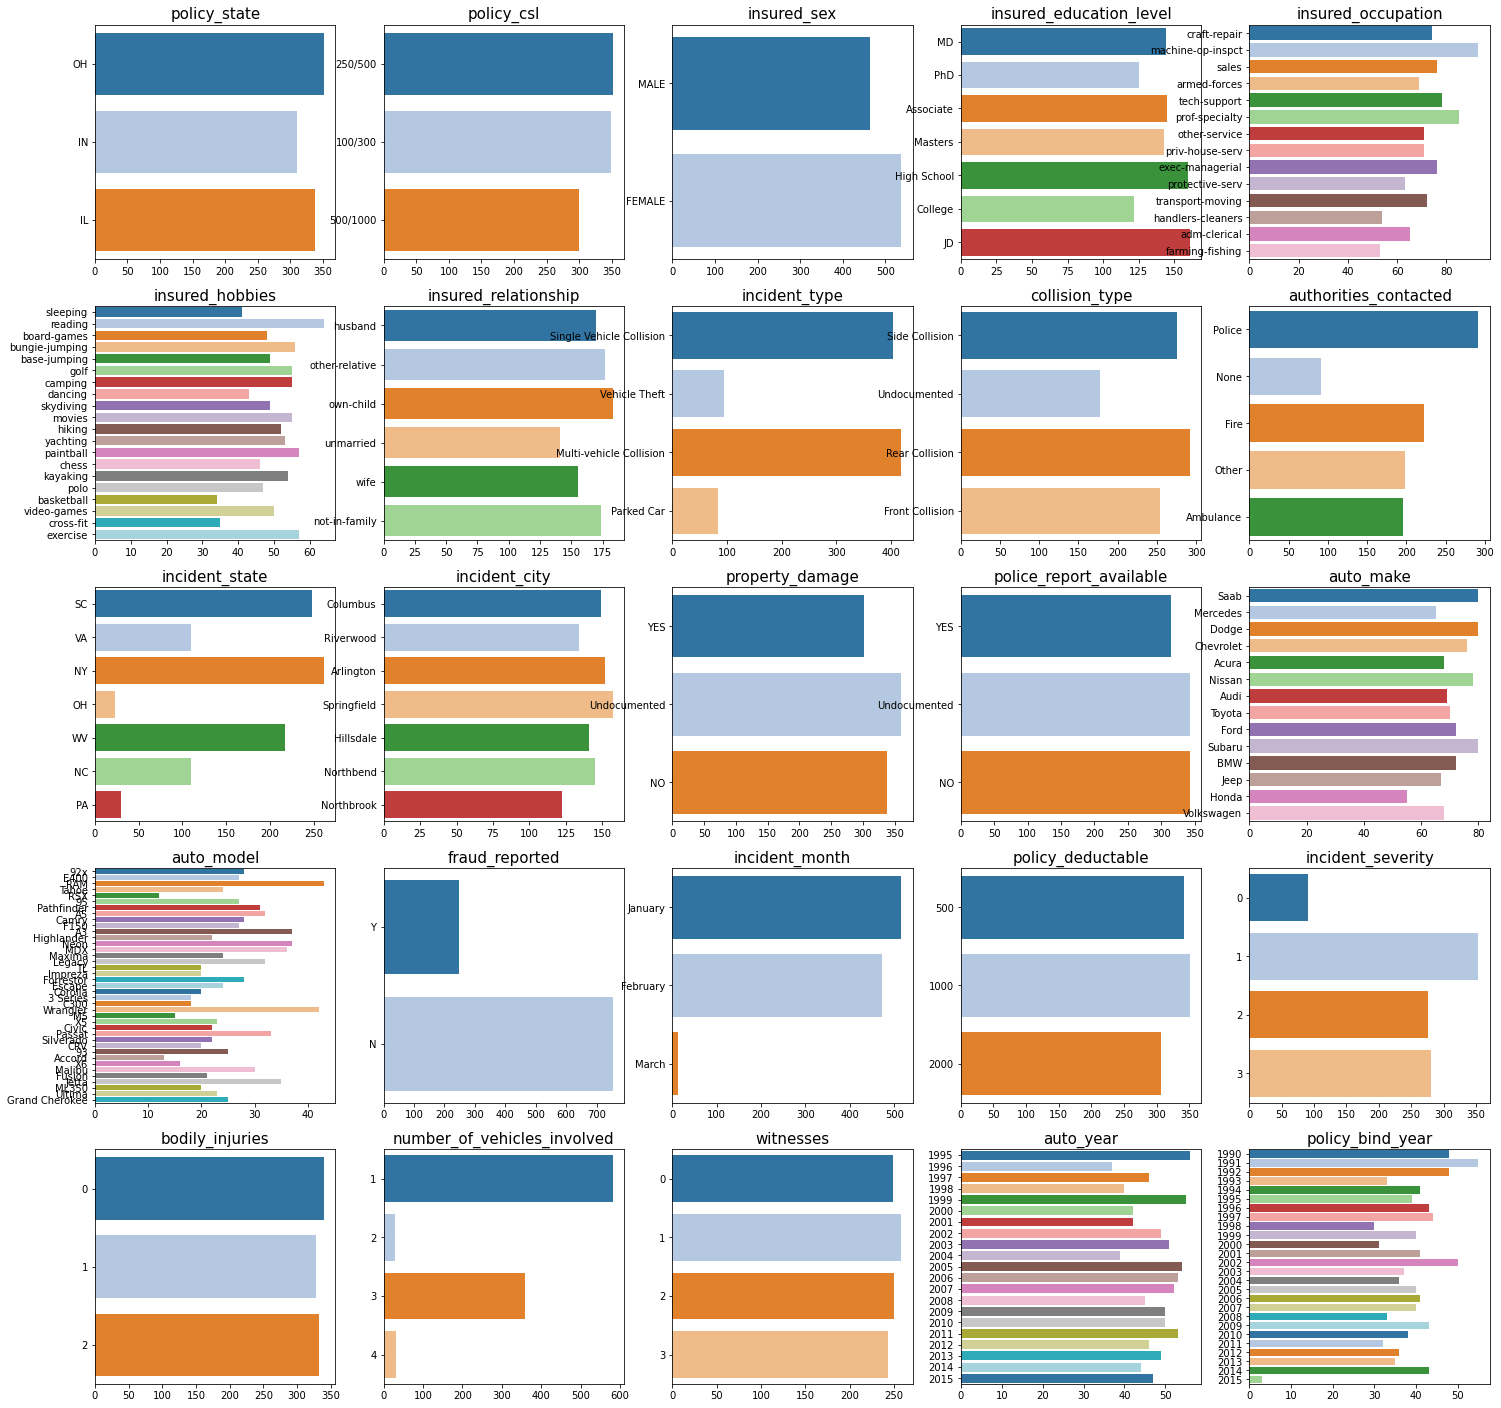

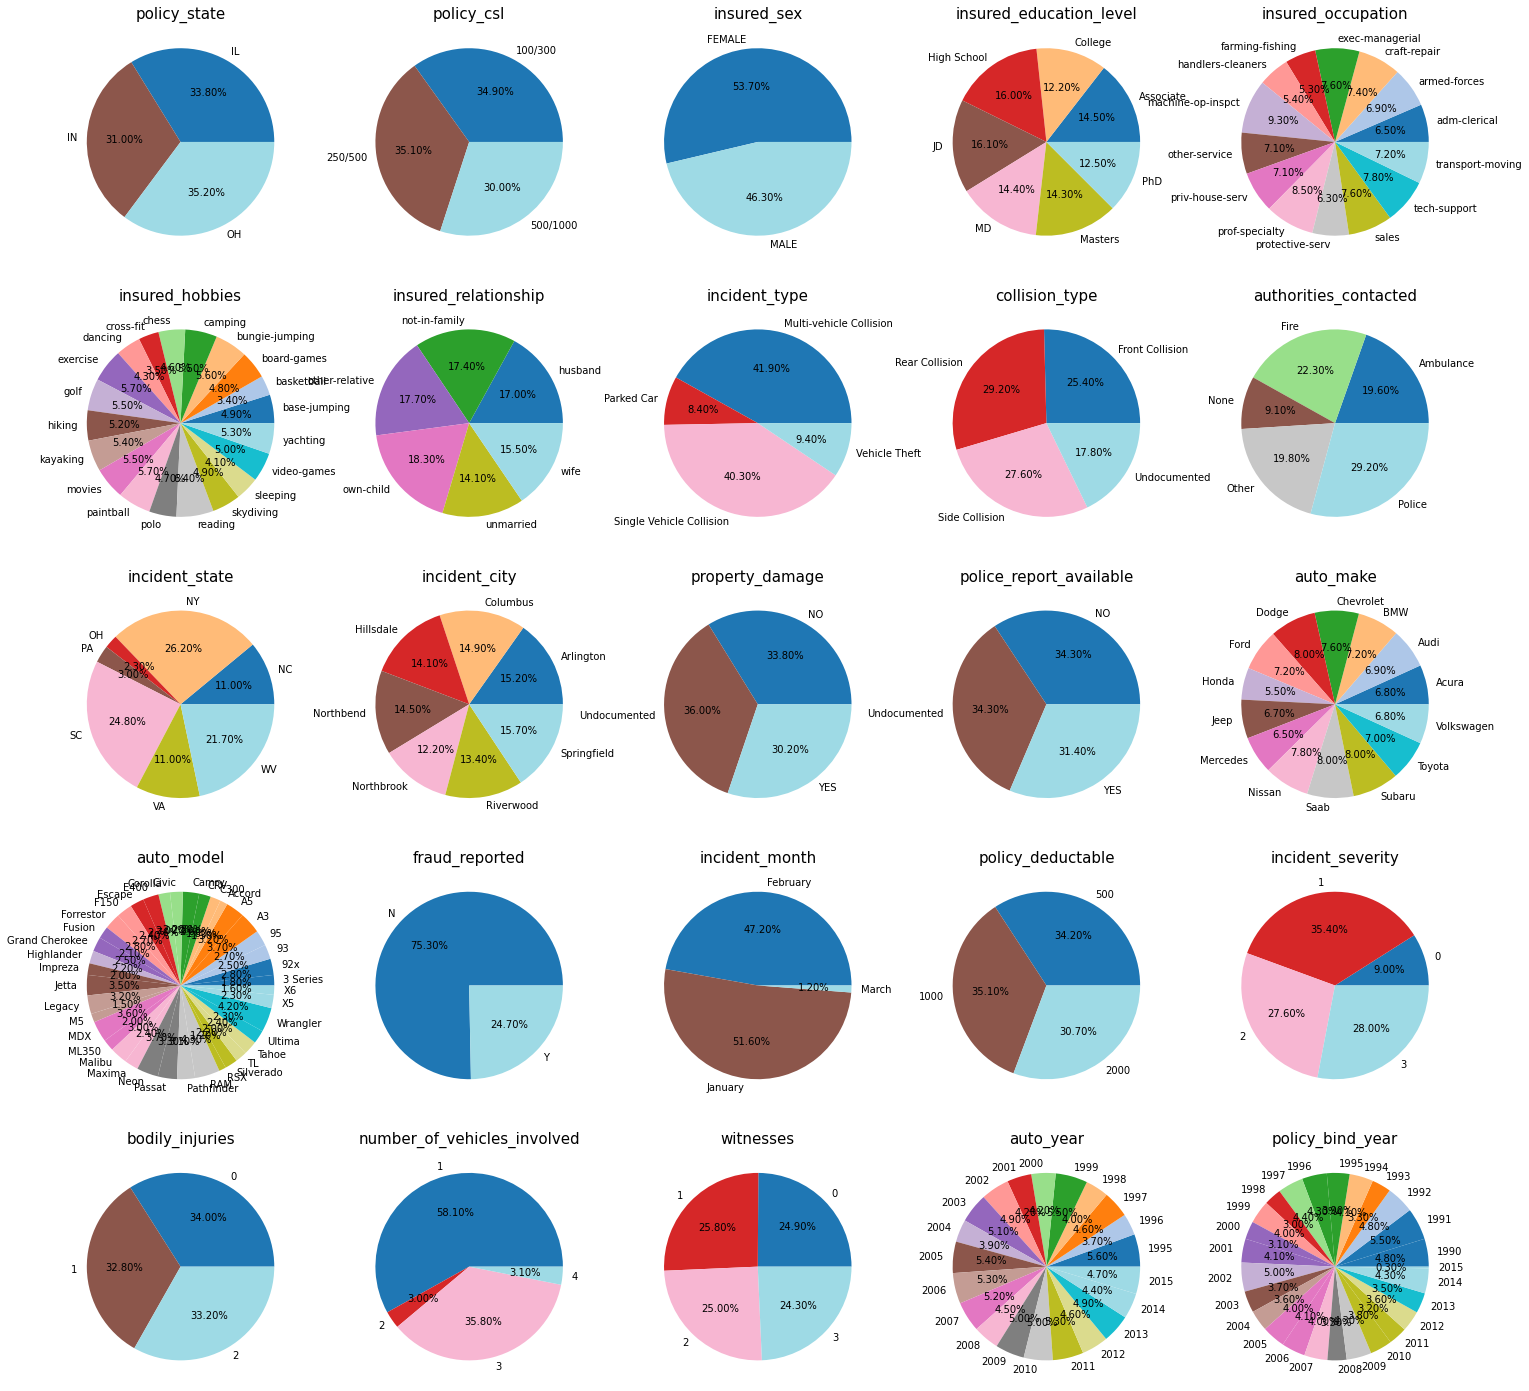

In [19]:
# col_nominal + col_ordinal data
fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[col_nominal + col_ordinal].columns:
    plt.subplot(5, 5, i)
    ax = sns.countplot(data = df[col_nominal + col_ordinal], y = df[col], palette = 'tab20')
    
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 15)
#     plt.xticks(rotation = 20, fontsize = 20)
#     plt.yticks(fontsize = 20)
#     plt.tight_layout()
    i += 1
plt.show()

fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[col_nominal + col_ordinal].columns:
    plt.subplot(5, 5, i)
    ax = df.groupby([col]).size().plot(kind = 'pie', autopct = '%.2f%%', colormap = 'tab20')
    
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 15)
    i += 1
plt.show()

### Feature selection

Since our dataset has large number of features, we need to select only the important features. This will make our EDA more focusing on relevant features and boost the performance of machine learning model since we will remove the redundant features. This process is called as feature selection. [[4]](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

We would like to examine the relationship between every predictor variables against the dependent variable, that is `fraud_reported`.
- For the `col_continuous` variables, we will use pearson correlation and ANOVA Test. 
- For the `col_nominal` and `col_ordinal`, we will use Chi-Squared Test.

#### Pearson Correlation of continuous variables

Insights:
- `months_as_customer` and `age` have a correlation of `0.92`. Perhaps because of drivers bought auto insurance when they bought a car. Hence, the increment of age also will increase the number of months as customer.
- Apart from that, all the claims are all correlated each other. These seem to be reasoneable, eventually `total_claim_amount` is the sum of `injury_claim`, `vehicle_claim`, `property_claim`. However, these other claims might provide some granularity which is not captured by the total claims. Therefore, we will not drop these columns.

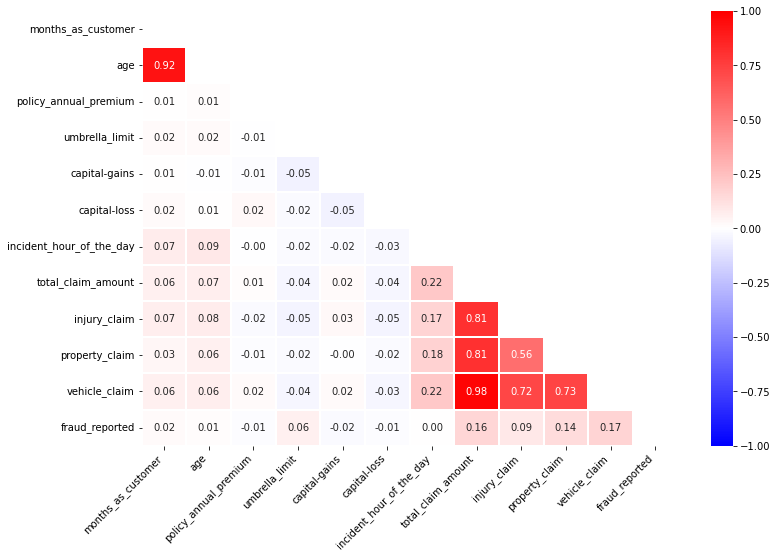

In [20]:
# pearson correlation for continuous variables
fig, ax = plt.subplots(figsize=(12, 8))
num_correlation = pd.concat((df[col_continuous], df.fraud_reported.replace({'N':0, 'Y':1})), axis = 1).corr()
mask = np.zeros_like(num_correlation)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(num_correlation, annot = True, fmt = '.2f', cmap = 'bwr', 
                 linewidths = 0.1,  mask = mask, vmin = -1, vmax = 1)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
plt.show()

#### ANOVA Test of continuous variables

ANOVA is an acronym for "analysis of variance" and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not. Importantly, ANOVA is used when one variable is numerical and one is categorical, such as numerical input variables and a classification target variable in a classification task. [[5]](https://machinelearningmastery.com/feature-selection-with-numerical-input-data/)

The results of ANOVA Test can be used for feature selection where those "continuous features" that are **independent** of the "target variable" can be removed from the dataset.

While conducting the ANOVA Test, There will be 2 hypotheses i.e the Null Hypothesis and the Alternate Hypothesis.
1. H0 (Null Hypothesis): All the sample means are equal, or they don’t have any significant difference (**independent**).
2. H1 (Alternate Hypothesis): At least one sample mean are different from others, or they have significant difference (**dependent**).

One of the results of the test is p-value where this value can be interpreted to reject or fail to reject the assumption or null hypothesis. In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:
1. If p-value <= alpha: significant result, reject null hypothesis (H0) &rarr; **dependent**.
2. If p-value > alpha: not significant result, fail to reject null hypothesis (H0) &rarr; **independent**.

In [21]:
# helper function to perform ANOVA test
import pingouin
def ANOVA_test(df, columns, target, alpha = 0.05):
    p_value = []
    result = []
    temp = []
    for col in columns:
        anova_results = pingouin.anova(data = df, dv = col, between = target)
        p = anova_results['p-unc'][0]
        temp.append(col)
        
        # assign the result 
        if abs(p) <= alpha:
            result.append('reject H0')
        else:
            result.append('fail to reject H0')
            
        # assign the p-value
        p_value.append(p)
    return pd.DataFrame({'p_value':p_value, 'result':result}, index = temp)

In [22]:
# perform ANOVA test on continuous data
ANOVA_results = ANOVA_test(df, col_continuous, 'fraud_reported', alpha = 0.05)
ANOVA_results

p_value             result
months_as_customer        5.164037e-01  fail to reject H0
age                       7.013189e-01  fail to reject H0
policy_annual_premium     6.474290e-01  fail to reject H0
umbrella_limit            6.605811e-02  fail to reject H0
capital-gains             5.447871e-01  fail to reject H0
capital-loss              6.387475e-01  fail to reject H0
incident_hour_of_the_day  8.915769e-01  fail to reject H0
total_claim_amount        1.952936e-07          reject H0
injury_claim              3.986262e-03          reject H0
property_claim            1.218941e-05          reject H0
vehicle_claim             6.297261e-08          reject H0

In [23]:
# select the significant predictor variables
col_continuous_significant = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']
col_continuous_significant

['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

Insights:
- The significant variables are `total_claim_amount`, `injury_claim`, `property_claim`, and `vehicle_claim`. These variables have p-value less than the significant level alpha, 0.05. Therefore, we can reject the null hypothesis and retain these significant variables.

#### Chi-Squared Test of nominal and ordinal variables

Chi-Squared Test is a statistical test which is used to find out the difference between the observed and the expected data and we can also use this test to find the relationship between categorical (nominal and ordinal) variables in our data. The purpose of this test is to determine if the difference between 2 categorical variables is due to chance, or if it is due to a relationship between them. [[6]](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)[[7]](https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/)

The results of Chi-Squared Test can be used for feature selection where those "categorical features" that are **independent** of the "target variable" can be removed from the dataset.

While conducting the Chi-Squared Test, we have to initially consider 2 hypotheses i.e the Null Hypothesis and the Alternate Hypothesis.
1. H0 (Null Hypothesis): The 2 variables to be compared are **independent**, if the observed and expected frequencies are similar.
2. H1 (Alternate Hypothesis): The 2 variables to be compared are **dependent**, if the observed and expected frequencies are dissimilar.

The result of the test is a test statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same. In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:
1. If p-value <= alpha: significant result, reject null hypothesis (H0) &rarr; **dependent**.
2. If p-value > alpha: not significant result, fail to reject null hypothesis (H0) &rarr; **independent**.

Or we can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:
1. If Statistic >= Critical Value: significant result, reject null hypothesis (H0) &rarr; **dependent**.
2. If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0) &rarr; **independent**.

In [24]:
# helper function to perform chi-squared test
from scipy.stats import chi2_contingency, chi2
def chi_squared_test(df, crosstab_table, prob = 0.95):
    result = crosstab_table.copy()
    p_value = crosstab_table.copy()
    for index in crosstab_table.index:
        for column in crosstab_table.columns:
            # contingency table
            temp_table = pd.crosstab(df[index], df[column])
            
            # perform Chi-Squared Test from contingency table
            stat, p, dof, expected = chi2_contingency(temp_table)
            
            # compute the critical value
            critical = chi2.ppf(prob, dof)
            
            # assign the result 
            if abs(stat) >= critical:
                result.loc[index, column] = 'reject H0'
            else:
                result.loc[index, column] = 'fail to reject H0'
            
            # assign the p-value
            p_value.loc[index, column] = p
    return result, p_value

In [25]:
# perform chi-squared test on nominal and ordinal data
crosstab_table = pd.crosstab(df[col_nominal + col_ordinal + ['fraud_reported']].columns, 
                             df[col_nominal + col_ordinal + ['fraud_reported']].columns)
result, p_value = chi_squared_test(df, crosstab_table, prob = 0.95)

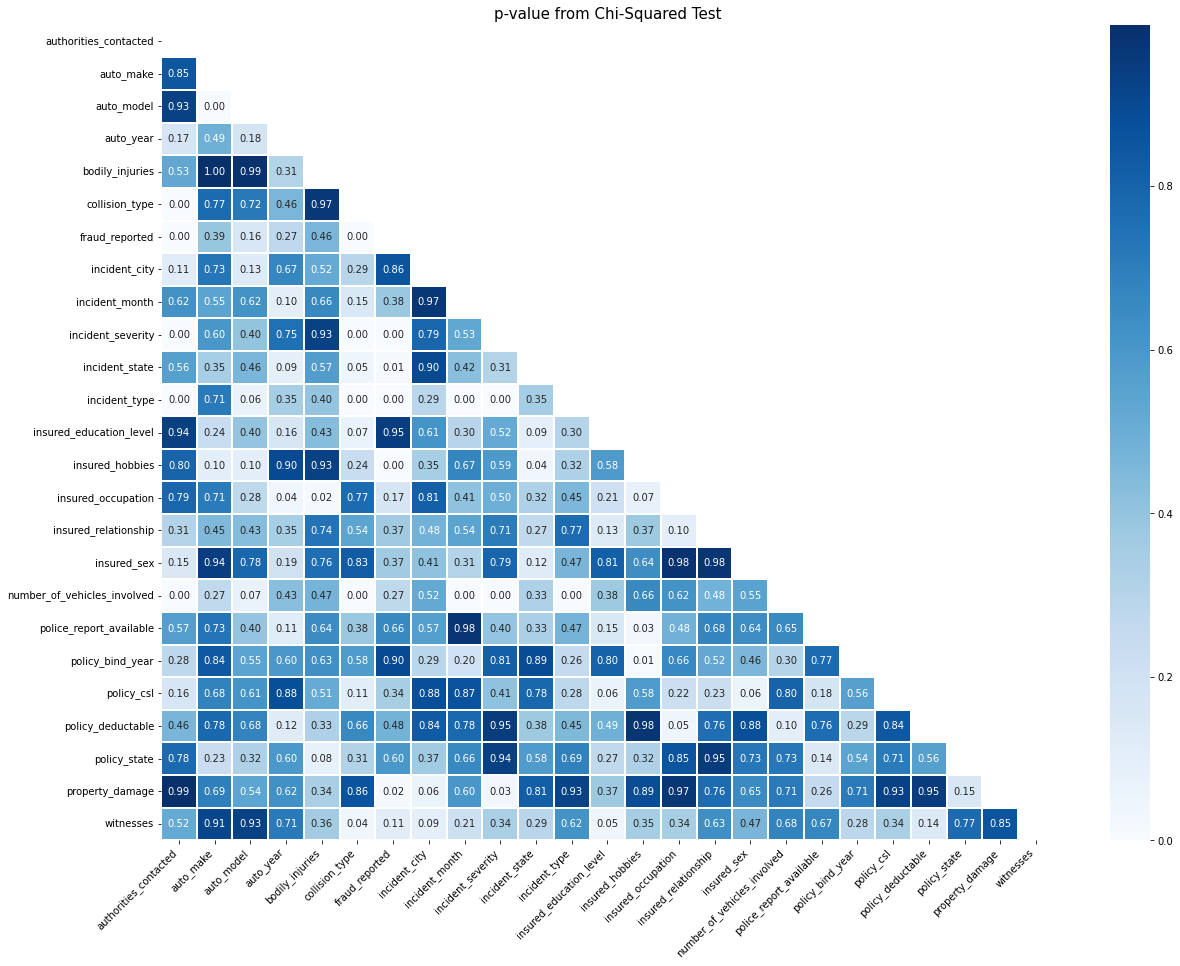

In [26]:
# plot 'p_value' with heatmap 
fig, ax = plt.subplots(figsize=(20, 15))

mask = np.zeros_like(p_value)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(p_value, annot = True, fmt = '.2f', cmap = 'Blues', linewidths = 0.1,  mask = mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
ax.set(xlabel = None, ylabel = None)
plt.title('p-value from Chi-Squared Test', size = 15)
plt.show()

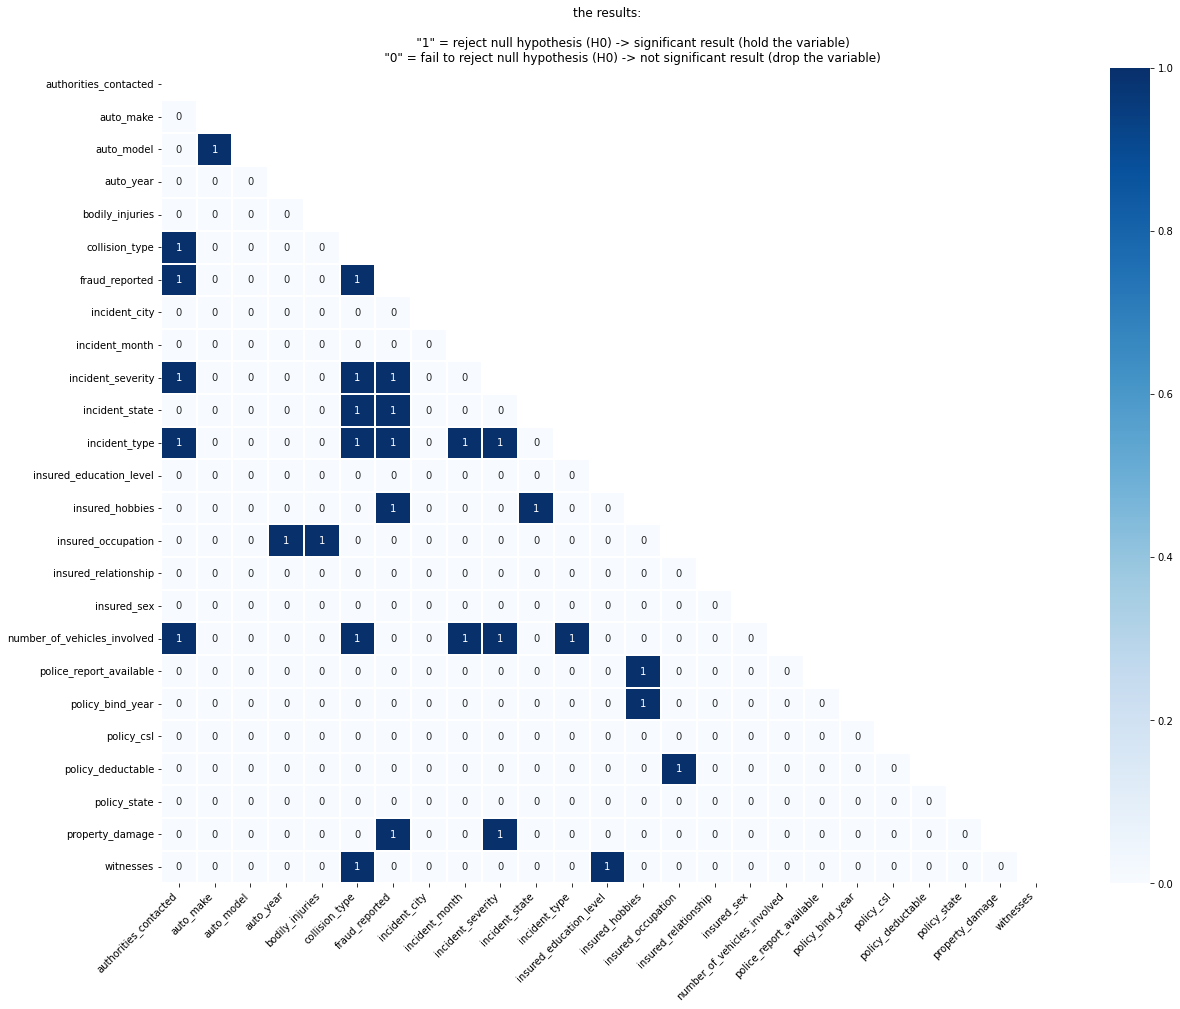

In [27]:
# plot 'result' with heatmap 
fig, ax = plt.subplots(figsize=(20, 15))

mask = np.zeros_like(result == 'reject H0')
mask[np.triu_indices_from(mask)] = True
sns.heatmap(result == 'reject H0', annot = True, fmt = '.0f', cmap = 'Blues', linewidths = 0.1,  mask = mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
ax.set(xlabel = None, ylabel = None)
plt.title('''the results:\n
             "1" = reject null hypothesis (H0) -> significant result (hold the variable)
             "0" = fail to reject null hypothesis (H0) -> not significant result (drop the variable)''')
plt.show()

In [28]:
# select the significant predictor variables
temp = (result == 'reject H0').loc['fraud_reported',:]
temp = list(temp[temp].index)
temp.remove('fraud_reported')

col_nominal_significant = [col for col in col_nominal if col in temp]
print(sorted(col_nominal_significant))
col_ordinal_significant = [col for col in col_ordinal if col in temp]
print(sorted(col_ordinal_significant))

['authorities_contacted', 'collision_type', 'incident_state', 'incident_type', 'insured_hobbies', 'property_damage']
['incident_severity']


**Insights**:
- The significant variables are `authorities_contacted`, `collision_type`, `incident_state`, `incident_type`, `insured_hobbies`, `property_damage`, and `incident_severity`. These variables have p-value less than the significant level alpha, 0.05. Therefore, we can reject the null hypothesis and retain these significant variables.

## Deep-dive EDA

We will cover the EDA for significant variables, i.e. `col_nominal_significant`, `col_ordinal_significant`, and `col_continuous_significant`.

We will answer some general question such as:
- What are the states with the highest fraud rate?
- What are the insured hobbies with the highest fraud rate?
- How is the distribution of claim amount for fraudster and non-fraudster?
- How is the claim amount performance over time?
- etc.

### Distribution of continuous data for fraud and non-fraud claims

- Overall, mean and median of the claim amounts (i.e. `total_claim_amount`, `injury_claim`, `property_claim`, and `vehicle_claim`) are higher for fraudulent claims.
- The IQR of `total_claim_amount`, `injury_claim`, `property_claim`, and `vehicle_claim` for fraudulent claims are more narrow than the non-fraudulent claims.
- `total_claim_amount`: The lower whisker for fraudulent claim is shorter than non-fraudulent claim. For fraudulent claim, the lower whisker reaches about 20000 USD. The tendency of non-fraudulent claim is likely to happen when the total claim amount is below 21000 USD.
- `vehicle_claim`: The lower whisker for fraudulent claim is also shorter for this variable (reaches about 20000 USD). Perhaps this variable contributes a lot in determining of someone committing to fraud, particularly when the vehicle claim reaching over 20000 USD.

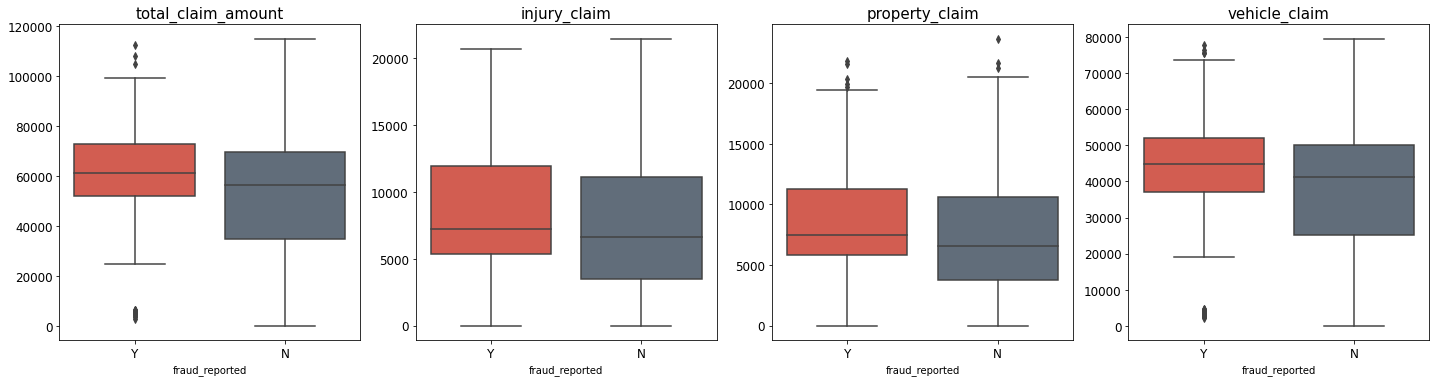

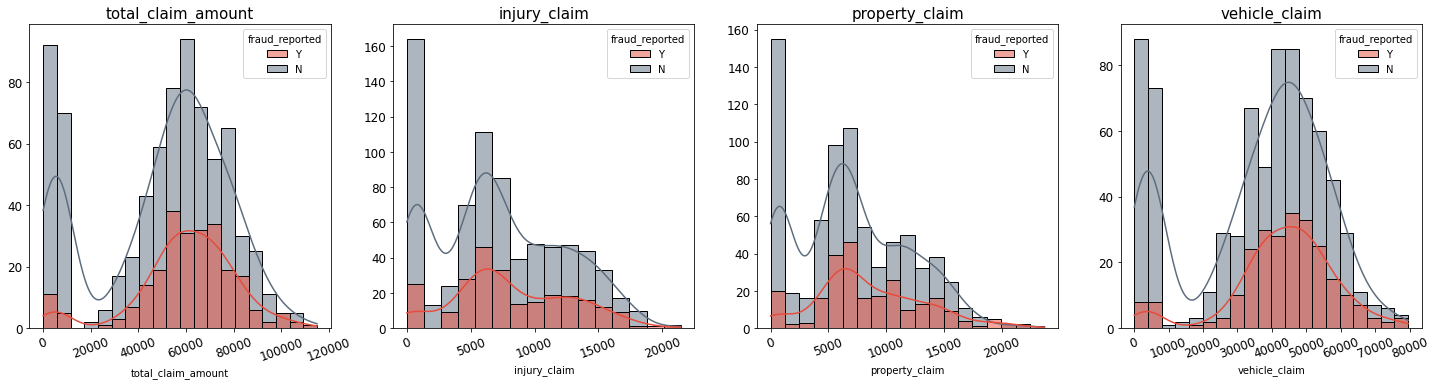

total_claim_amount  injury_claim  property_claim  \
fraud_reported                                                     
N                     50288.605578   7179.229748     7018.884462   
Y                     60302.105263   8208.340081     8560.121457   

                vehicle_claim  
fraud_reported                 
N                36090.491368  
Y                43533.643725

In [29]:
# 'col_continuous_significant' data
fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[col_continuous_significant].columns:
    plt.subplot(5, 5, i)
    ax = sns.boxplot(y = df[col], x = df['fraud_reported'], palette = ['#E74C3C', '#5D6D7E'])

    ax.set(ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 15)
    plt.xticks(rotation = 0, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    i += 1
plt.show()

fig = plt.figure(figsize = (25, 25))
i = 1
for col in df[col_continuous_significant].columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = df[col], hue = df['fraud_reported'], palette = ['#E74C3C', '#5D6D7E'], kde = True)
    
    ax.set(ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 15)
    plt.xticks(rotation = 20, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    i += 1
plt.show()

df[col_continuous_significant + ['fraud_reported']].groupby('fraud_reported').agg('mean')

### Distribution of nominal and ordinal data for fraud and non-fraud claims

- `insured_hobbies`: The tendency of fraudulent claim is more likely to happen for chess player and cross-fitters. This is surprising a lot. Does a particular hobby make someone committing of doing fraudulent claims? or is fraudster likely to love in particular hobby? This seems to be the hardest question to answer.
- `incident_type`: The distribution across all categories are relatively the same as the previous plot where on both fraudulent claims and not, only very few incidents are due to "Vehicle Theft"/"Parked Car" and the most incidents are due to "Multi-vehicle Collision"/"Single Vehicle Collision".
- `collision_type`: "Undocumented" collision type contributes very least for fraudulent claims compared to the other categories whereas the "Rear Collision" contributes the most. 
- `authorities_contacted`: "None" authorities contacted contributes very least for fraudulent claims whereas the others seem to contribute relatively even.
- `incident_state`: For fraudulent claims, most of the incidents happen in "SC" state, then followed by "NY" and "WV" whereas for non-fraudulent claims, most of the incidents happen in "NY" state, then followed by "WV" and "SC".
- `property_damage`: "Undocumented" property damage contributes the most for fraudulent claims. More aware on "Undocumented" property damage.
- `incident_severity`: "Major Damage" incident severity contributes the most for fraudulent claims which exceed non-fraudulent claims. More aware on "Major Damage" incident severity.

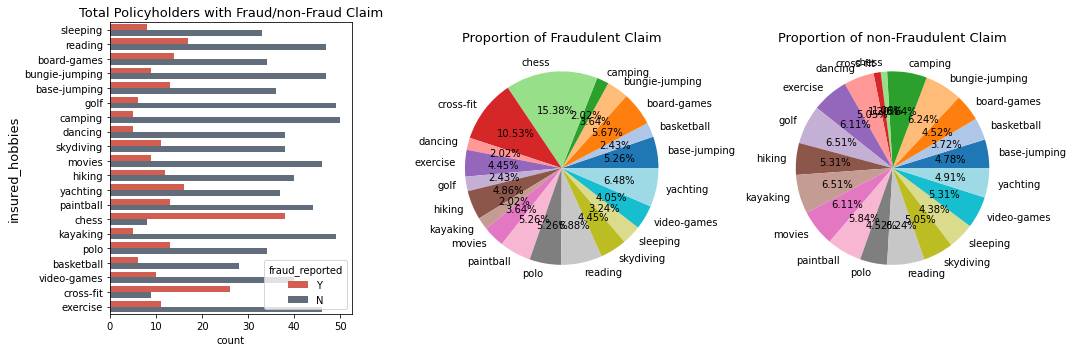

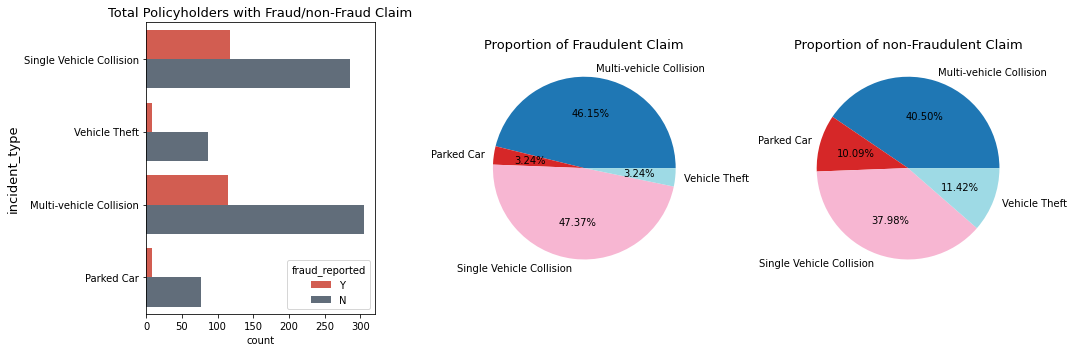

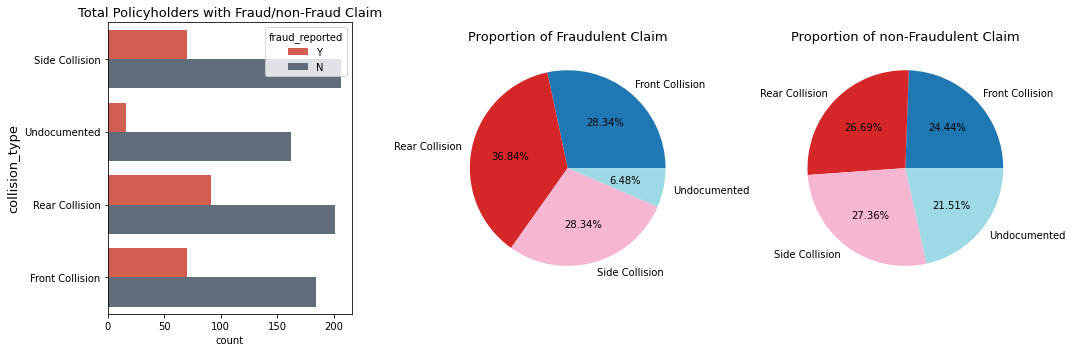

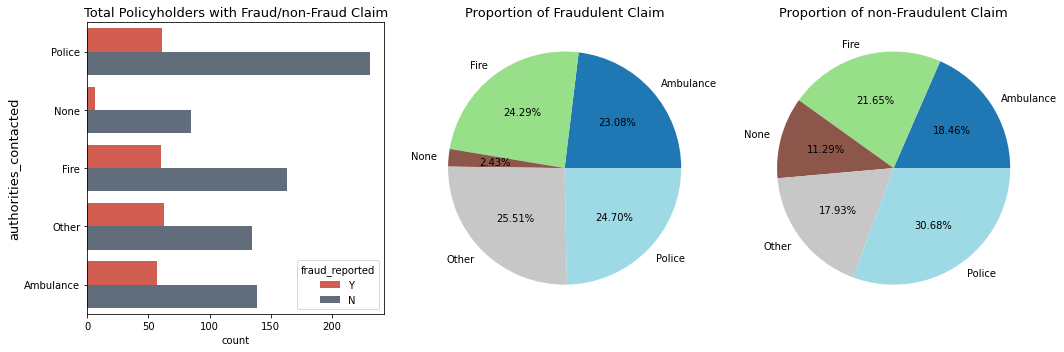

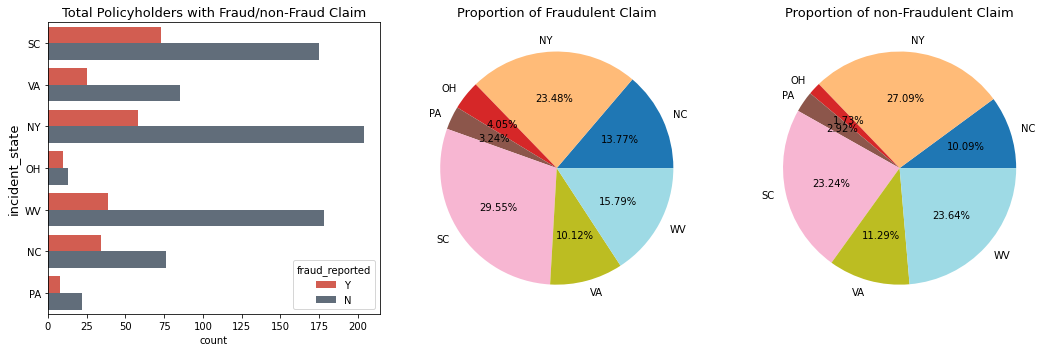

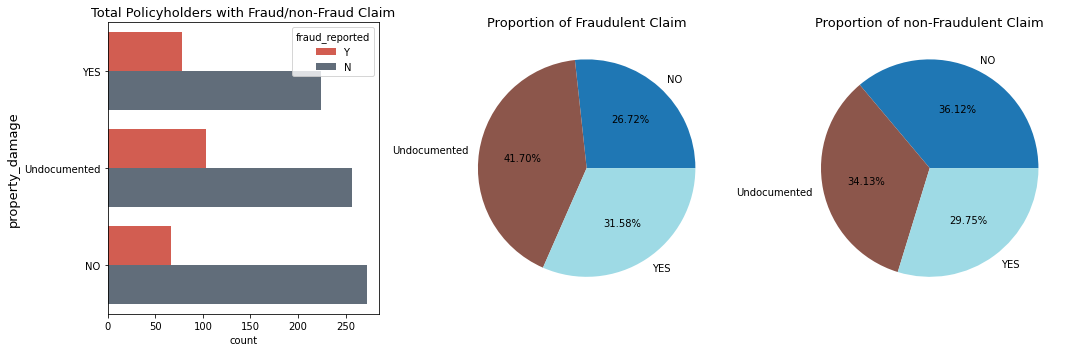

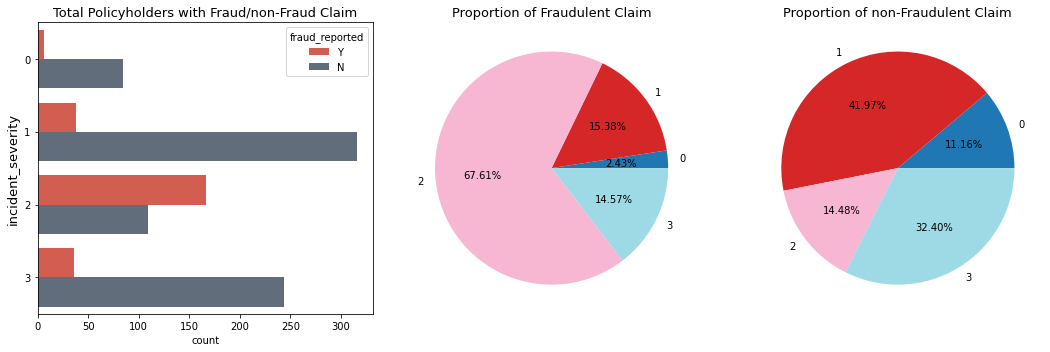

In [30]:
# 'col_nominal_significant' and 'col_ordinal_significant' data
for col in df[col_nominal_significant + col_ordinal_significant].columns:
    fig, ax = plt.subplots(figsize = (15, 5), ncols = 3, nrows = 1)
    
    # plot 1: countplot
    sns.countplot(data = df, y = df[col], hue = 'fraud_reported', ax = ax[0], palette = ['#E74C3C', '#5D6D7E'])
    ax[0].set_title('Total Policyholders with Fraud/non-Fraud Claim', loc = 'center', fontsize = 13)
    ax[0].set_ylabel(str(col), fontsize = 13)
    
    # plot 2: proportion of profit
    _ = df[df['fraud_reported'] == 'Y']
    _.groupby([col]).size().plot(kind = 'pie', autopct = '%.2f%%', ax = ax[1], colormap = 'tab20')
    ax[1].set(xlabel = None, ylabel = None)
    ax[1].set_title('Proportion of Fraudulent Claim', loc = 'center', fontsize = 13)
    
    # plot 3: proportion of loss
    _ = df[df['fraud_reported'] == 'N']
    _.groupby([col]).size().plot(kind = 'pie', autopct = '%.2f%%', ax = ax[2], colormap = 'tab20')
    ax[2].set(xlabel = None, ylabel = None)
    ax[2].set_title('Proportion of non-Fraudulent Claim', loc = 'center', fontsize = 13)
    
    plt.tight_layout()
    plt.show()

### Distribution of fraud rate for every nominal variables

- `insured_hobbies`: chess players and cross-fitters are very high risk at committing to fraud. Fraud analyst should focus on analyzing this policyholder's hobby. Especially,  as the highest average total claim, vehicle claim, and incident severity are from cross-fitters.
- `incident_type`: "Single Vehicle Collision" and "Multi-vehicle Collision" incident types have higher average claim. This seems reasonable because the average incident severity is also more severe for those incident types. Higher incident severity leads higher average claim. 
- `collision_type`: Average claim amount is relatively even for collision from "Rear", "Side", and "Front" while "Undocumented" collision type has the lowest average claim amount. "Undocumented" collision type also has the lowest fraud rate.
- `authorities_contacted`: "Other" authorities contacted are very high risk at committing to fraud whereas "None" authorities contacted are low risk at committing to fraud.
- `incident_state`: "OH" state has the highest fraud rate then followed by "NC" and "SC". These states are at very high risk of fraudulent claims. The least incidents happened in "OH" but the fraud rate is very high. For "OH" state, the average injury claim amount given is relatively high also the average incident severity, probably the fraudsters are grossly exaggerated their injury and incident severity in order to receive high amount of claim.
- `property_damage`: "Undocumented" property damage has the highest fraud rate.

In [31]:
# create new column for numerical fraud status
df['fraud_reported_encoded'] = df['fraud_reported'].replace({'Y':1, 'N':0})

# create new column for counting the number of policyholders
df['number_of_policyholder'] = 1

In [32]:
def dual_axis_analysis(df, group, primary, secondary, title, figure_size):
    columns = 2
    rows = int(len(primary)/2)
    fig, ax = plt.subplots(figsize = figure_size, nrows = rows, ncols = columns)
    i = 0
    for row in range(rows):
        for col in range(columns):
            temp_1 = df.groupby(group).agg({list(primary.keys())[i]:list(primary.values())[i]})
            temp_1.columns = ['target']
            temp_1 = temp_1.sort_values(by = 'target', ascending = False)            
            temp_2 = df.groupby(group).agg({list(secondary.keys())[0]:list(secondary.values())[0]}).loc[temp_1.index, :]
            temp_axis = ax[row][col].twinx()
            
            sns.barplot(data = df, x = group, y = list(primary.keys())[i],
                        ax = ax[row][col], palette = 'Blues_r', order = temp_1.index, estimator = list(primary.values())[i])
            temp_2.plot(kind = 'line', 
                        ax = temp_axis, marker = 'o', alpha = 1, color = '#E74C3C', legend = None)
            
            ax[row][col].set(xlabel = None)
            ax[row][col].set_title('{0} ({1})'.format(title[i], group))
            ax[row][col].set_ylabel(list(primary.keys())[i], color = '#154360', fontsize = 10)
            ax[row][col].tick_params(axis = 'y', labelcolor = '#154360')
            temp_axis.set_ylabel('fraud_rate (%)', color = '#E74C3C', fontsize = 10)
            temp_axis.tick_params(axis = 'y', labelcolor = '#E74C3C')
            ax[row][col].set_xticklabels([label for label in temp_1.index], rotation = 30, ha = 'right', fontsize = 8)
            plt.tight_layout()
            i += 1
    plt.show()

======================================================= insured_hobbies =======================================================


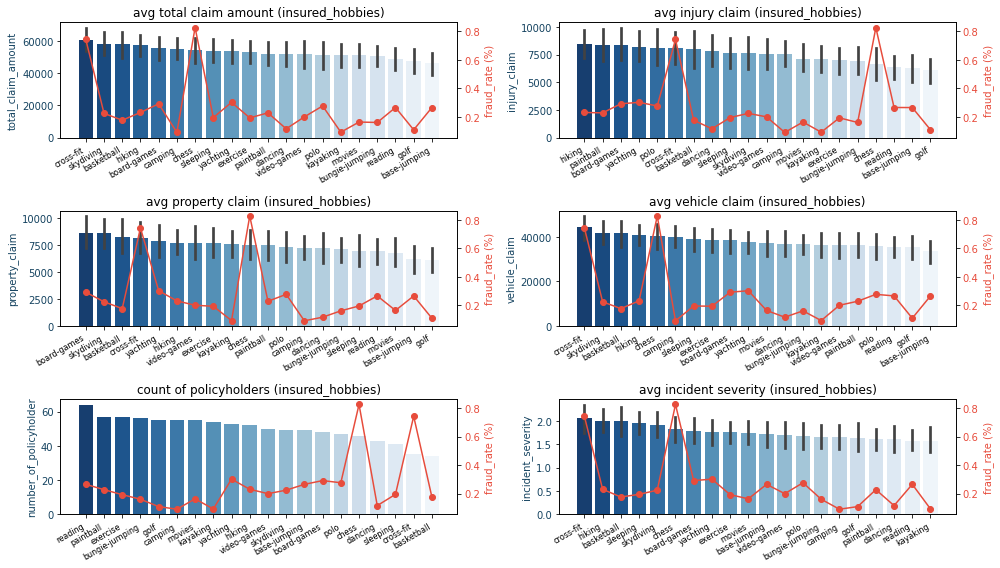

======================================================= incident_type =======================================================


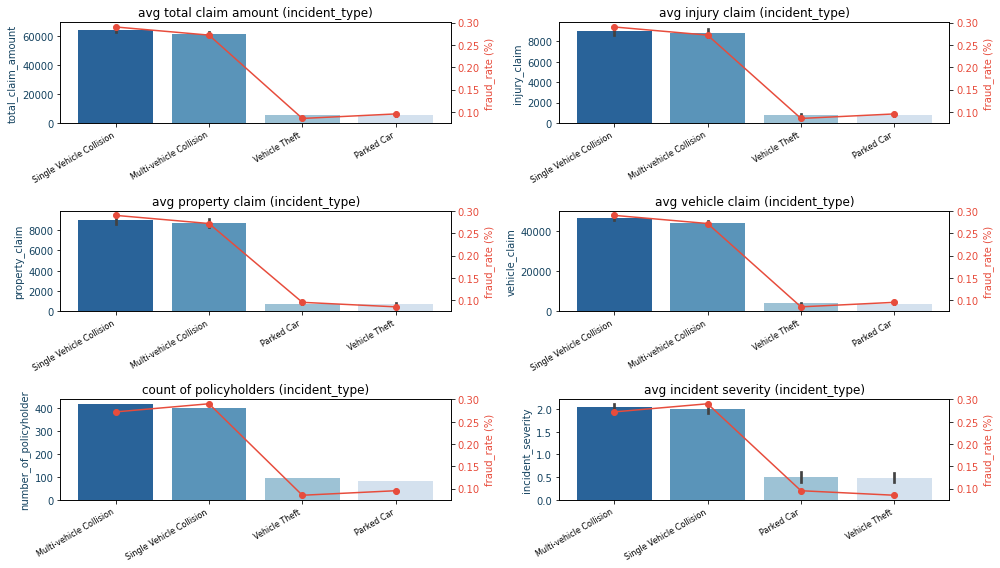

======================================================= collision_type =======================================================


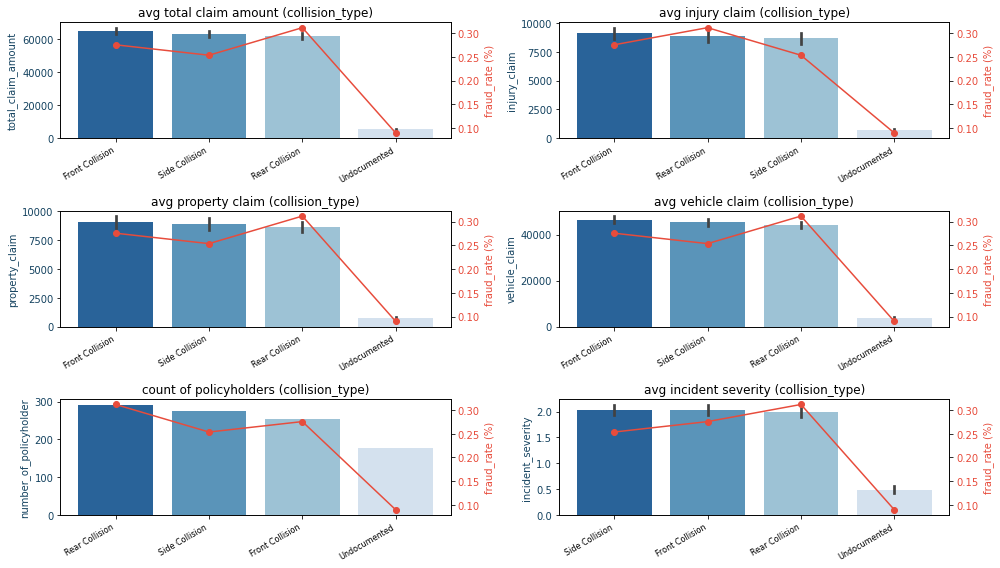

======================================================= authorities_contacted =======================================================


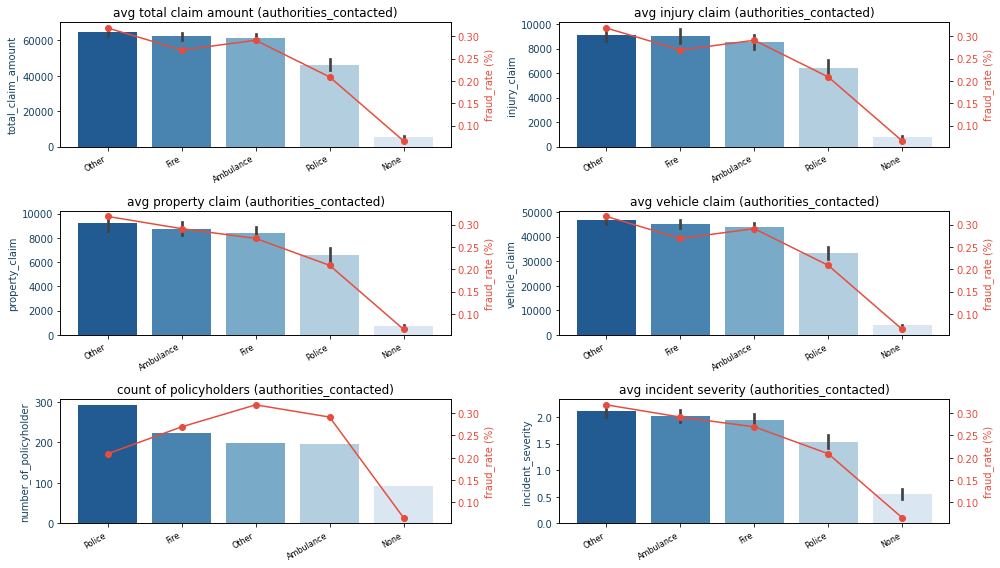

======================================================= incident_state =======================================================


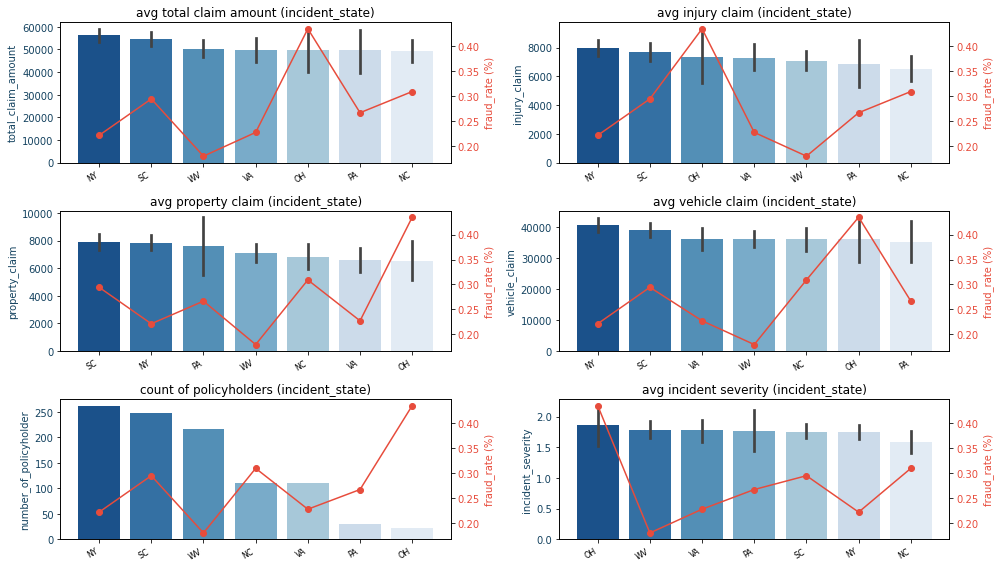

======================================================= property_damage =======================================================


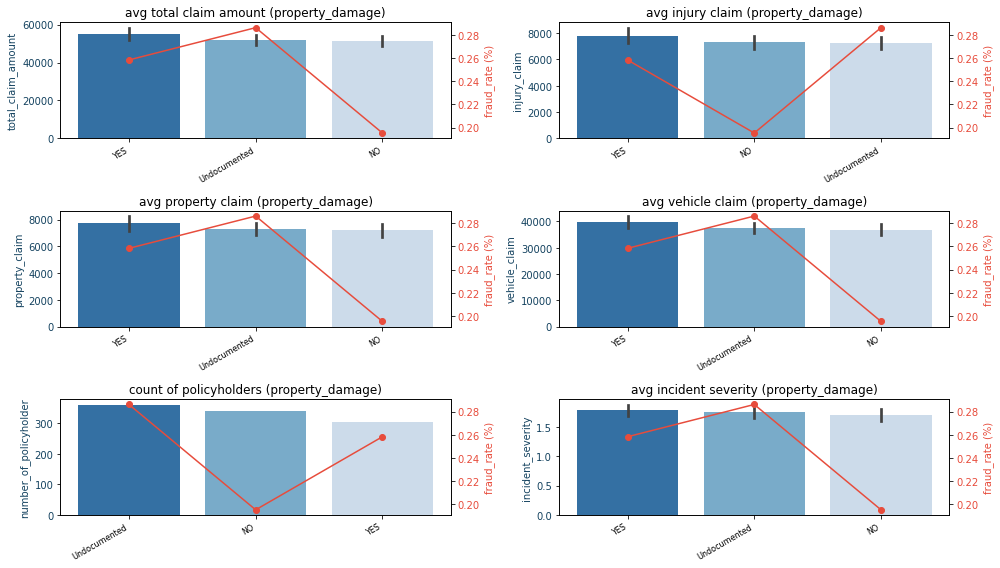

In [33]:
# plot the dual axis graph
primary = {'total_claim_amount':np.mean,
           'injury_claim':np.mean,
           'property_claim':np.mean,
           'vehicle_claim':np.mean,
           'number_of_policyholder':np.count_nonzero,
           'incident_severity':np.mean}
secondary = {'fraud_reported_encoded':np.mean}
title = ['avg total claim amount', 'avg injury claim', 'avg property claim',
         'avg vehicle claim', 'count of policyholders', 'avg incident severity']
for col in col_nominal_significant:
    print('='*55, col, '='*55)
    group = col
    dual_axis_analysis(df = df, 
                       group = group, 
                       primary = primary,
                       secondary = secondary,
                       title = title,
                       figure_size = (14, 8))

### Number of policyholders of incident_severity vs nominal variables

- `insured_hobbies`: There isn't any trend for chess players and cross-fitters, perhaps the incident severity doesn't give much impact on fraud cases for them.
- `incident_type`: "Collision" incident type seems to make more severe accidents.
- `collision_type`: "Undocumented" collision type tend to be less severe. Maybe the drivers think that there is no need to document the collision type since the accidents are only trivial damage.
- `authorities_contacted`: There are no authorities contacted when the collision type is less severe. Maybe the drivers think that there is no need to contact anyone since the accidents are not at major damage.

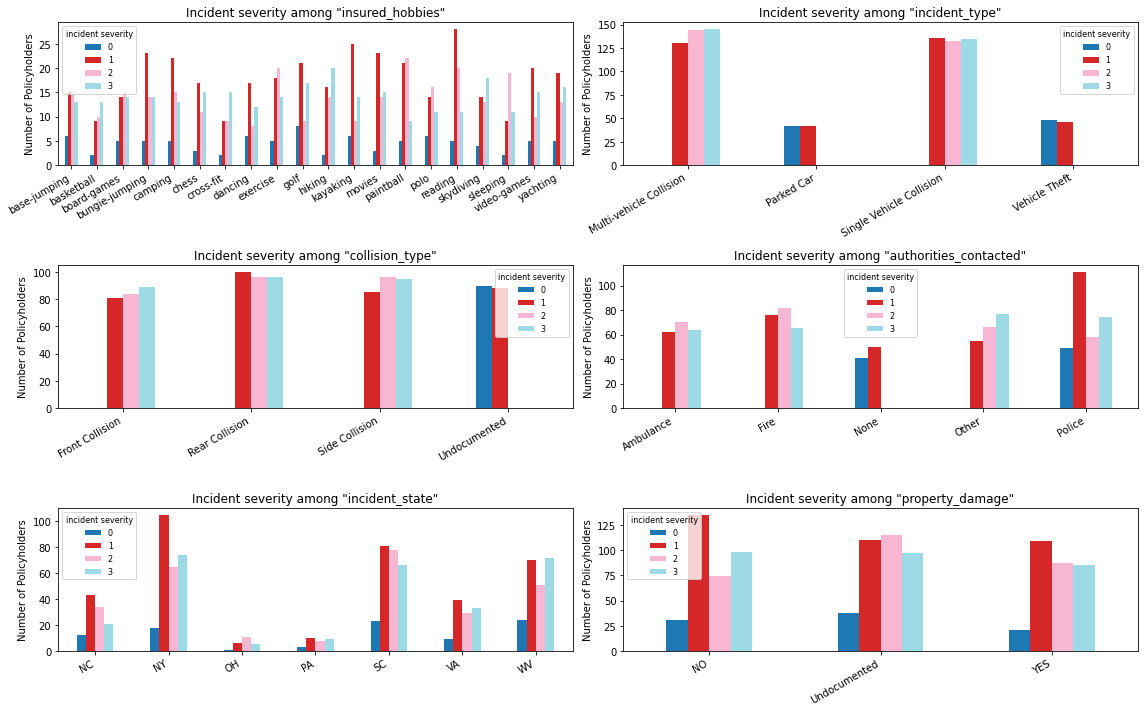

In [34]:
# countplot of each 'col_nominal_significant' against their 'incident_severity'
fig, ax = plt.subplots(figsize = (16, 10))
for i, col in enumerate(col_nominal_significant):
    incident_severity = pd.crosstab(df[col], df['incident_severity'])
    ax = plt.subplot(3, 2, i+1)
    incident_severity.plot(kind = 'bar', colormap = 'tab20', ax = ax)
    plt.title('Incident severity among "{}"'.format(col), fontsize = 12)
    plt.xticks(rotation = 30, size = 10, ha = 'right')
    plt.yticks(size = 10)
    plt.ylabel('Number of Policyholders', size = 10)
    ax.set(xlabel = None)
    ax.legend(title_fontsize = 8, title = 'incident severity', fontsize = 8)
    plt.tight_layout()
plt.show()

### Fraud rate of incident_severity vs nominal variables

- "Major Damage" incident severity seems to be the main issue of fraudulent claims for most of the cases.
- `insured_hobbies`: Chess players' fraud rate are higher for "Trivial Damage" incident severity then followed by "Minor Damage" incident severity, whereas crossfitters' fraud rate are higher for "Minor Damage"  incident severity then followed by "Total Loss" incident severity. The other hobbies have the highest fraud rate on "Major Damage" incident severity.
- `incident_state`: There is no "Trivial Damage" and "Minor Damage" incident severity on "OH" state. This is one of the reason of why is the highest average incident severity happening on "OH" state.

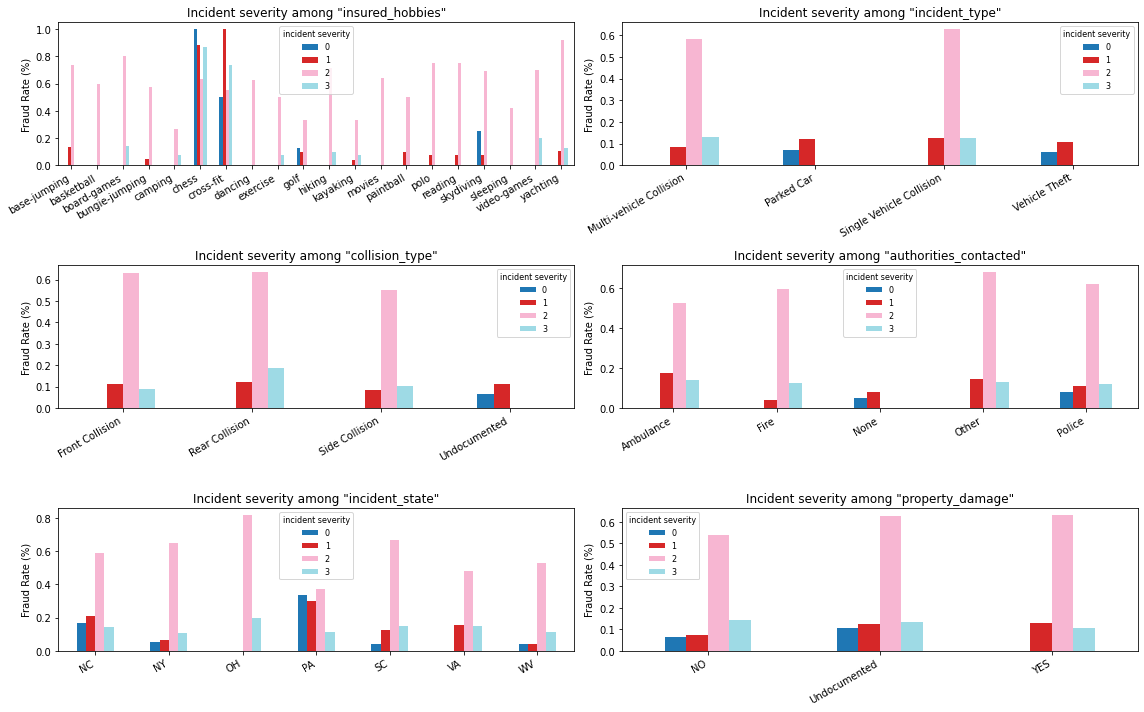

In [35]:
# countplot of each 'col_nominal_significant' against their 'incident_severity'
fig, ax = plt.subplots(figsize = (16, 10))
for i, col in enumerate(col_nominal_significant):
    incident_severity = df.pivot_table(index = col, columns = 'incident_severity', values = 'fraud_reported_encoded')
    ax = plt.subplot(3, 2, i+1)
    incident_severity.plot(kind = 'bar', colormap = 'tab20', ax = ax)
    
    plt.title('Incident severity among "{}"'.format(col), fontsize = 12)
    plt.xticks(rotation = 30, size = 10, ha = 'right')
    plt.yticks(size = 10)
    plt.ylabel('Fraud Rate (%)', size = 10)
    ax.set(xlabel = None)
    ax.legend(title_fontsize = 8, title = 'incident severity', fontsize = 8)
    plt.tight_layout()
plt.show()

### Fraud rate of insured_hobbies for each incident_state

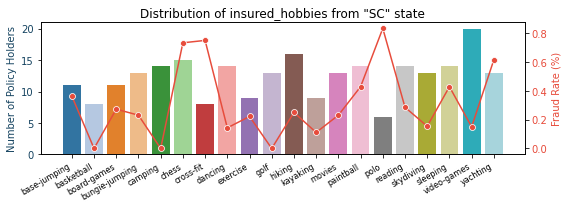

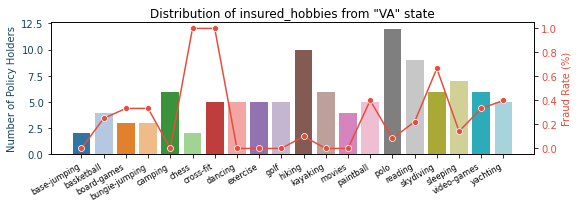

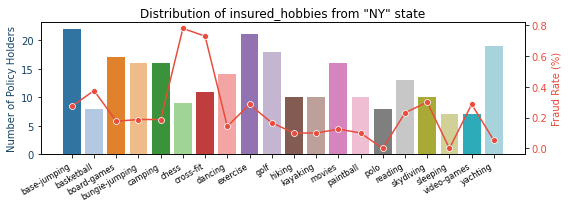

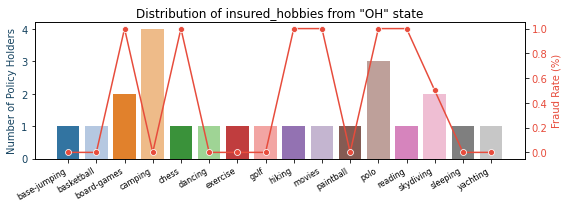

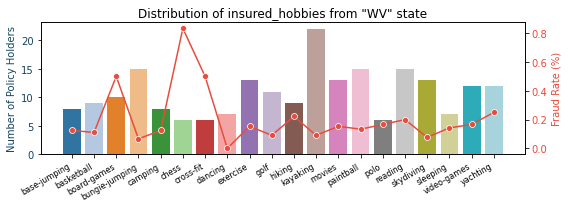

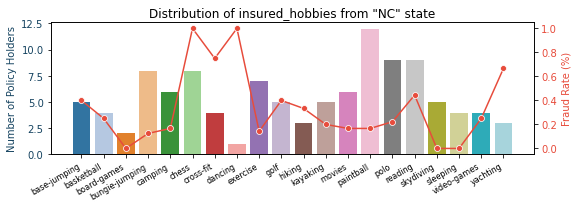

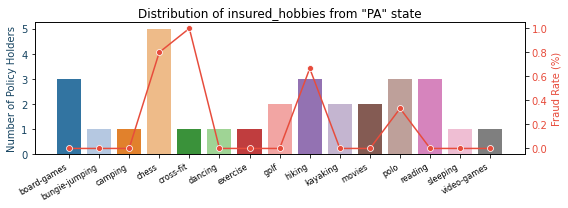

In [36]:
temp_df = df.groupby(['incident_state', 'insured_hobbies']).agg({'fraud_reported_encoded':'mean', 
                                                                 'number_of_policyholder':np.count_nonzero})
for state in df.incident_state.unique():
    fig, ax = plt.subplots(figsize = (8, 3))
    _ = temp_df.loc[state, :].reset_index()
    temp_ax = ax.twinx()
    sns.barplot(data = _, x = 'insured_hobbies', y = 'number_of_policyholder', ax = ax, palette = 'tab20')
    sns.lineplot(data = _, x = 'insured_hobbies', y = 'fraud_reported_encoded', ax = temp_ax, marker = 'o', color = '#E74C3C')
    
    ax.set_title('Distribution of insured_hobbies from "{}" state'.format(state), size = 12)
    ax.set_xticklabels(list(_['insured_hobbies']), rotation = 30, ha = 'right', fontsize = 8)
    ax.set_xlabel('')
    ax.set_ylabel('Number of Policy Holders', color = '#154360', fontsize = 10)
    ax.tick_params(axis = 'y', labelcolor = '#154360')
    temp_ax.set_ylabel('Fraud Rate (%)', color = '#E74C3C', fontsize = 10)
    temp_ax.tick_params(axis = 'y', labelcolor = '#E74C3C')
    
    plt.tight_layout()
    plt.show()

### Claim amount over time

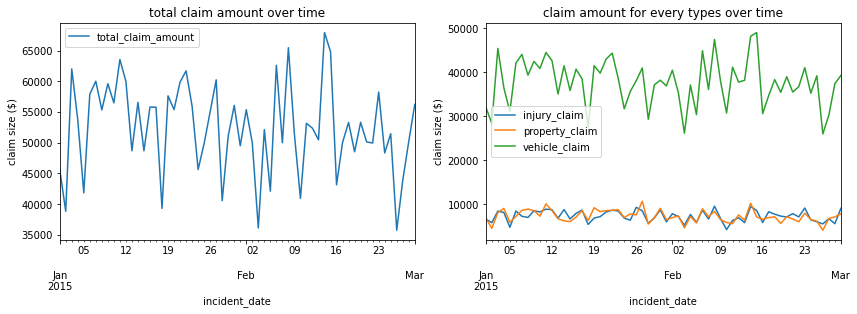

In [37]:
fig, ax = plt.subplots(figsize = (14, 4), nrows = 1, ncols = 2)
df.groupby(['incident_date']).agg({'total_claim_amount':'mean'}).plot(kind = 'line', ax = ax[0])
df.groupby(['incident_date']).agg({'injury_claim':'mean',
                                   'property_claim':'mean',
                                   'vehicle_claim':'mean'}).plot(kind = 'line', ax = ax[1])

ax[0].set_title('total claim amount over time')
ax[0].set_ylabel('claim size ($)')
ax[1].set_title('claim amount for every types over time')
ax[1].set_ylabel('claim size ($)')
plt.show()

### Profit or Loss?

We would like to define a new variable, i.e. `profit_or_loss` which will denote whether the insurance company is at profit or loss when they cover up the claims made by policy holders. This variable has some assumptions as follow:
- The annual premium remains constant throughout the year,
- The money going out (expenditure) from insurance company is only from total claims (i.e. `total_claim_amount`) which is the loss, and
- The money going in (revenue) from insurance company is only from the total premiums (i.e. `policy_annual_premium`) which is the profit.

We know that claims and premiums are not the only resource of money that are going out and going in from the insurance company, yet these variables are in used to determine the profit or loss since these are the only information that we have.

The equation for this new variable as follow:
> `profit_or_loss` =  (`policy_annual_premium` x (2015 - `policy_bind_year`)) - `total_claim_amount`\
>
> *Where a positive value will denote a profit and a negative value will denote a loss. Every time a total claim is bigger than the total premium was paid by a customer, it will be a loss for the insurance company*.

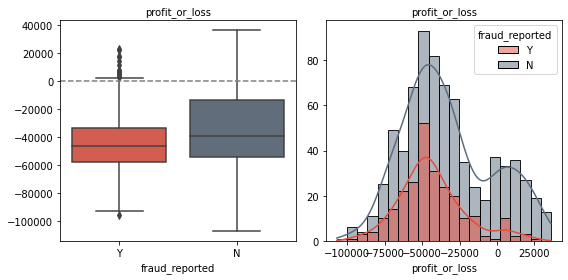

In [38]:
# create 'profit_or_loss' as the new column
df['profit_or_loss'] = (df['policy_annual_premium'] * (2015 - df['policy_bind_year'])) - df['total_claim_amount']

# plot the distribution of 'profit_or_loss'
fig, ax = plt.subplots(figsize = (8, 4), nrows = 1, ncols = 2)
sns.boxplot(y = df['profit_or_loss'], x = df['fraud_reported'], palette = ['#E74C3C', '#5D6D7E'], ax = ax[0])
sns.histplot(x = df['profit_or_loss'], hue = df['fraud_reported'], palette = ['#E74C3C', '#5D6D7E'], kde = True, ax = ax[1])
ax[0].axhline(y = 0, color = 'gray', linestyle = '--')
for i in range(2):
    ax[i].set(ylabel = None)
    ax[i].set_title('profit_or_loss', loc = 'center', fontsize = 10)
plt.tight_layout()
plt.show()

In [39]:
# note: negative value means at loss condition
profit_or_loss = df.groupby('fraud_reported').agg(total_profit = ('profit_or_loss', 'sum'),
                                                  mean_profit = ('profit_or_loss', 'mean'),
                                                  std_profit = ('profit_or_loss', 'std'))
print(profit_or_loss)
print('difference in average profit:', profit_or_loss['mean_profit'][0] - profit_or_loss['mean_profit'][1])

                total_profit   mean_profit    std_profit
fraud_reported                                          
N               -25126613.43 -33368.676534  29690.411374
Y               -10806751.60 -43752.030769  21812.675584
difference in average profit: 10383.35423536622


- The average loss as a result of **fraudulent claims** is about `43752.03` USD (std of `21812.68` USD) and the total loss is about `10806751.60` USD. 
- The average loss as a result of **non-fraudulent claims** is about `33368.68` USD (std of `29690.41` USD) and the total loss is `25126613.43` USD.
- The average difference in between these two claims is about `10383.35` USD

To determine if there is a significant difference between the averages of those two claims, i.e. fraud and non-fraud, we would like to perform t-test for hypothesis testing. Before performing t-test we need to determine the Null Hypothesis and the Alternate Hypothesis, as follow:
1. H0 (Null Hypothesis): $\mu_{fraud} = \mu_{non-fraud}$, There is no significant difference between the average of `profit_or_loss` by fraud and non-fraud.
2. H1 (Alternate Hypothesis): $\mu_{fraud} \neq \mu_{non-fraud}$, There is significant difference between the average of `profit_or_loss` by fraud and non-fraud.

From the result of t-test (ANOVA test with 2 sample distributions is also called as t-test), the p-value is less than the significance level, i.e. $p = 4.85 \times 10^{-7} < \alpha = 0.05$. Therefore, we will reject H0 (Null Hypothesis) and so the difference between the average of `profit_or_loss` by fraud and non-fraud is significant and not due to random chance.

In [40]:
ANOVA_test(df, ['profit_or_loss'], 'fraud_reported', alpha = 0.05)

p_value     result
profit_or_loss  4.852489e-07  reject H0

# Data preprocessing

In this section, we will do some encoding process and create two kind of dataset to be feeded into machine learning models, i.e. a dataset with full predictor variables and a dataset with selected predictor variables. We do so because we would like to compare them and find out which model performs better.

For numerical (continuous) variables, we won't apply the preprocessing steps explicitly (e.g. scaling and transforming data). In fact, we will apply those things implicitly in the `sklearn` `pipeline` since those preprocessing steps are not necessarily needed in a particular machine learning model such as tree-based models.

## Dummy encoding

We will perform binary encoding for categorical variables with 2 unique values and ordinal encoding for categorical variables which have an ordinal order.

In [41]:
# remove 'fraud_reported' from 'col_nominal'
col_nominal.remove('fraud_reported')

In [42]:
# remove 'auto_model' from 'col_nominal'
col_nominal.remove('auto_model')

In [43]:
# binary encoding of 'insured_sex'
df['insured_sex'] = df['insured_sex'].replace({'FEMALE':0,'MALE':1})

In [44]:
# ordinal encoding of 'incident_month'
df['incident_month'] = df['incident_month'].replace({'January':0,'February':1, 'March':2})

## Checking multicollinearity

We will also check the multicollinearity among the predictor variables which is examined by the variance inflation factor (VIF). Multicollinearity is an issue especially in regression model which leads to misinterpret their learned parameter. As we will use Logistic Regression in one of our models, we need to prevent this problem [[8]](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/). Rule of thumb of FIV:
- VIF starts at 1 and has no upper limit.
- VIF = 1 &rarr; No multicollinearity.
- VIF between 3 and 10 &rarr; Moderate multicollinearity.
- VIF > 10 &rarr; Severe multicollinearity.

In [45]:
# helper function
def check_multicollinearity(df_multicoll, corrplot = True):
    #correlation heatmap plot
    if corrplot == True:
        fig, ax = plt.subplots(figsize=(10, 8))
        corr_matrix = df_multicoll.corr()
        mask = np.zeros_like(corr_matrix)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'bwr', linewidths = 0.1,  mask = mask, vmin = -1, vmax = 1)
        ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
        ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
        plt.show()
    else:
        pass
    # function to compute FIV
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    import statsmodels.api as sm
    def calc_vif(X):
        X = sm.add_constant(X)
        # calculating VIF
        vif = pd.DataFrame()
        vif["features"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        return(vif)

    # compute VIF
    vif_values = calc_vif(df_multicoll).sort_values(by = 'VIF', ascending = False).round(2)
    return vif_values

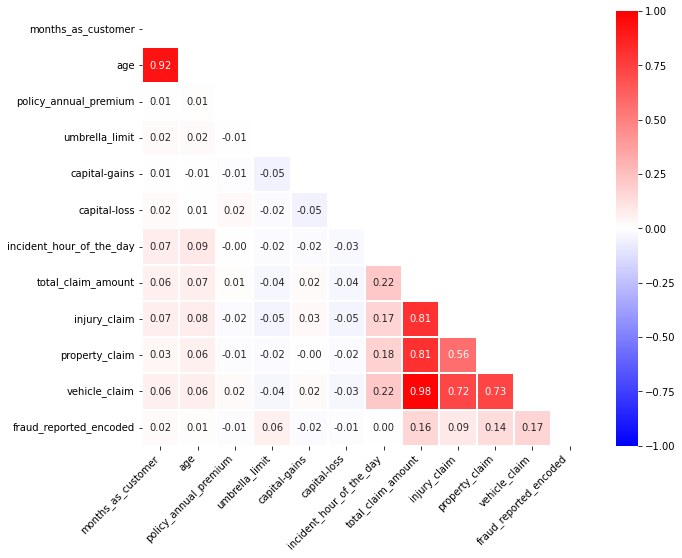

features    VIF
8         total_claim_amount    inf
9               injury_claim    inf
10            property_claim    inf
11             vehicle_claim    inf
0                      const  81.17
2                        age   6.78
1         months_as_customer   6.76
7   incident_hour_of_the_day   1.06
12    fraud_reported_encoded   1.04
4             umbrella_limit   1.01
5              capital-gains   1.01
6               capital-loss   1.01
3      policy_annual_premium   1.01

In [46]:
# check the multicollinearity
vif_values = check_multicollinearity(df[col_continuous + ['fraud_reported_encoded']], corrplot = True)
vif_values

In [47]:
# drop the correlated columns and check the VIF again
drop_col = ['injury_claim', 'property_claim', 'vehicle_claim', 'age']
check_multicollinearity(df[[col for col in col_continuous if col not in drop_col] +\
                           ['fraud_reported_encoded']], corrplot = False)

features    VIF
0                     const  37.74
7        total_claim_amount   1.09
6  incident_hour_of_the_day   1.06
8    fraud_reported_encoded   1.03
3            umbrella_limit   1.01
1        months_as_customer   1.01
4             capital-gains   1.01
5              capital-loss   1.01
2     policy_annual_premium   1.00

In [48]:
# drop those correlated columns ('injury_claim', 'property_claim', 'vehicle_claim', 'age')
col_continuous_significant = [col for col in col_continuous_significant if col not in drop_col]
col_continuous_significant

['total_claim_amount']

In [49]:
# drop those correlated columns ('injury_claim', 'property_claim', 'vehicle_claim', 'age')
col_continuous = [col for col in col_continuous if col not in drop_col]
col_continuous

['months_as_customer',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'total_claim_amount']

We see that `injury_claim`, `property_claim`, `vehicle_claim`, and `total_claim_amount` are correlated each other (their VIF values are up to infinity). Therefore, we will hold `total_claim_amount` since it provides more information about the claim and drop `injury_claim`, `property_claim`, and `vehicle_claim`.

We also drop `age` column since it has lower pearson correlation to the target variable.

## One hot encoding

Perform one hot encoding for categorical varibales which have more than 2 unique values.

In [50]:
# define 'onehot' and 'onehot_significant'
not_onehot = ['insured_sex','incident_month']
onehot = [var for var in col_nominal if var not in not_onehot]
onehot_significant = [var for var in col_nominal_significant if var not in not_onehot]

In [51]:
# perform onehot encoding on 'onehot' columns
df_onehot = pd.get_dummies(df[onehot], drop_first = True)
df_onehot.shape

(1000, 86)

In [52]:
# perform onehot encoding on 'onehot_significant' columns
df_onehot_significant = pd.get_dummies(df[onehot_significant], drop_first = True)
df_onehot_significant.shape

(1000, 37)

## Feature engineering

We have seen that from the ANOVA Test `umbrella_limit` has p-value about `0.066` which is close to the significance level alpha `0.05`. This variable might be useful for detecting fraudulent claims, so we add an interaction term between `umbrella_limit` and `incident_severity` by multiplying those two variables.

We also add new interaction terms of `incident_severity` with `profit_or_loss` and `total_claim_amount`.

In [53]:
# create interaction terms of 'incident_severity' with 'umbrella_limit'
df['int_incident_severity_umbrella_limit'] = df['incident_severity'] * df['umbrella_limit']
df['int_incident_severity_profit_or_loss'] = df['incident_severity'] * df['profit_or_loss']
df['int_incident_severity_total_claim_amount'] = df['incident_severity'] * df['total_claim_amount']

In [54]:
# check the significance of new features
ANOVA_test(df,
           ['int_incident_severity_umbrella_limit',
            'int_incident_severity_profit_or_loss',
            'int_incident_severity_total_claim_amount',
            'umbrella_limit', 
            'profit_or_loss',
            'total_claim_amount',
            'incident_severity'], 'fraud_reported')

p_value             result
int_incident_severity_umbrella_limit      4.977766e-03          reject H0
int_incident_severity_profit_or_loss      2.756333e-05          reject H0
int_incident_severity_total_claim_amount  1.327793e-05          reject H0
umbrella_limit                            6.605811e-02  fail to reject H0
profit_or_loss                            4.852489e-07          reject H0
total_claim_amount                        1.952936e-07          reject H0
incident_severity                         2.032104e-04          reject H0

- We can see that the p-value for `umbrella_limit` is decreasing and turning out to significant variable when we add an interaction term with `incident_severity`, i.e. `int_incident_severity_umbrella_limit`.

In [55]:
# create a list of new columns
col_new = ['profit_or_loss', 
           'int_incident_severity_umbrella_limit', 
           'int_incident_severity_profit_or_loss', 
           'int_incident_severity_total_claim_amount']

## Concatenating all the variables

In [56]:
# target variable
target = ['fraud_reported_encoded']

In [57]:
# sum up of the total variables (including all variables)
print('Total columns before onehot (all variables):', 
      len(col_nominal) + len(col_ordinal) + len(col_continuous) + len(target) + len(col_new))
print('Total columns after onehot (all variables)', 
      (len(df_onehot.columns) + len(not_onehot)) + len(col_ordinal) + len(col_continuous) + len(target) + len(col_new))

Total columns before onehot (all variables): 35
Total columns after onehot (all variables) 107


In [58]:
# sum up of the total variables (including only significant variables)
print('Total columns before onehot (significant variables):', 
      len(col_nominal_significant) + len(col_ordinal_significant) + len(col_continuous_significant) + len(target) + len(col_new))
print('Total columns after onehot (significant variables):', 
      (len(df_onehot_significant.columns)) + len(col_ordinal_significant) + len(col_continuous_significant) + len(target) + len(col_new))

Total columns before onehot (significant variables): 13
Total columns after onehot (significant variables): 44


In [59]:
# concate all variables to be feeded into ML models
df_dummied = pd.concat([df[col_ordinal + col_continuous + not_onehot + col_new + target], 
                        df_onehot], 
                        axis=1)

df_dummied_significant = pd.concat([df[col_ordinal_significant + col_continuous_significant + col_new + target], 
                                    df_onehot_significant], 
                                    axis=1)

print('df_dummied:', df_dummied.shape)
print('df_dummied_significant:', df_dummied_significant.shape)

df_dummied: (1000, 107)
df_dummied_significant: (1000, 44)


## Splitting the dataset

In [60]:
# helper function to split the dataset
def split_df(df_temp, seed = 42):
    X = df_temp.drop('fraud_reported_encoded', axis=1)
    y = df_temp['fraud_reported_encoded']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = seed)
    return X_train, X_test, y_train, y_test

In [61]:
X_train, X_test, y_train, y_test = split_df(df_dummied)
print('X_train:', X_train.shape, '|', 'X_test:', X_test.shape)
print('y_train:', y_train.shape, '    |', 'y_test:', y_test.shape, '\n')

print('='*30, 'Proportion of fraud and non-fraud (train data):', '='*30)
print(y_train.value_counts(normalize = True))
print(y_train.value_counts(normalize = False), '\n')
print('='*30, 'Proportion of fraud and non-fraud (test data)', '='*30)
print(y_test.value_counts(normalize = True))
print(y_test.value_counts(normalize = False))

X_train: (750, 106) | X_test: (250, 106)
y_train: (750,)     | y_test: (250,) 

============================== Proportion of fraud and non-fraud (train data): ==============================
0    0.753333
1    0.246667
Name: fraud_reported_encoded, dtype: float64
0    565
1    185
Name: fraud_reported_encoded, dtype: int64 

============================== Proportion of fraud and non-fraud (test data) ==============================
0    0.752
1    0.248
Name: fraud_reported_encoded, dtype: float64
0    188
1     62
Name: fraud_reported_encoded, dtype: int64


# Baseline model scores

Before we start modelling, we need to know that `accuracy` is not a good metric to measure the model performance since we are dealing with imbalance class dataset. A high accuracy could be achieved by a poor model that only correctly predict the majority class while the minority will be wrongly predicted at all. 

Considering the `X_test` and `y_test` data, these will be the new "unseen data" to be predicted. There are `188` non-fraudulent claims and `62` fraudulent claims. When we would like to try to maximize the `accuracy` in the modelling, we might get the confusion matrix as shown below,

|  | - (predicted non-fraud) | + (predicted fraud) |
| --- | --- | --- |
| - (Actual non-fraud) | 188 | 0 |
| + (Actual fraud) | 62 | 0 |

> *This model can be achieved if we set the threshold of probability to predict positive class is 1*.\
> If p = 1 &rarr; the model predicts negative class for all the input data &rarr; TPR = FPR = 0
>
>This model will have:
>- accuracy = 75.2%, 
>- specificity = 100%,
>- sensitivity/recall = 0%.
>- precision = NaN,
>- F1-score = NaN,

However, If we would like to make a naive model where all claims are predicted as fraudulent claims, so there is no non-fraudulent claim predictions, we might get the confusion matrix as shown below,

|  | - (predicted non-fraud) | + (predicted fraud) |
| --- | --- | --- |
| - (Actual non-fraud) | 0 | 188 |
| + (Actual fraud) | 0 | 62 |

> *This model can be achieved if we set the threshold of probability to predict positive class is 0*.\
> If p = 0 &rarr; the model predicts positive class for all the input data &rarr; TPR = FPR = 1
>
>This model will have: 
>- accuracy = 24.8%, 
>- specificity = 0%,
>- sensitivity/recall = 100%,
>- precision = 24.8%,
>- F1-score = 39.7%,
>- ROC AUC = 50%.

As identifying fraudulent claims (maximizing TPR) as many as possible is the goal while minimizing the FPR as least as possible is also the goal because this might affect the customer impression and satisfaction. Therefore, we will use `F1-score` metric and set the baseline score of `F1-score` at least 39.7% and `ROC AUC` at least 70%.

# Modelling

Six different classifiers (Machine Learning algorithms) are used, that are:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine
- Random Forest
- XGBoost
- AdaBoost

We will use `df_dummied` and `df_dummied_significant` as the input of machine learning algorithm. Then, we compare between the two dataset and take the one whose has the best performance.

> Note:
>- `df_dummied` consists all predictor variables.
>- `df_dummied_significant` consists selected predictor variables after performing feature selection using Chi-Squared Test and ANOVA Test.

At the first stage, we would like to build some models without hyperparameter tuning. These models will become the baseline models. Then, perfoming hyperparameter tuning in hope that we could get a better model than these baseline models. The baseline models are trained using default hyperparameter from each `sklearn`'s classifiers.

For hyperparameter tuning, we will use `RandomizedSearchCV` instead of `GridSearchCV`. `RandomizedSearchCV` is more efficient and having less computational cost as compared to `GridSearchCV`, especially when we deal with tree-based model, there are a lot of hyperparameter that can be tuned. We will also use 10-fold CV.

In [62]:
# helper function for scoring and then storing the result into a dictionary
def scores(t, name, tuning = True):
    print ('======== {} classification metrics ========'.format(name))
    if tuning == True:
        CV_score = t.best_score_
        print("CV scores:", round(CV_score, 3))
    else:
        pass
    train_score = t.score(X_train, y_train)
    test_score = t.score(X_test, y_test)
    print("Train score:", round(train_score, 3))
    print("Test score:", round(test_score, 3))

    # evaluation metrics on test set
    y_pred = t.predict(X_test)                    # hard prediction
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    print(confusion_matrix(y_test, y_pred))
    sensi = TP/(TP + FN)                          # Sensitivity (TPR)
    speci = TN/(TN + FP)                          # Specificity
    preci = TP/(TP + FP)                          # Precision
    f1 = 2*(preci * sensi)/(preci + sensi)        # F1-score
    FPR = FP / (FP + TN)                          # FPR
    y_pred_proba = t.predict_proba(X_test)[:, 1]  # prob prediction
    roc_auc = roc_auc_score(y_test, y_pred_proba) # ROC AUC
    if tuning == True: 
        score_dict = {'Model':name, 'CV scores':round(CV_score, 3), 'Train score':round(train_score, 3),
                      'Test score':round(test_score, 3), 'Sensitivity (TPR)':round(sensi, 3), 'Specificity':round(speci, 3),
                      'Precision':round(preci, 3), 'F1-score':round(f1, 3), 'FPR':round(FPR, 3), 'ROC AUC':round(roc_auc, 3)}           
    else:
        score_dict = {'Model':name, 'Train score':round(train_score, 3), 'Test score':round(test_score, 3),
                      'Sensitivity (TPR)':round(sensi, 3), 'Specificity':round(speci, 3), 'Precision':round(preci, 3),
                      'F1-score':round(f1, 3), 'FPR':round(FPR, 3), 'ROC AUC':round(roc_auc, 3)}              
    return score_dict

In [63]:
# helper function for preprocessing variables i.e. scaling the data for LogReg, KNN, and SVC models
def preprocessing_df(significant):
    if significant == True:
        preprocessing = col_continuous_significant + col_ordinal_significant + col_new
        non_preprocessing = list(df_onehot_significant.columns)
    elif significant == False:
        preprocessing = col_continuous + col_ordinal + [not_onehot[1]] + col_new
        non_preprocessing = list(df_onehot.columns) + [not_onehot[0]]
    return preprocessing, non_preprocessing

# pipeline for selecting variables to be processed
preprocessing_var = FunctionTransformer(lambda x: x[preprocessing], validate = False)
non_preprocessing_var = FunctionTransformer(lambda x: x[non_preprocessing], validate = False)
pl_preprocessing = Pipeline([('selector_preprocessing', preprocessing_var),
                             ('scaler', StandardScaler())])
pl_non_preprocessing = Pipeline([('selector_non_preprocessing', non_preprocessing_var)])
union = FeatureUnion([('preprocess', pl_preprocessing),
                      ('non', pl_non_preprocessing)])

In [64]:
# helper function to create baseline model
def create_baseline_model(weighting, significant_features):
    # set the weight
    if weighting == True:
        weight = {0:y_train.value_counts(normalize = True)[1], 
                  1:y_train.value_counts(normalize = True)[0]}
        weight_xg = y_train.value_counts(normalize = True)[0]/y_train.value_counts(normalize = True)[1]
        print('====================== Baseline Model ======================')
        print('class_weight:', weight)
        print('scale_pos_weight:', weight_xg, '\n')
    else:
        weight = None
        weight_xg = 1
        print('====================== Baseline Model ======================')
        print('class_weight:', str(None))
        print('scale_pos_weight:', weight_xg, '\n')
        
    # determine which df to use
    preprocessing, non_preprocessing = preprocessing_df(significant = significant_features) 
    
    # logistic regression
    pl_lr = Pipeline([('union', union),                                        
                       ('lr', LogisticRegression(class_weight = weight))])
    
    # knn
    pl_knn = Pipeline([('union', union),                                        
                       ('knn', KNeighborsClassifier(n_jobs = -1))])

    # SVC
    pl_svc = Pipeline([('union', union),                                        
                       ('svc', SVC(kernel = 'rbf', probability = True, class_weight = weight))])

    # random forest
    rf = RandomForestClassifier(class_weight = weight, n_jobs = -1)

    # xgboost
    xg = XGBClassifier(objective = 'binary:logistic', booster = 'gbtree', eval_metric = 'logloss', 
                       scale_pos_weight = weight_xg, n_jobs = -1)

    # adaboost
    ab = AdaBoostClassifier()

    # put those models to dict of clfs
    clfs = {'LogReg':pl_lr, 'KNN':pl_knn, 'SVC':pl_svc, 'RF':rf, 'XGBoost':xg, 'AdaBoost':ab}
    
    # evaluate the model
    list_of_score = []
    for name, model in clfs.items():
        model.fit(X_train, y_train)
        score_dict = scores(model, name, tuning = False)
        list_of_score.append(score_dict)
    
    # create DataFrame from list_of_score 
    baseline = pd.DataFrame(list_of_score)
    
    return baseline, pl_lr, pl_knn, pl_svc, rf, xg, ab

## Model with class weighting

One of the best practice of using class weighting on imbalanced dataset is using the inverse of class distribution on the training set as the weight for each class. For example, if we have training set with ratio 1:100 of the minority class to the majority class, then we could use the class weight of 100 for the minority class and 1 for the majority class, i.e. `class_weight = {majority class:1.0, minority class:100.0}`. In our case, the class weights are `class_weight = {0:0.246667, 1:0.753333}`.

For XGBoost, the class weights are defined differently. XGBoost uses scale positive weight which is defined as the total negative class samples divided by the total positive class samples. 
- The negative class refers to the majority class (class 0).
- The positive class refers to the minority class (class 1).

So in our case for XGBoost, the class weight is `scale_pos_weight = 3.054`.

In [65]:
# define class_weight
y_train.value_counts(normalize = True)

0    0.753333
1    0.246667
Name: fraud_reported_encoded, dtype: float64

In [66]:
# define scale_pos_weight
scale_pos_weight = 0.753333/0.246667
scale_pos_weight

3.0540485756100333

### Baseline model

#### Using all variables

We will use `df_dummied` to train the baseline models.

In [67]:
# create baseline models using 'df_dummied'
preprocessing, non_preprocessing = preprocessing_df(significant = False)

X_train, X_test, y_train, y_test = split_df(df_dummied)
baseline_1, lr_1, knn_1, svc_1, rf_1, xg_1, ab_1 = create_baseline_model(weighting = True, significant_features = False)
baseline_1

====================== Baseline Model ======================
class_weight: {0: 0.24666666666666667, 1: 0.7533333333333333}
scale_pos_weight: 3.054054054054054 

======== LogReg classification metrics ========
Train score: 0.769
Test score: 0.628
[[125  63]
 [ 30  32]]
======== KNN classification metrics ========
Train score: 0.796
Test score: 0.72
[[160  28]
 [ 42  20]]
======== SVC classification metrics ========
Train score: 0.619
Test score: 0.492
[[ 75 113]
 [ 14  48]]
======== RF classification metrics ========
Train score: 1.0
Test score: 0.748
[[175  13]
 [ 50  12]]
======== XGBoost classification metrics ========
Train score: 1.0
Test score: 0.8
[[163  25]
 [ 25  37]]
======== AdaBoost classification metrics ========
Train score: 0.895
Test score: 0.772
[[166  22]
 [ 35  27]]


Model  Train score  Test score  Sensitivity (TPR)  Specificity  \
0    LogReg        0.769       0.628              0.516        0.665   
1       KNN        0.796       0.720              0.323        0.851   
2       SVC        0.619       0.492              0.774        0.399   
3        RF        1.000       0.748              0.194        0.931   
4   XGBoost        1.000       0.800              0.597        0.867   
5  AdaBoost        0.895       0.772              0.435        0.883   

   Precision  F1-score    FPR  ROC AUC  
0      0.337     0.408  0.335    0.645  
1      0.417     0.364  0.149    0.687  
2      0.298     0.430  0.601    0.642  
3      0.480     0.276  0.069    0.835  
4      0.597     0.597  0.133    0.817  
5      0.551     0.486  0.117    0.812

#### Using only selected variables

We will use `df_dummied_significant` to train the baseline models.

In [68]:
# create baseline models using 'df_dummied_significant'
preprocessing, non_preprocessing = preprocessing_df(significant = True)

X_train, X_test, y_train, y_test = split_df(df_dummied_significant)
baseline_2, lr_2, knn_2, svc_2, rf_2, xg_2, ab_2 = create_baseline_model(weighting = True, significant_features = True)
baseline_2

====================== Baseline Model ======================
class_weight: {0: 0.24666666666666667, 1: 0.7533333333333333}
scale_pos_weight: 3.054054054054054 

======== LogReg classification metrics ========
Train score: 0.724
Test score: 0.652
[[126  62]
 [ 25  37]]
======== KNN classification metrics ========
Train score: 0.836
Test score: 0.764
[[170  18]
 [ 41  21]]
======== SVC classification metrics ========
Train score: 0.824
Test score: 0.776
[[149  39]
 [ 17  45]]
======== RF classification metrics ========
Train score: 1.0
Test score: 0.804
[[164  24]
 [ 25  37]]
======== XGBoost classification metrics ========
Train score: 1.0
Test score: 0.808
[[158  30]
 [ 18  44]]
======== AdaBoost classification metrics ========
Train score: 0.88
Test score: 0.784
[[164  24]
 [ 30  32]]


Model  Train score  Test score  Sensitivity (TPR)  Specificity  \
0    LogReg        0.724       0.652              0.597        0.670   
1       KNN        0.836       0.764              0.339        0.904   
2       SVC        0.824       0.776              0.726        0.793   
3        RF        1.000       0.804              0.597        0.872   
4   XGBoost        1.000       0.808              0.710        0.840   
5  AdaBoost        0.880       0.784              0.516        0.872   

   Precision  F1-score    FPR  ROC AUC  
0      0.374     0.460  0.330    0.673  
1      0.538     0.416  0.096    0.768  
2      0.536     0.616  0.207    0.798  
3      0.607     0.602  0.128    0.838  
4      0.595     0.647  0.160    0.835  
5      0.571     0.542  0.128    0.843

### Hyperparameter tuning

#### Using all variables

We will use `df_dummied` to train the models using hyperparameter tuning.

In [69]:
# using 'df_dummied' to split the data
X_train, X_test, y_train, y_test = split_df(df_dummied)

# instantiate a dict for save the best params
tuning_params_1 = dict()

# instantiate a dict for save the model
tuning_model_1 = dict()

In [70]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = False)
lr_pipe = Pipeline([('union', union),
                    ('lr', LogisticRegression(n_jobs = -1, max_iter = 200))])

lr_values = {'lr__solver': ['liblinear'],
             'lr__penalty': ['l1', 'l2'],
             'lr__C': np.logspace(-5, 5, 50),
             'lr__class_weight':[{0:0.246667, 1:0.753333}, None]}

# rs_lr = RandomizedSearchCV(lr_pipe, lr_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_lr = GridSearchCV(lr_pipe, lr_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_lr.fit(X_train, y_train)
print(rs_lr.best_params_)

tuning_params_1['lr'] = rs_lr.best_params_
tuning_model_1['lr'] = rs_lr

{'lr__C': 86.85113737513521, 'lr__class_weight': {0: 0.246667, 1: 0.753333}, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
Wall time: 23.2 s


In [71]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = False)
knn_pipe = Pipeline([('union', union),
                     ('knn', KNeighborsClassifier(n_jobs = -1))])

knn_values = {'knn__n_neighbors':np.arange(3, 20, 1),
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto']}
             
# rs_knn = RandomizedSearchCV(knn_pipe, knn_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_knn = GridSearchCV(knn_pipe, knn_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_knn.fit(X_train, y_train)
print(rs_knn.best_params_)

tuning_params_1['knn'] = rs_knn.best_params_
tuning_model_1['knn'] = rs_knn

{'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 4, 'knn__weights': 'distance'}
Wall time: 6.69 s


In [72]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = False)
svc_pipe = Pipeline([('union', union),
                     ('svc', SVC(kernel = 'rbf', probability = True))])

svc_values = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__class_weight': [{0:0.246667, 1:0.753333}, None]}
             
# rs_svc = RandomizedSearchCV(svc_pipe, svc_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_svc = GridSearchCV(svc_pipe, svc_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_svc.fit(X_train, y_train)
print(rs_svc.best_params_)

tuning_params_1['svc'] = rs_svc.best_params_
tuning_model_1['svc'] = rs_svc

{'svc__C': 1000, 'svc__class_weight': None, 'svc__gamma': 0.001}
Wall time: 37 s


In [73]:
%%time
rf = RandomForestClassifier(n_jobs = -1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'class_weight':[{0:0.246667, 1:0.753333}, None]}

rs_rf = RandomizedSearchCV(rf, rf_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_rf = GridSearchCV(rf, rf_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_rf.fit(X_train, y_train)
print(rs_rf.best_params_)

tuning_params_1['rf'] = rs_rf.best_params_
tuning_model_1['rf'] = rs_rf

{'n_estimators': 150, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30, 'class_weight': {0: 0.246667, 1: 0.753333}}
Wall time: 1min 3s


In [74]:
%%time
xg = XGBClassifier(objective = 'binary:logistic', booster = 'gbtree', eval_metric = 'logloss', n_jobs = -1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'scale_pos_weight':[1, 3.054054054054054]}

rs_xg = RandomizedSearchCV(xg, xg_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_xg = GridSearchCV(xg, xg_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_xg.fit(X_train, y_train)
print(rs_xg.best_params_)

tuning_params_1['xg'] = rs_xg.best_params_
tuning_model_1['xg'] = rs_xg

{'scale_pos_weight': 3.054054054054054, 'reg_lambda': 0.05, 'reg_alpha': 0.05, 'n_estimators': 450, 'max_depth': 3, 'gamma': 3, 'eta': 0.1}
Wall time: 1min 45s


In [75]:
%%time
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
             'learning_rate':[0.05, 0.1, 0.3, 0.5]}
             
rs_ab = RandomizedSearchCV(ab, ab_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_ab = GridSearchCV(ab, ab_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_ab.fit(X_train, y_train)
print(rs_ab.best_params_)

tuning_params_1['ab'] = rs_ab.best_params_
tuning_model_1['ab'] = rs_ab

{'n_estimators': 450, 'learning_rate': 0.05}
Wall time: 47.5 s


In [76]:
# put those models to dict of clfs
clfs = {'LogReg':tuning_model_1['lr'], 'KNN':tuning_model_1['knn'], 'SVC':tuning_model_1['svc'], 
        'RF':tuning_model_1['rf'], 'XGBoost':tuning_model_1['xg'], 'AdaBoost':tuning_model_1['ab']}

# evaluate the model
list_of_score = []
for name, model in clfs.items():
    score_dict = scores(model, name, tuning = True)
    list_of_score.append(score_dict)

# create DataFrame from list_of_score 
tuning_1 = pd.DataFrame(list_of_score)
tuning_1

======== LogReg classification metrics ========
CV scores: 0.473
Train score: 0.637
Test score: 0.439
[[129  59]
 [ 28  34]]
======== KNN classification metrics ========
CV scores: 0.331
Train score: 1.0
Test score: 0.362
[[155  33]
 [ 41  21]]
======== SVC classification metrics ========
CV scores: 0.507
Train score: 0.936
Test score: 0.448
[[160  28]
 [ 36  26]]
======== RF classification metrics ========
CV scores: 0.601
Train score: 0.885
Test score: 0.625
[[162  26]
 [ 22  40]]
======== XGBoost classification metrics ========
CV scores: 0.752
Train score: 0.87
Test score: 0.662
[[157  31]
 [ 16  46]]
======== AdaBoost classification metrics ========
CV scores: 0.593
Train score: 0.73
Test score: 0.481
[[168  20]
 [ 36  26]]


Model  CV scores  Train score  Test score  Sensitivity (TPR)  \
0    LogReg      0.473        0.637       0.439              0.548   
1       KNN      0.331        1.000       0.362              0.339   
2       SVC      0.507        0.936       0.448              0.419   
3        RF      0.601        0.885       0.625              0.645   
4   XGBoost      0.752        0.870       0.662              0.742   
5  AdaBoost      0.593        0.730       0.481              0.419   

   Specificity  Precision  F1-score    FPR  ROC AUC  
0        0.686      0.366     0.439  0.314    0.639  
1        0.824      0.389     0.362  0.176    0.709  
2        0.851      0.481     0.448  0.149    0.711  
3        0.862      0.606     0.625  0.138    0.820  
4        0.835      0.597     0.662  0.165    0.828  
5        0.894      0.565     0.481  0.106    0.842

#### Using only selected variables

We will use `df_dummied_significant` to train the models using hyperparameter tuning.

In [77]:
# using 'df_dummied_significant' to split the data
X_train, X_test, y_train, y_test = split_df(df_dummied_significant)

# instantiate a dict for save the best params
tuning_params_2 = dict()

# instantiate a dict for save the model
tuning_model_2 = dict()

In [78]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = True)
lr_pipe = Pipeline([('union', union),
                    ('lr', LogisticRegression(n_jobs = -1, max_iter = 200))])

lr_values = {'lr__solver': ['liblinear'],
             'lr__penalty': ['l1', 'l2'],
             'lr__C': np.logspace(-5, 5, 50),
             'lr__class_weight':[{0:0.246667, 1:0.753333}, None]}

# rs_lr = RandomizedSearchCV(lr_pipe, lr_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_lr = GridSearchCV(lr_pipe, lr_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_lr.fit(X_train, y_train)
print(rs_lr.best_params_)

tuning_params_2['lr'] = rs_lr.best_params_
tuning_model_2['lr'] = rs_lr

{'lr__C': 0.7906043210907702, 'lr__class_weight': {0: 0.246667, 1: 0.753333}, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
Wall time: 8.49 s


In [79]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = True)
knn_pipe = Pipeline([('union', union),
                     ('knn', KNeighborsClassifier(n_jobs = -1))])

knn_values = {'knn__n_neighbors':np.arange(3, 20, 1),
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto']}
             
# rs_knn = RandomizedSearchCV(knn_pipe, knn_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_knn = GridSearchCV(knn_pipe, knn_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_knn.fit(X_train, y_train)
print(rs_knn.best_params_)

tuning_params_2['knn'] = rs_knn.best_params_
tuning_model_2['knn'] = rs_knn

{'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Wall time: 6.18 s


In [80]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = True)
svc_pipe = Pipeline([('union', union),
                     ('svc', SVC(kernel = 'rbf', probability = True))])

svc_values = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__class_weight': [{0:0.246667, 1:0.753333}, None]}
             
# rs_svc = RandomizedSearchCV(svc_pipe, svc_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_svc = GridSearchCV(svc_pipe, svc_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_svc.fit(X_train, y_train)
print(rs_svc.best_params_)

tuning_params_2['svc'] = rs_svc.best_params_
tuning_model_2['svc'] = rs_svc

{'svc__C': 100, 'svc__class_weight': {0: 0.246667, 1: 0.753333}, 'svc__gamma': 0.01}
Wall time: 25.5 s


In [81]:
%%time
rf = RandomForestClassifier(n_jobs = -1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'class_weight':[{0:0.246667, 1:0.753333}, None]}

rs_rf = RandomizedSearchCV(rf, rf_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_rf = GridSearchCV(rf, rf_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_rf.fit(X_train, y_train)
print(rs_rf.best_params_)

tuning_params_2['rf'] = rs_rf.best_params_
tuning_model_2['rf'] = rs_rf

{'n_estimators': 250, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'class_weight': {0: 0.246667, 1: 0.753333}}
Wall time: 58 s


In [82]:
%%time
xg = XGBClassifier(objective = 'binary:logistic', booster = 'gbtree', eval_metric = 'logloss', n_jobs = -1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'scale_pos_weight':[1, 3.054054054054054]}

rs_xg = RandomizedSearchCV(xg, xg_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_xg = GridSearchCV(xg, xg_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_xg.fit(X_train, y_train)
print(rs_xg.best_params_)

tuning_params_2['xg'] = rs_xg.best_params_
tuning_model_2['xg'] = rs_xg

{'scale_pos_weight': 3.054054054054054, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 550, 'max_depth': 3, 'gamma': 3, 'eta': 0.05}
Wall time: 1min 8s


In [83]:
%%time
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
             'learning_rate':[0.05, 0.1, 0.3, 0.5]}
             
rs_ab = RandomizedSearchCV(ab, ab_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_ab = GridSearchCV(ab, ab_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_ab.fit(X_train, y_train)
print(rs_ab.best_params_)

tuning_params_2['ab'] = rs_ab.best_params_
tuning_model_2['ab'] = rs_ab

{'n_estimators': 550, 'learning_rate': 0.5}
Wall time: 40.6 s


In [84]:
# put those models to dict of clfs
clfs = {'LogReg':tuning_model_2['lr'], 'KNN':tuning_model_2['knn'], 'SVC':tuning_model_2['svc'], 
        'RF':tuning_model_2['rf'], 'XGBoost':tuning_model_2['xg'], 'AdaBoost':tuning_model_2['ab']}

# evaluate the model
list_of_score = []
for name, model in clfs.items():
    score_dict = scores(model, name, tuning = True)
    list_of_score.append(score_dict)

# create DataFrame from list_of_score 
tuning_2 = pd.DataFrame(list_of_score)
tuning_2

======== LogReg classification metrics ========
CV scores: 0.497
Train score: 0.554
Test score: 0.444
[[124  64]
 [ 26  36]]
======== KNN classification metrics ========
CV scores: 0.494
Train score: 1.0
Test score: 0.442
[[169  19]
 [ 39  23]]
======== SVC classification metrics ========
CV scores: 0.739
Train score: 0.769
Test score: 0.703
[[156  32]
 [ 11  51]]
======== RF classification metrics ========
CV scores: 0.712
Train score: 0.864
Test score: 0.667
[[160  28]
 [ 17  45]]
======== XGBoost classification metrics ========
CV scores: 0.752
Train score: 0.773
Test score: 0.708
[[157  31]
 [ 11  51]]
======== AdaBoost classification metrics ========
CV scores: 0.586
Train score: 0.845
Test score: 0.545
[[162  26]
 [ 29  33]]


Model  CV scores  Train score  Test score  Sensitivity (TPR)  \
0    LogReg      0.497        0.554       0.444              0.581   
1       KNN      0.494        1.000       0.442              0.371   
2       SVC      0.739        0.769       0.703              0.823   
3        RF      0.712        0.864       0.667              0.726   
4   XGBoost      0.752        0.773       0.708              0.823   
5  AdaBoost      0.586        0.845       0.545              0.532   

   Specificity  Precision  F1-score    FPR  ROC AUC  
0        0.660      0.360     0.444  0.340    0.679  
1        0.899      0.548     0.442  0.101    0.772  
2        0.830      0.614     0.703  0.170    0.837  
3        0.851      0.616     0.667  0.149    0.846  
4        0.835      0.622     0.708  0.165    0.848  
5        0.862      0.559     0.545  0.138    0.834

## Model with oversampling SMOTE

One of the commonly used method to deal with imblanced class data is by using Synthetic Minority Oversampling Technique (SMOTE). SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space. [[9]](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

We will do oversampling the minority class from training set until the ratio of the minority class to majority class is `0.5:1`. 

I have tried to oversampling until the ratio is `1:1`, yet the model performance is lower. This may happen because we add too many synthetic data that increases the likelihood of overfitting since it replicates the minority class events.

<div> 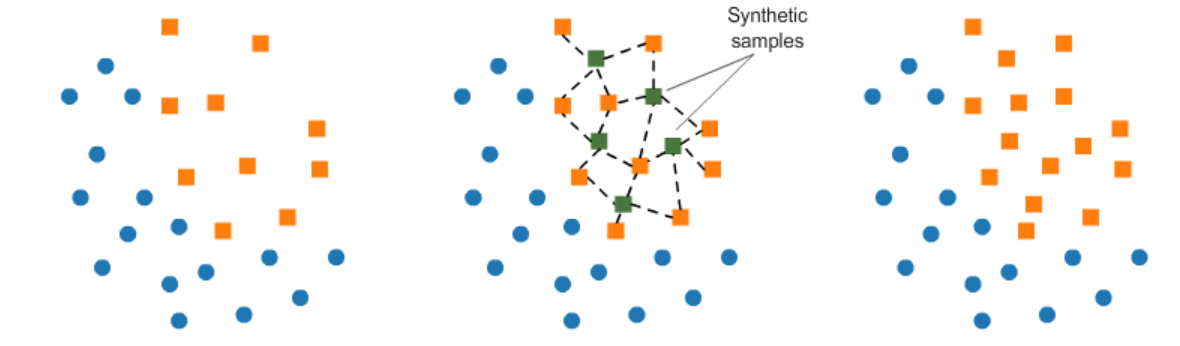 </div> 

In [85]:
# helper function to create SMOTE data
def SMOTE_df(df_selected, strategy = 'auto'):
    
    # using 'df_selected' to split the data
    X_train, X_test, y_train, y_test = split_df(df_selected)
    
    fig, ax = plt.subplots(figsize = (5,3), nrows = 1, ncols = 2)
    
    # before SMOTE
    sns.countplot(x = y_train, palette = ['#5D6D7E', '#E74C3C'], ax = ax[0])
    ax[0].set_title('Before SMOTE')
    for i, val in enumerate(y_train.value_counts().sort_index(ascending = True)):
        ax[0].text(i, val, val, ha = 'center', va = 'top')

    # after SMOTE
    oversample = SMOTE(sampling_strategy = strategy, random_state = 42)
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    sns.countplot(x = y_train, palette = ['#5D6D7E', '#E74C3C'], ax = ax[1])
    ax[1].set_title('After SMOTE')
    for i, val in enumerate(y_train.value_counts().sort_index(ascending = True)):
        ax[1].text(i, val, val, ha = 'center', va = 'top')
    plt.tight_layout()
    plt.show()
    
    return X_train, X_test, y_train, y_test

### Baseline model

#### Using all variables

We will use `df_dummied` to train the baseline models.

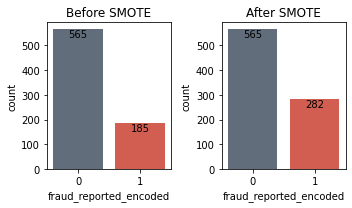

====================== Baseline Model ======================
class_weight: {0: 0.33293978748524206, 1: 0.667060212514758}
scale_pos_weight: 2.00354609929078 

======== LogReg classification metrics ========
Train score: 0.81
Test score: 0.656
[[140  48]
 [ 38  24]]
======== KNN classification metrics ========
Train score: 0.674
Test score: 0.54
[[ 85 103]
 [ 12  50]]
======== SVC classification metrics ========
Train score: 0.921
Test score: 0.744
[[170  18]
 [ 46  16]]
======== RF classification metrics ========
Train score: 1.0
Test score: 0.776
[[175  13]
 [ 43  19]]
======== XGBoost classification metrics ========
Train score: 1.0
Test score: 0.808
[[165  23]
 [ 25  37]]
======== AdaBoost classification metrics ========
Train score: 0.885
Test score: 0.776
[[171  17]
 [ 39  23]]


Model  Train score  Test score  Sensitivity (TPR)  Specificity  \
0    LogReg        0.810       0.656              0.387        0.745   
1       KNN        0.674       0.540              0.806        0.452   
2       SVC        0.921       0.744              0.258        0.904   
3        RF        1.000       0.776              0.306        0.931   
4   XGBoost        1.000       0.808              0.597        0.878   
5  AdaBoost        0.885       0.776              0.371        0.910   

   Precision  F1-score    FPR  ROC AUC  
0      0.333     0.358  0.255    0.625  
1      0.327     0.465  0.548    0.641  
2      0.471     0.333  0.096    0.657  
3      0.594     0.404  0.069    0.829  
4      0.617     0.607  0.122    0.813  
5      0.575     0.451  0.090    0.806

In [86]:
# create baseline models using 'df_dummied' SMOTE
preprocessing, non_preprocessing = preprocessing_df(significant = False)

X_train, X_test, y_train, y_test = SMOTE_df(df_dummied, strategy = 0.5)
baseline_3, lr_3, knn_3, svc_3, rf_3, xg_3, ab_3 = create_baseline_model(weighting = True, significant_features = False)
baseline_3

#### Using only selected variables

We will use `df_dummied_significant` to train the baseline models.

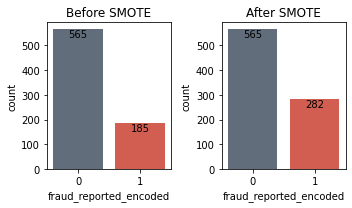

====================== Baseline Model ======================
class_weight: {0: 0.33293978748524206, 1: 0.667060212514758}
scale_pos_weight: 2.00354609929078 

======== LogReg classification metrics ========
Train score: 0.779
Test score: 0.676
[[138  50]
 [ 31  31]]
======== KNN classification metrics ========
Train score: 0.837
Test score: 0.744
[[148  40]
 [ 24  38]]
======== SVC classification metrics ========
Train score: 0.855
Test score: 0.784
[[158  30]
 [ 24  38]]
======== RF classification metrics ========
Train score: 1.0
Test score: 0.804
[[168  20]
 [ 29  33]]
======== XGBoost classification metrics ========
Train score: 1.0
Test score: 0.784
[[156  32]
 [ 22  40]]
======== AdaBoost classification metrics ========
Train score: 0.858
Test score: 0.784
[[161  27]
 [ 27  35]]


Model  Train score  Test score  Sensitivity (TPR)  Specificity  \
0    LogReg        0.779       0.676              0.500        0.734   
1       KNN        0.837       0.744              0.613        0.787   
2       SVC        0.855       0.784              0.613        0.840   
3        RF        1.000       0.804              0.532        0.894   
4   XGBoost        1.000       0.784              0.645        0.830   
5  AdaBoost        0.858       0.784              0.565        0.856   

   Precision  F1-score    FPR  ROC AUC  
0      0.383     0.434  0.266    0.660  
1      0.487     0.543  0.213    0.764  
2      0.559     0.585  0.160    0.809  
3      0.623     0.574  0.106    0.834  
4      0.556     0.597  0.170    0.821  
5      0.565     0.565  0.144    0.828

In [87]:
# create baseline models using 'df_dummied_significant' SMOTE
preprocessing, non_preprocessing = preprocessing_df(significant = True)

X_train, X_test, y_train, y_test = SMOTE_df(df_dummied_significant, strategy = 0.5)
baseline_4, lr_4, knn_4, svc_4, rf_4, xg_4, ab_4 = create_baseline_model(weighting = True, significant_features = True)
baseline_4

### Hyperparameter tuning

#### Using all variables

We will use `df_dummied` to train the models using hyperparameter tuning.

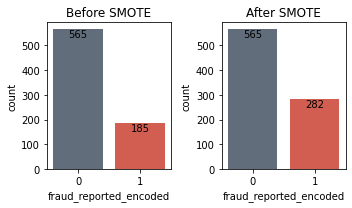

In [88]:
# using 'df_dummied' to split the data SMOTE
X_train, X_test, y_train, y_test = SMOTE_df(df_dummied, strategy = 0.5)
weight = {0:y_train.value_counts(normalize = True)[1], 
          1:y_train.value_counts(normalize = True)[0]}
weight_xg = y_train.value_counts(normalize = True)[0]/y_train.value_counts(normalize = True)[1]

# instantiate a dict for save the best params
tuning_params_3 = dict()

# instantiate a dict for save the model
tuning_model_3 = dict()

In [89]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = False)
lr_pipe = Pipeline([('union', union),
                    ('lr', LogisticRegression(n_jobs = -1, max_iter = 200))])

lr_values = {'lr__solver': ['liblinear'],
             'lr__penalty': ['l1', 'l2'],
             'lr__C': np.logspace(-5, 5, 50),
             'lr__class_weight':[weight, None]}

# rs_lr = RandomizedSearchCV(lr_pipe, lr_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_lr = GridSearchCV(lr_pipe, lr_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_lr.fit(X_train, y_train)
print(rs_lr.best_params_)

tuning_params_3['lr'] = rs_lr.best_params_
tuning_model_3['lr'] = rs_lr

{'lr__C': 13.257113655901108, 'lr__class_weight': {0: 0.33293978748524206, 1: 0.667060212514758}, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
Wall time: 26.5 s


In [90]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = False)
knn_pipe = Pipeline([('union', union),
                     ('knn', KNeighborsClassifier(n_jobs = -1))])

knn_values = {'knn__n_neighbors':np.arange(3, 20, 1),
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto']}
             
# rs_knn = RandomizedSearchCV(knn_pipe, knn_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_knn = GridSearchCV(knn_pipe, knn_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_knn.fit(X_train, y_train)
print(rs_knn.best_params_)

tuning_params_3['knn'] = rs_knn.best_params_
tuning_model_3['knn'] = rs_knn

{'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 6, 'knn__weights': 'uniform'}
Wall time: 9.96 s


In [91]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = False)
svc_pipe = Pipeline([('union', union),
                     ('svc', SVC(kernel = 'rbf', probability = True))])

svc_values = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__class_weight': [weight, None]}
             
# rs_svc = RandomizedSearchCV(svc_pipe, svc_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_svc = GridSearchCV(svc_pipe, svc_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_svc.fit(X_train, y_train)
print(rs_svc.best_params_)

tuning_params_3['svc'] = rs_svc.best_params_
tuning_model_3['svc'] = rs_svc

{'svc__C': 1000, 'svc__class_weight': None, 'svc__gamma': 0.001}
Wall time: 48.5 s


In [92]:
%%time
rf = RandomForestClassifier(n_jobs = -1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'class_weight':[weight, None]}

rs_rf = RandomizedSearchCV(rf, rf_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_rf = GridSearchCV(rf, rf_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_rf.fit(X_train, y_train)
print(rs_rf.best_params_)

tuning_params_3['rf'] = rs_rf.best_params_
tuning_model_3['rf'] = rs_rf

{'n_estimators': 250, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 90, 'class_weight': {0: 0.33293978748524206, 1: 0.667060212514758}}
Wall time: 1min 10s


In [93]:
%%time
xg = XGBClassifier(objective = 'binary:logistic', booster = 'gbtree', eval_metric = 'logloss', n_jobs = -1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'scale_pos_weight':[1, weight_xg]}

rs_xg = RandomizedSearchCV(xg, xg_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_xg = GridSearchCV(xg, xg_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_xg.fit(X_train, y_train)
print(rs_xg.best_params_)

tuning_params_3['xg'] = rs_xg.best_params_
tuning_model_3['xg'] = rs_xg

{'scale_pos_weight': 2.00354609929078, 'reg_lambda': 0.01, 'reg_alpha': 0.05, 'n_estimators': 350, 'max_depth': 4, 'gamma': 3, 'eta': 0.05}
Wall time: 2min 5s


In [94]:
%%time
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
             'learning_rate':[0.05, 0.1, 0.3, 0.5]}
             
rs_ab = RandomizedSearchCV(ab, ab_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_ab = GridSearchCV(ab, ab_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_ab.fit(X_train, y_train)
print(rs_ab.best_params_)

tuning_params_3['ab'] = rs_ab.best_params_
tuning_model_3['ab'] = rs_ab

{'n_estimators': 200, 'learning_rate': 0.05}
Wall time: 1min 4s


In [95]:
# put those models to dict of clfs
clfs = {'LogReg':tuning_model_3['lr'], 'KNN':tuning_model_3['knn'], 'SVC':tuning_model_3['svc'], 
        'RF':tuning_model_3['rf'], 'XGBoost':tuning_model_3['xg'], 'AdaBoost':tuning_model_3['ab']}

# evaluate the model
list_of_score = []
for name, model in clfs.items():
    score_dict = scores(model, name, tuning = True)
    list_of_score.append(score_dict)

# create DataFrame from list_of_score 
tuning_3 = pd.DataFrame(list_of_score)
tuning_3

======== LogReg classification metrics ========
CV scores: 0.64
Train score: 0.745
Test score: 0.403
[[139  49]
 [ 34  28]]
======== KNN classification metrics ========
CV scores: 0.603
Train score: 0.665
Test score: 0.459
[[89 99]
 [14 48]]
======== SVC classification metrics ========
CV scores: 0.691
Train score: 0.951
Test score: 0.47
[[162  26]
 [ 35  27]]
======== RF classification metrics ========
CV scores: 0.72
Train score: 0.919
Test score: 0.602
[[164  24]
 [ 25  37]]
======== XGBoost classification metrics ========
CV scores: 0.793
Train score: 0.937
Test score: 0.667
[[164  24]
 [ 19  43]]
======== AdaBoost classification metrics ========
CV scores: 0.76
Train score: 0.814
Test score: 0.609
[[161  27]
 [ 23  39]]


Model  CV scores  Train score  Test score  Sensitivity (TPR)  \
0    LogReg      0.640        0.745       0.403              0.452   
1       KNN      0.603        0.665       0.459              0.774   
2       SVC      0.691        0.951       0.470              0.435   
3        RF      0.720        0.919       0.602              0.597   
4   XGBoost      0.793        0.937       0.667              0.694   
5  AdaBoost      0.760        0.814       0.609              0.629   

   Specificity  Precision  F1-score    FPR  ROC AUC  
0        0.739      0.364     0.403  0.261    0.638  
1        0.473      0.327     0.459  0.527    0.667  
2        0.862      0.509     0.470  0.138    0.710  
3        0.872      0.607     0.602  0.128    0.804  
4        0.872      0.642     0.667  0.128    0.833  
5        0.856      0.591     0.609  0.144    0.836

#### Using only selected variables

We will use `df_dummied_significant` to train the models using hyperparameter tuning.

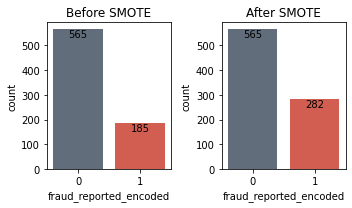

In [96]:
# using 'df_dummied_significant' to split the data SMOTE
X_train, X_test, y_train, y_test = SMOTE_df(df_dummied_significant, strategy = 0.5)
weight = {0:y_train.value_counts(normalize = True)[1], 
          1:y_train.value_counts(normalize = True)[0]}
weight_xg = y_train.value_counts(normalize = True)[0]/y_train.value_counts(normalize = True)[1]

# instantiate a dict for save the best params
tuning_params_4 = dict()

# instantiate a dict for save the model
tuning_model_4 = dict()

In [97]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = True)
lr_pipe = Pipeline([('union', union),
                    ('lr', LogisticRegression(n_jobs = -1, max_iter = 200))])

lr_values = {'lr__solver': ['liblinear'],
             'lr__penalty': ['l1', 'l2'],
             'lr__C': np.logspace(-5, 5, 50),
             'lr__class_weight':[weight, None]}

# rs_lr = RandomizedSearchCV(lr_pipe, lr_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_lr = GridSearchCV(lr_pipe, lr_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_lr.fit(X_train, y_train)
print(rs_lr.best_params_)

tuning_params_4['lr'] = rs_lr.best_params_
tuning_model_4['lr'] = rs_lr

{'lr__C': 86.85113737513521, 'lr__class_weight': {0: 0.33293978748524206, 1: 0.667060212514758}, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Wall time: 15.3 s


In [98]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = True)
knn_pipe = Pipeline([('union', union),
                     ('knn', KNeighborsClassifier(n_jobs = -1))])

knn_values = {'knn__n_neighbors':np.arange(3, 20, 1),
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto']}
             
# rs_knn = RandomizedSearchCV(knn_pipe, knn_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_knn = GridSearchCV(knn_pipe, knn_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_knn.fit(X_train, y_train)
print(rs_knn.best_params_)

tuning_params_4['knn'] = rs_knn.best_params_
tuning_model_4['knn'] = rs_knn

{'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 13, 'knn__weights': 'distance'}
Wall time: 9.19 s


In [99]:
%%time
preprocessing, non_preprocessing = preprocessing_df(significant = True)
svc_pipe = Pipeline([('union', union),
                     ('svc', SVC(kernel = 'rbf', probability = True))])

svc_values = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__class_weight': [weight, None]}
             
# rs_svc = RandomizedSearchCV(svc_pipe, svc_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1')
rs_svc = GridSearchCV(svc_pipe, svc_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_svc.fit(X_train, y_train)
print(rs_svc.best_params_)

tuning_params_4['svc'] = rs_svc.best_params_
tuning_model_4['svc'] = rs_svc

{'svc__C': 100, 'svc__class_weight': {0: 0.33293978748524206, 1: 0.667060212514758}, 'svc__gamma': 0.01}
Wall time: 39.9 s


In [100]:
%%time
rf = RandomForestClassifier(n_jobs = -1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'class_weight':[weight, None]}

rs_rf = RandomizedSearchCV(rf, rf_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_rf = GridSearchCV(rf, rf_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_rf.fit(X_train, y_train)
print(rs_rf.best_params_)

tuning_params_4['rf'] = rs_rf.best_params_
tuning_model_4['rf'] = rs_rf

{'n_estimators': 600, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70, 'class_weight': {0: 0.33293978748524206, 1: 0.667060212514758}}
Wall time: 1min 11s


In [101]:
%%time
xg = XGBClassifier(objective = 'binary:logistic', booster = 'gbtree', eval_metric = 'logloss', n_jobs = -1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'scale_pos_weight':[1, weight_xg]}

rs_xg = RandomizedSearchCV(xg, xg_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_xg = GridSearchCV(xg, xg_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_xg.fit(X_train, y_train)
print(rs_xg.best_params_)

tuning_params_4['xg'] = rs_xg.best_params_
tuning_model_4['xg'] = rs_xg

{'scale_pos_weight': 2.00354609929078, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 350, 'max_depth': 3, 'gamma': 1, 'eta': 0.3}
Wall time: 1min 15s


In [102]:
%%time
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
             'learning_rate':[0.05, 0.1, 0.3, 0.5]}
             
rs_ab = RandomizedSearchCV(ab, ab_values, cv = 10, n_jobs = -1, random_state = 42, scoring = 'f1', n_iter = 25)
# rs_ab = GridSearchCV(ab, ab_values, cv = 10, n_jobs = -1, scoring = 'f1')
rs_ab.fit(X_train, y_train)
print(rs_ab.best_params_)

tuning_params_4['ab'] = rs_ab.best_params_
tuning_model_4['ab'] = rs_ab

{'n_estimators': 250, 'learning_rate': 0.05}
Wall time: 40.8 s


In [103]:
# put those models to dict of clfs
clfs = {'LogReg':tuning_model_4['lr'], 'KNN':tuning_model_4['knn'], 'SVC':tuning_model_4['svc'], 
        'RF':tuning_model_4['rf'], 'XGBoost':tuning_model_4['xg'], 'AdaBoost':tuning_model_4['ab']}

# evaluate the model
list_of_score = []
for name, model in clfs.items():
    score_dict = scores(model, name, tuning = True)
    list_of_score.append(score_dict)

# create DataFrame from list_of_score 
tuning_4 = pd.DataFrame(list_of_score)
tuning_4

======== LogReg classification metrics ========
CV scores: 0.652
Train score: 0.709
Test score: 0.417
[[140  48]
 [ 33  29]]
======== KNN classification metrics ========
CV scores: 0.734
Train score: 1.0
Test score: 0.573
[[148  40]
 [ 21  41]]
======== SVC classification metrics ========
CV scores: 0.782
Train score: 0.831
Test score: 0.691
[[159  29]
 [ 14  48]]
======== RF classification metrics ========
CV scores: 0.759
Train score: 0.851
Test score: 0.626
[[160  28]
 [ 21  41]]
======== XGBoost classification metrics ========
CV scores: 0.805
Train score: 0.885
Test score: 0.652
[[157  31]
 [ 17  45]]
======== AdaBoost classification metrics ========
CV scores: 0.754
Train score: 0.79
Test score: 0.619
[[163  25]
 [ 23  39]]


Model  CV scores  Train score  Test score  Sensitivity (TPR)  \
0    LogReg      0.652        0.709       0.417              0.468   
1       KNN      0.734        1.000       0.573              0.661   
2       SVC      0.782        0.831       0.691              0.774   
3        RF      0.759        0.851       0.626              0.661   
4   XGBoost      0.805        0.885       0.652              0.726   
5  AdaBoost      0.754        0.790       0.619              0.629   

   Specificity  Precision  F1-score    FPR  ROC AUC  
0        0.745      0.377     0.417  0.255    0.671  
1        0.787      0.506     0.573  0.213    0.771  
2        0.846      0.623     0.691  0.154    0.842  
3        0.851      0.594     0.626  0.149    0.825  
4        0.835      0.592     0.652  0.165    0.828  
5        0.867      0.609     0.619  0.133    0.842

# Model evaluation

In [104]:
# store the evaluation scores locally
eval_baselines = pd.concat([baseline_1.T, baseline_2.T, baseline_3.T, baseline_4.T], axis = 1)
eval_tunings = pd.concat([tuning_1.T, tuning_2.T, tuning_3.T, tuning_4.T], axis = 1)

eval_baselines.to_excel('dataset/eval_baselines.xlsx')
eval_tunings.to_excel('dataset/eval_tunings.xlsx')

These are the model evaluation metrics for each model:
- Overall, `XGBoost` models have better performance compared to the other model in terms of `F1-score` and `ROC AUC`. `XGBoost` models are always maximizing the `TPR` and minimizing the `FPR`.
- The "baseline" models of `RF` and `XGBoost` are overfitting the training set.
- For the "baseline" models using "all features" data, `SVC` model catches fraud as many as possible (high `TPR`), yet the `FPR` is also very high. When using "feature selection", the `FPR` is decreasing and the performance is getting better. The other model performances are also getting better when we use "feature selection". Therefore, *using "feature selection" to train a machine learning model increases the model performance*. This could happen because we have reduced the noisy and irrelevant features from the dataset which is not significant to predict fraudulent claims.
- `XGboost` is the best model, but `SVC` also perform well too especially when the `SVC`s are feeded with "feature selection" data.

<img src="image/model_evaluation.jpg" width="1800">

# Select the best model: XGBoost

- The best dataset to train the machine learning model for our case is "feature selection" dataset.
- The best model to detect fraudulent claims are `XGBoost` and `SVC` which train using "feature selection" data and "class weighting" technique. In fact, both models have quite similar performance, yet `XGBoost` performance is slightly better than `SVC` performance. Therefore, we will use `XGBoost` as the final model to identify fraudulent claims.

In [105]:
def create_confusion_matrix(cf_matrix, name):
    # labels for confusion matrix
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ['n = {:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{:.2%}'.format(value) for value in cf_matrix.flatten()/sum(cf_matrix.flatten())]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.array(labels).reshape(2,2)

    # create heatmap of confusion matrix
    fix, ax = plt.subplots(figsize=(5,4))
    ax = sns.heatmap(cf_matrix, annot = labels,
                     xticklabels = ['Predicted as\nNot Fraud','Predicted as\nFraud'],
                     yticklabels = ['Actual: Not Fraud','Actual: Fraud'],
                     annot_kws = {"size": 10}, linewidths = 0.1,
                     fmt = '', cmap = 'Blues')

    ax.set_title('Confusion matrix of {}'.format(name), fontsize = 12,  fontweight = 'bold')
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'center', rotation = 0)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
#     plt.savefig('cf_df_original.PNG')
    plt.show()

## Model performance

The number of cases for each class of the test set (unseen data) is shown in the confusion matrix below. The y-axis denotes the actual classes while the x-axis denotes the predicted classes. 
- True Negative (`TN`) indicates to non-fraud claims that are correctly classified as non-fraud cases.
- True Positive (`TP`) indicates to fraud claims that are correctly classified as fraud cases.
- False Negative (`FN`) are fraud cases that are classified as non-fraud cases.
- False Positive (`FP`) are non-fraud cases that are classified as fraud cases.

In [106]:
# using 'df_dummied_significant' to split the data
X_train, X_test, y_train, y_test = split_df(df_dummied_significant)

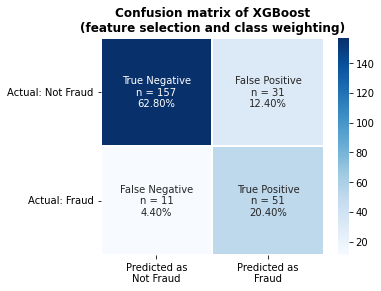

              precision    recall  f1-score   support

   Not Fraud       0.93      0.84      0.88       188
       Fraud       0.62      0.82      0.71        62

    accuracy                           0.83       250
   macro avg       0.78      0.83      0.80       250
weighted avg       0.86      0.83      0.84       250

                  Model Metrics
Model                   XGBoost
CV scores                 0.752
Train score               0.773
Test score                0.708
Sensitivity (TPR)         0.823
Specificity               0.835
Precision                 0.622
F1-score                  0.708
FPR                       0.165
ROC AUC                   0.848


In [107]:
# create confusion matrix of the best model
y_pred = tuning_model_2['xg'].predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
create_confusion_matrix(cf_matrix, 'XGBoost\n(feature selection and class weighting)')

# classification report
print(classification_report(y_test, y_pred, target_names = ['Not Fraud',"Fraud"]))

# detail scores
best_model_scores =  pd.DataFrame(tuning_2.T.iloc[:, 4])
best_model_scores.columns = ['Model Metrics']
print(best_model_scores)

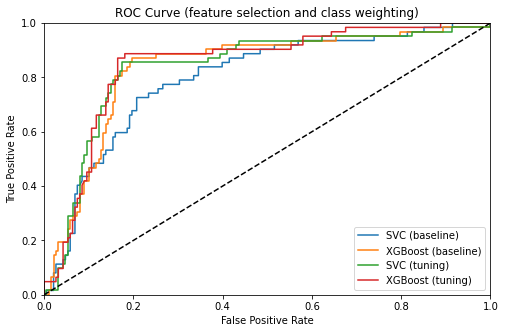

In [108]:
# ROC curve

# compute predicted probabilities
fig, ax = plt.subplots(figsize = (8, 5))
model_to_plot = {'svc_baseline':svc_2, 'xg_baseline':xg_2,
                 'svc_tuning':tuning_model_2['svc'], 'xg_tuning':tuning_model_2['xg']}
fpr_roc = dict()
tpr_roc = dict()
for name, model in model_to_plot.items():
    # generate ROC curve values
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    fpr_roc[name] = fpr
    tpr_roc[name] = tpr
    
# plot ROC curve
ax.plot(fpr_roc['svc_baseline'], tpr_roc['svc_baseline'], label = 'SVC (baseline)')
ax.plot(fpr_roc['xg_baseline'], tpr_roc['xg_baseline'], label = 'XGBoost (baseline)')
ax.plot(fpr_roc['svc_tuning'], tpr_roc['svc_tuning'], label = 'SVC (tuning)') 
ax.plot(fpr_roc['xg_tuning'], tpr_roc['xg_tuning'], label = 'XGBoost (tuning)') 
ax.plot([0, 1], [0, 1], 'k--')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)    
ax.set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate', title = 'ROC Curve (feature selection and class weighting)')
plt.legend()
plt.show()

Here are some summaries about the the `XGBoost` model:

- Sensitivity (recall of fraud cases) is derived from: $\frac{TP}{(TP + FN)}$
    - Sensitivity summarizes our True Positive Rate (TPR) which is how many we got correct out of all the positive cases.
    - Sensitivity for the final model is `82.3%`.

- Specificity (recall of non-fraud cases) is derived from: $\frac{TN}{(TN + FP)}$
    - Specificity summarizes our True Negative Rate (TNR), which is how many we got correct out of all the negative cases.
    - Specificity for the final model is `83.5%`.

- Precision of fraud case is derived from: $\frac{TP}{(TP + FP)}$
    - Precision of fraud cases summarize the accuracy of fraud cases detected. That is, out of all that we predict as fraud, how many are correct.
    - Precision of fraud detection is `62.2%`.
    
- Precision of non-fraud case is derived from: $\frac{TN}{(TN + FN)}$
    - Precision of non-fraud cases summarize the accuracy of non-fraud cases detected. That is, out of all that we predict as non-fraud, how many are correct.
    - Precision of non-fraud detection is `93.0%`.

- F1-score is the harmonic mean of Sensitivity and Precision and is derived from:  $\frac{2 \times Sensitivity \times Precision}{(Sensitivity + Precision)}$
    - As we are interested on fraud cases, only the F1-score on fraud cases are reported.
    - The F1-score of the model is `70.8%`.
    
- False Positive Rate is derived from: $\frac{FP}{(FP + TN)}$
    - It is also called the false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative.
    - The FPR of the model is `16.5%`.

- ROC AUC score is derived from calculating the Area Under Curve of ROC curve.
    - ROC curve can be made by plotting False Positive Rate (FPR) on X-axis vs. True Positive Rate (TPR) on Y-axis for a number of different candidate threshold values between 0.0 and 1.0. In other words, it plots the false alarm rate versus the hit rate.
    - It summarizes how well our model is at balancing between the True Positive Rate (Sensitivity) and the False Positive Rate (1-Specificity).
    - Ideally, the best ROC AUC score is 100%. To achieve this, we have to make a model which have a 100% TPR of predicting fraud and a 0% FPR of predicting fraud. This means that we have a perfect prediction for both classes. However, for imbalance class problem, this case is hardly to achieve.
    - The ROC AUC score of the model is `84.8%`.

Previously, we have already defined our baseline scores for `F1-score` is `39.7%` and `ROC AUC` is `70%`. In sum, our model has outperformed the baseline scores of `F1-score` and `ROC AUC` by a huge margin.

## Model interpretability

### Feature importance

Feature importance refers to a technique that assign a score to the input features based on how useful or valuable they are at predicting a target variable.

As we use `XGBoost` as our best model, feature importance can be calculated by counting the number of features which use in the construction of the boosted trees within the model. The more often a feature is used to make key decisions or splits in every decision trees of `XGBoost`, the higher its relative importance.

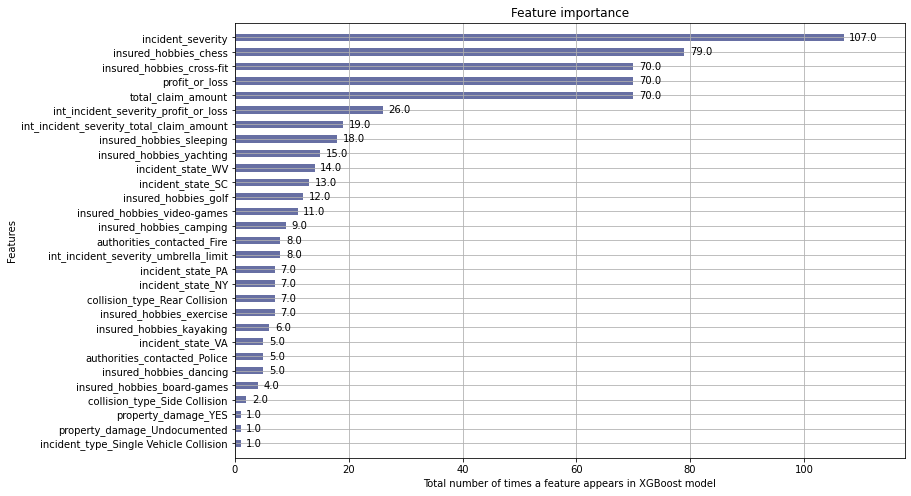

In [109]:
# plot feature importance
fig, ax = plt.subplots(figsize = (12,8))
plot_importance(tuning_model_2['xg'].best_estimator_, 
                importance_type = 'weight', 
                height=0.5, 
                xlabel ='Total number of times a feature appears in XGBoost model',
                color = '#676FA3',
                ax = ax)
# plt.savefig('feature_importanace.PNG',  bbox_inches = "tight")
plt.show()

Insights:
- `incident_severity` seems to be the most important feature to split the decision trees in `XGBoost` model, then followed by `insured_hobbies_chess`. `insured_hobbies_cross-fit`, `profit_or_loss`, and `total_claim_amount` features give the same number of times to split the trees.
- Note that, this feature importance plot only provides information about how many times the features are being used as the construction of decision trees within the `XGBoost` model. This plot **does not tell us** how is the contribution of each feature to the output prediction.

### Shapley values

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. Shapley values can be used to interpret any "black box" machine learning model by explaining the contribution of each feature to their output prediction. [[10]](https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/#h2_1)[[11]](https://medium.com/geekculture/shapley-value-explaining-ai-190cd836a045#:~:text=The%20Shapley%20value%20is%20characterized,external%20enforcement%20of%20cooperative%20behavior.)

In a simple mathematical explanation, given a single observation data $i$ with $N$ features ($X_{i} = [X_{i}^{1}, X_{i}^{2}, ...,X_{i}^{N}]$), a trained machine learning model $f(X)$, and expected output prediction of a trained machine learning model, $E[f(X)]$. If we feed that input $X_{i}$ to a machine learning model $f(X)$, then we get the output prediction $f(X_{i}) = \hat{y}_{i}$. So, shapley values can explain the contribution of each feature $X_{i}^{1}, X_{i}^{2}, ...,X_{i}^{N}$ to the differences between the expected output prediction $E[f(X)]$ and an output prediction $f(X_{i}) = \hat{y}_{i}$. In simple words, it tries to find fair distribution of gains (surplus) among different features as they collaborate.

The beeswarm plot which contains each shapley value of each feature of all observations in `X_train` is plotted below. Also the feature importance plot based on the average absolute shapley values of each feature of all observations in `X_train` is plotted.

*Note: the units on the x-axis are log-odds units, so negative shap values imply probabilies of less than 0.5 that the person commits to fraud and positive shape values imply otherwise*.
$$log_{odds} = log(\frac{p}{1-p}) = \beta_0 + \beta_1 x_1 + ... + \beta_N x_N$$
$$p = \frac{e^{log_{odds}}}{1 + e^{log_{odds}}}$$

#### Overall data

In [110]:
# using 'df_dummied_significant' to split the data
X_train, X_test, y_train, y_test = split_df(df_dummied_significant)

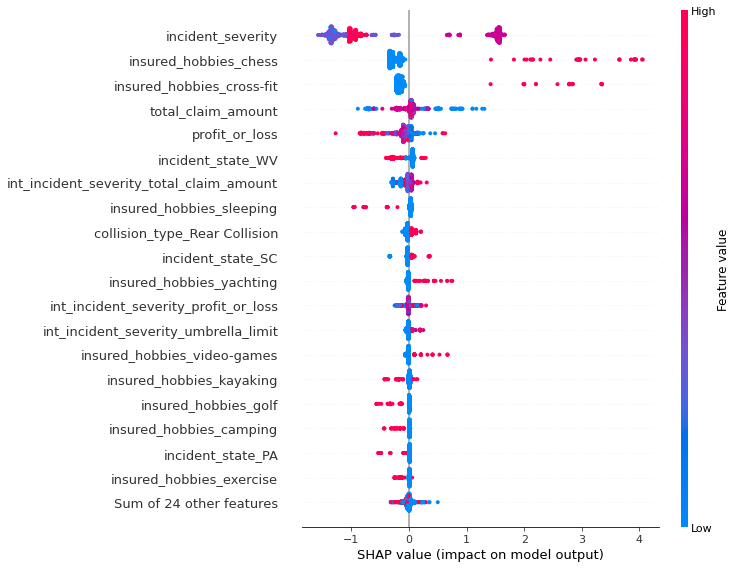

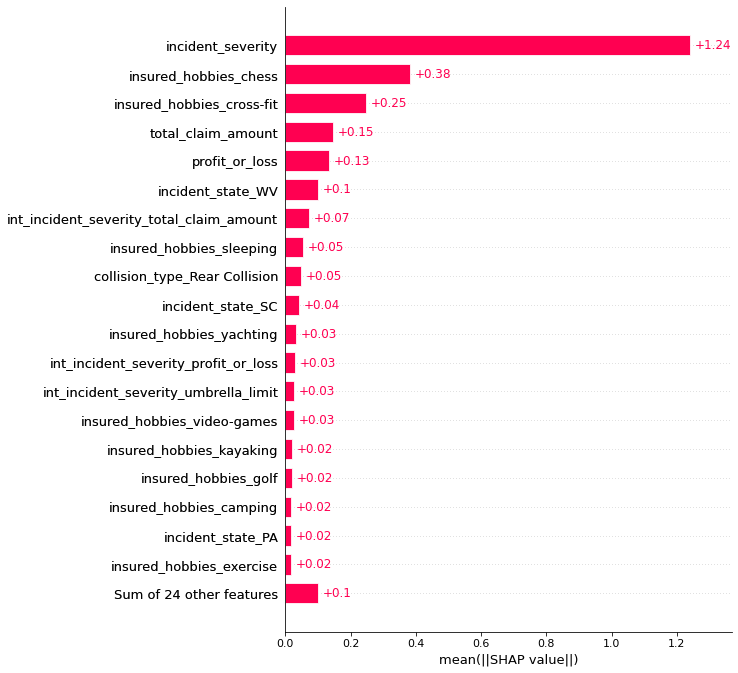

In [111]:
# compute SHAP values of each feature in X_train data
shap.initjs()
explainer = shap.Explainer(tuning_model_2['xg'].best_estimator_)
shap_values = explainer(X_train)

# plot SHAP values of each feature in X_test data as beeswarm plot
shap.plots.beeswarm(shap_values, max_display = 20)
                   
# plot the feature importance base on absolute SHAP values
shap.plots.bar(shap_values.abs, max_display = 20)

Insights:
- `incident_severity` is the most impactful feature in contributing to the output prediction of the `XGBoost` model, then followed `insured_hobbies_chess` and `insured_hobbies_cross-fit`.
- High values on `incident_severity` (red points on beeswarm plot) is likely decreasing the probability of a person committing to fraud whereas medium values on `incident_severity` (purple points on beeswarm plot) is more likely increasing the probability of a person committing to fraud.
- chess player and cross-fitter are likely increasing the probability of a person committing to fraud.
- A person who has incident on "WV" state (red points on beeswarm plot) is likely decreasing their probability of comitting to fraud.

#### Single observation

In [112]:
# helper function to examine how is the contribution of each feature given a single data observation
def check_contribution(i, model, X, y, display_sample):
    temp_sample = pd.concat([X.iloc[[i],:], y.to_frame().iloc[[i], :]], axis = 1)
    y_pred_prob = model.predict_proba(X.iloc[[i], :])[:, 1][0] * 100
    y_pred = model.predict(X.iloc[[i], :])
    if display_sample == True:
        display(temp_sample)
    print('Fraud status (actual): {}'.format(temp_sample['fraud_reported_encoded'].values))
    print('Fraud status (prediction): {}'.format(y_pred))
    print('Probability of committing to fraud: {}%'.format(round(y_pred_prob, 3)))
    
    # calculate the shap values for each observation on all the features in training set
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    # plot the contribution of each feature
    waterfall = shap.plots.waterfall(explainer(X)[i])
    force_plot = shap.force_plot(explainer.expected_value, shap_values[i], features = X.iloc[i, :], feature_names = X.columns) 
    return force_plot, waterfall

In [113]:
# create 'temp_X_train' and 'temp_y_train' which contain an additional feature of predicted probability of comitting to fraud
temp_X_train = X_train.copy()
temp_X_train['probability_of_fraud'] = tuning_model_2['xg'].best_estimator_.predict_proba(X_train)[:, 1]
temp_X_train = temp_X_train.sort_values('probability_of_fraud', ascending = False)
temp_y_train = y_train[temp_X_train.index]

======================================================= row 0 =======================================================
Fraud status (actual): [1]
Fraud status (prediction): [1]
Probability of committing to fraud: 98.67%


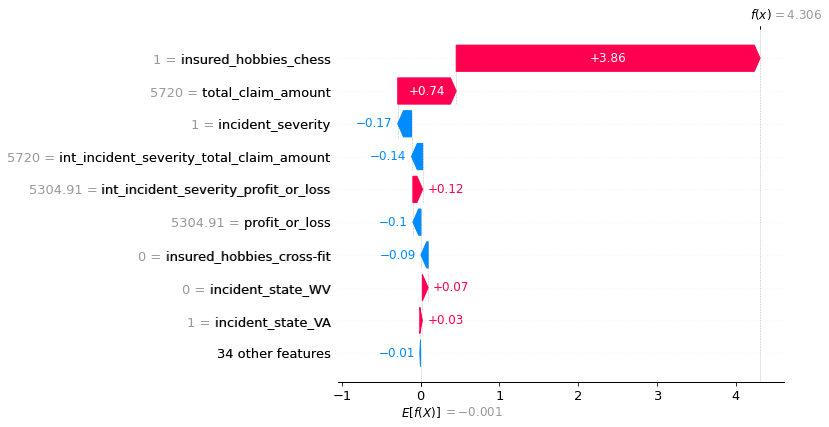

======================================================= row 5 =======================================================
Fraud status (actual): [1]
Fraud status (prediction): [1]
Probability of committing to fraud: 97.04%


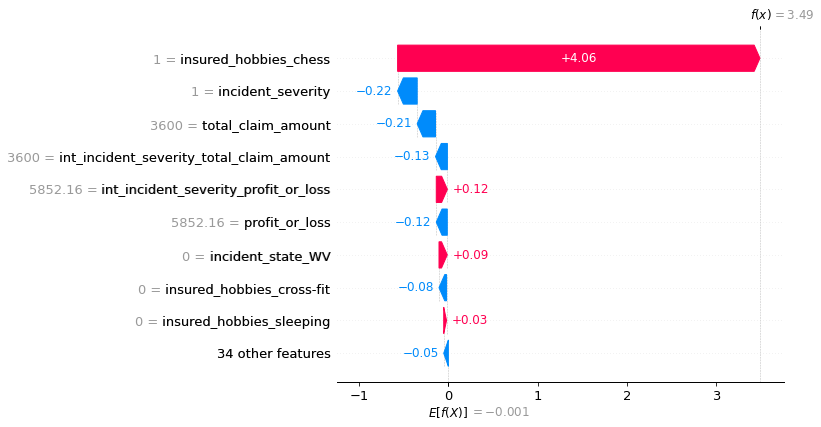

======================================================= row 10 =======================================================
Fraud status (actual): [1]
Fraud status (prediction): [1]
Probability of committing to fraud: 95.929%


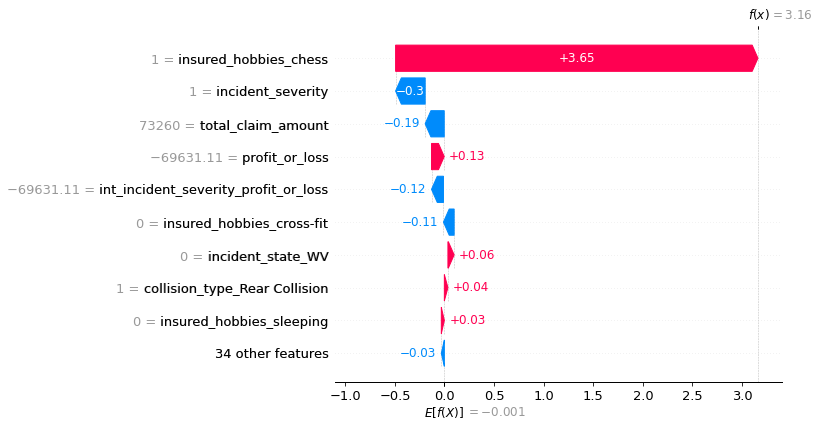

======================================================= row 15 =======================================================
Fraud status (actual): [0]
Fraud status (prediction): [1]
Probability of committing to fraud: 95.39%


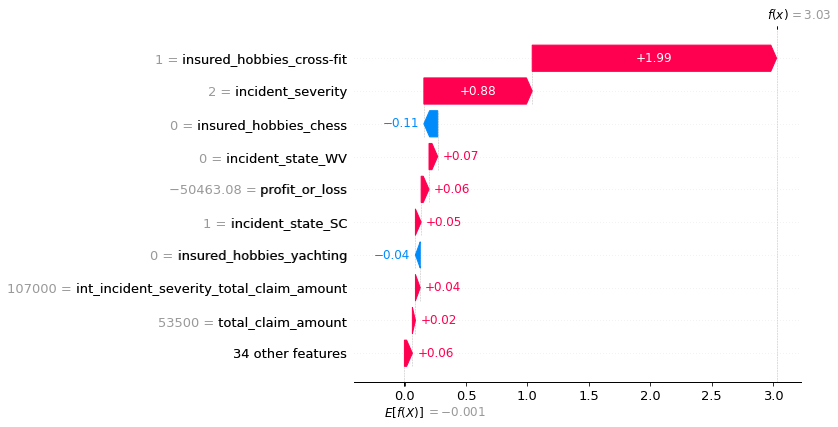

======================================================= row 20 =======================================================
Fraud status (actual): [1]
Fraud status (prediction): [1]
Probability of committing to fraud: 95.13%


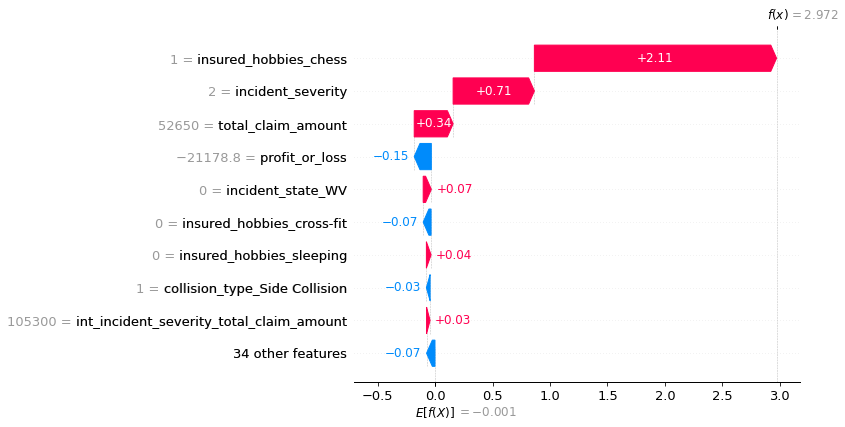

======================================================= row 25 =======================================================
Fraud status (actual): [1]
Fraud status (prediction): [1]
Probability of committing to fraud: 93.328%


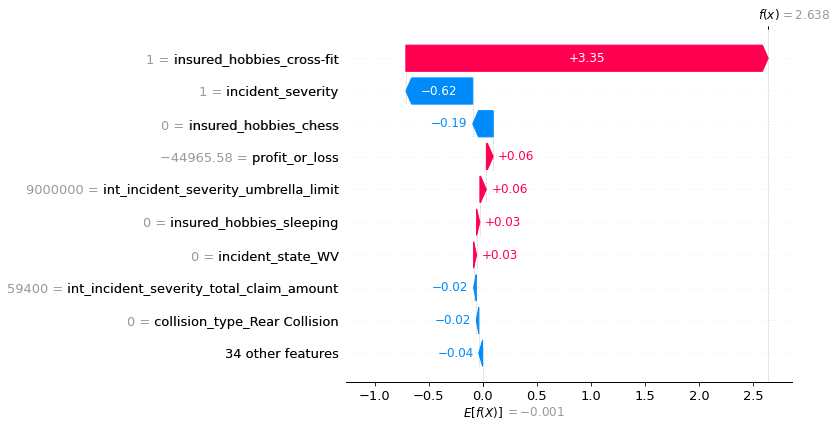

======================================================= row 30 =======================================================
Fraud status (actual): [1]
Fraud status (prediction): [1]
Probability of committing to fraud: 91.873%


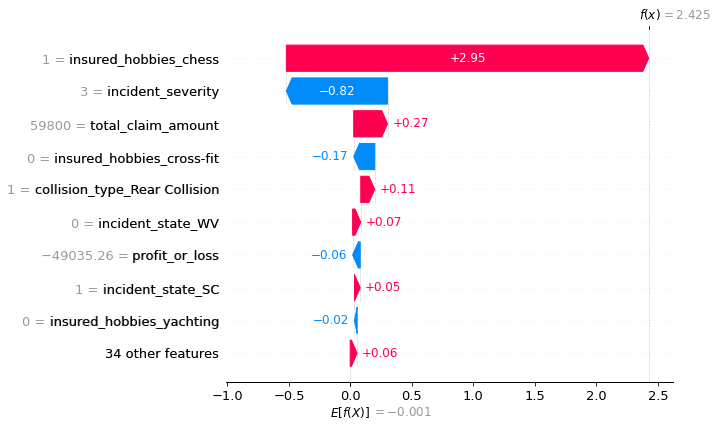

======================================================= row 35 =======================================================
Fraud status (actual): [1]
Fraud status (prediction): [1]
Probability of committing to fraud: 90.405%


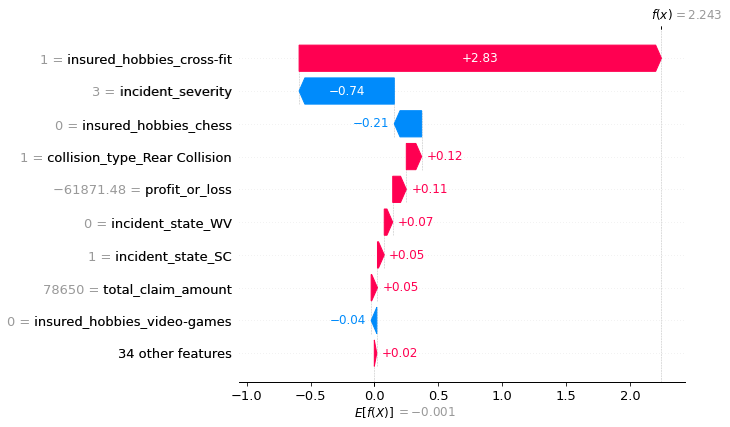

======================================================= row 40 =======================================================
Fraud status (actual): [1]
Fraud status (prediction): [1]
Probability of committing to fraud: 89.372%


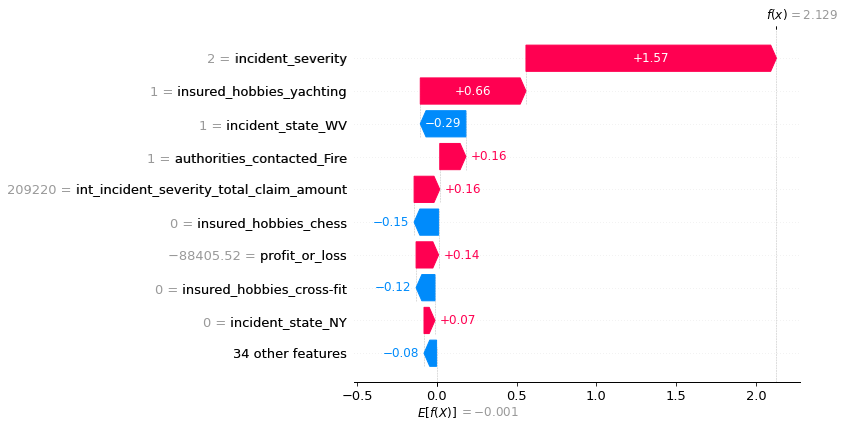

======================================================= row 45 =======================================================
Fraud status (actual): [1]
Fraud status (prediction): [1]
Probability of committing to fraud: 88.893%


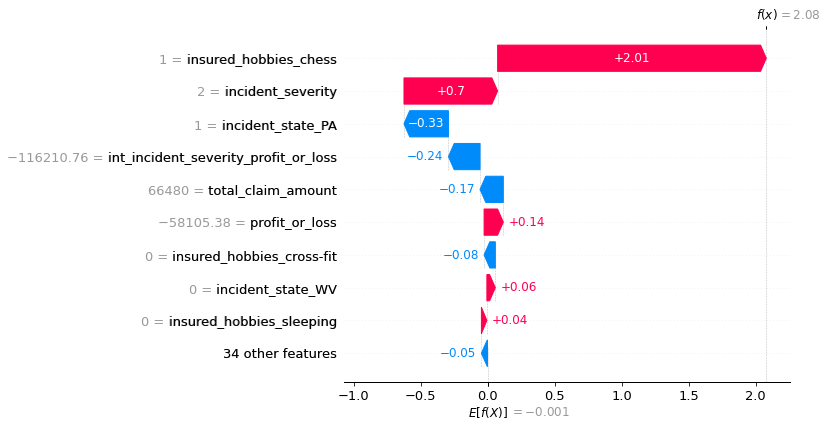

In [114]:
# examine the contribution of each feature on a single observation
for i in range(10):
    print('='*55, f'row {i*5}', '='*55)
    force_plot, waterfall = check_contribution(i = i*5, 
                                               model = tuning_model_2['xg'].best_estimator_,
                                               X = temp_X_train.drop('probability_of_fraud', axis = 1), y = temp_y_train,
                                               display_sample = False)
    force_plot

======================================================= row -5 =======================================================
Fraud status (actual): [0]
Fraud status (prediction): [0]
Probability of committing to fraud: 2.543%


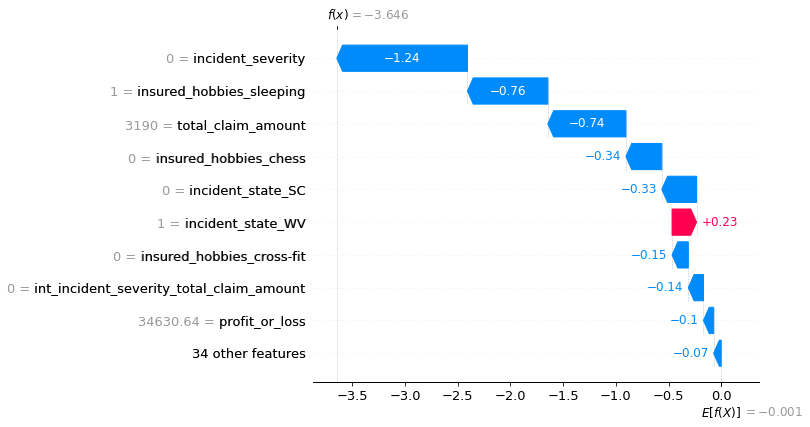

======================================================= row -10 =======================================================
Fraud status (actual): [0]
Fraud status (prediction): [0]
Probability of committing to fraud: 2.972%


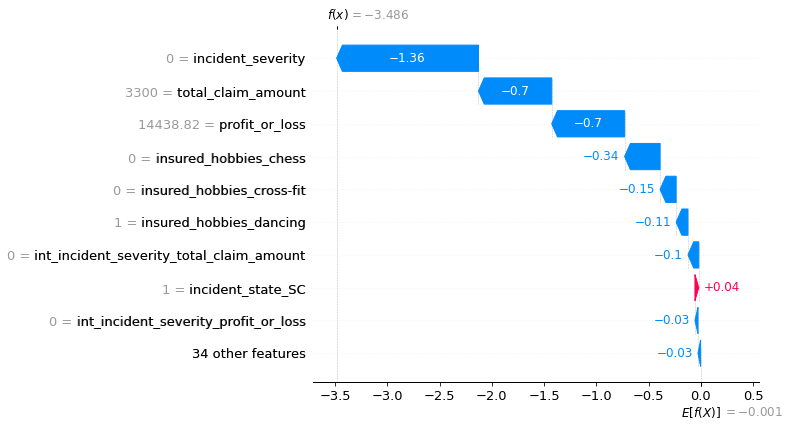

======================================================= row -15 =======================================================
Fraud status (actual): [0]
Fraud status (prediction): [0]
Probability of committing to fraud: 3.073%


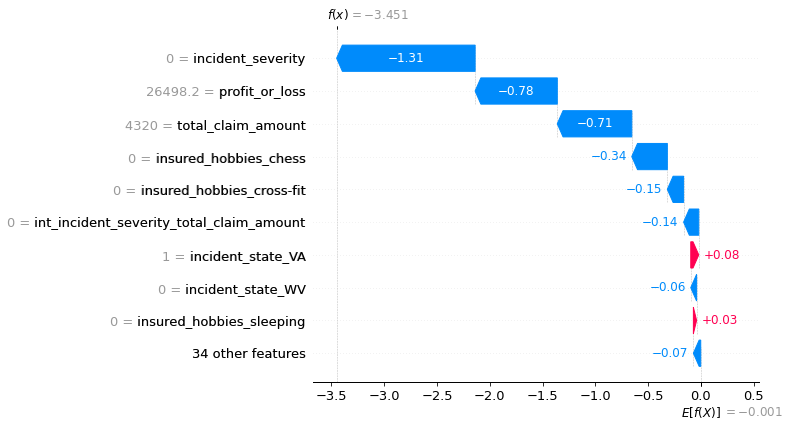

======================================================= row -20 =======================================================
Fraud status (actual): [0]
Fraud status (prediction): [0]
Probability of committing to fraud: 3.391%


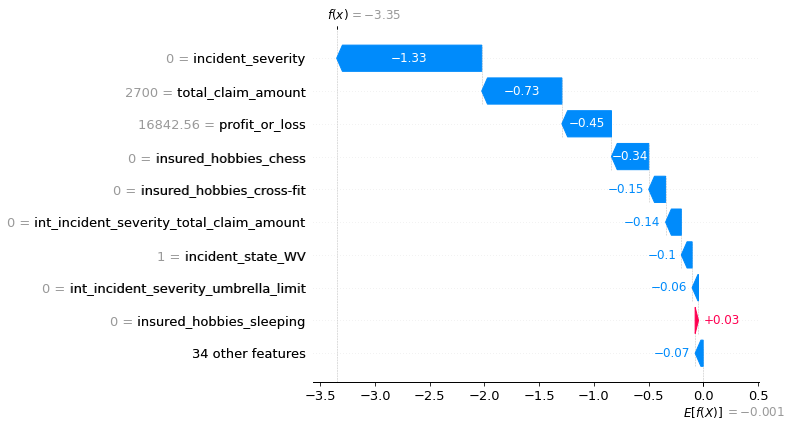

======================================================= row -25 =======================================================
Fraud status (actual): [0]
Fraud status (prediction): [0]
Probability of committing to fraud: 3.737%


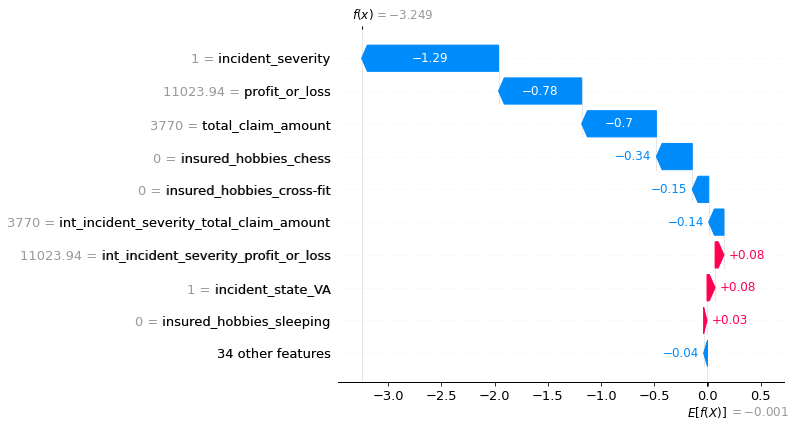

======================================================= row -30 =======================================================
Fraud status (actual): [0]
Fraud status (prediction): [0]
Probability of committing to fraud: 3.955%


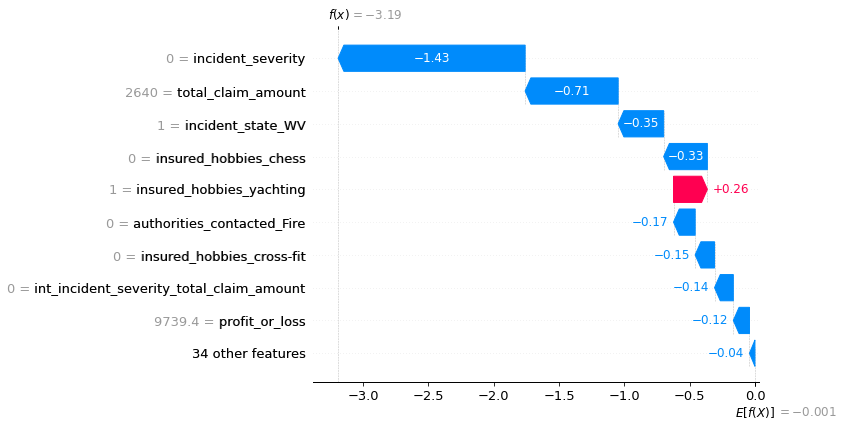

======================================================= row -35 =======================================================
Fraud status (actual): [0]
Fraud status (prediction): [0]
Probability of committing to fraud: 4.886%


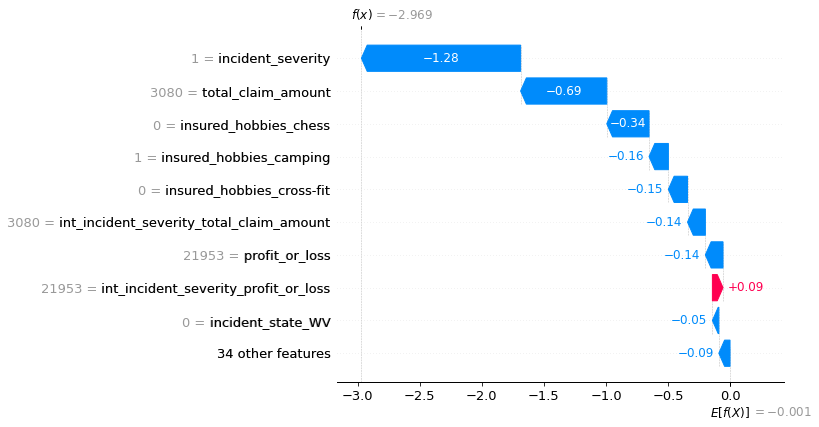

======================================================= row -40 =======================================================
Fraud status (actual): [0]
Fraud status (prediction): [0]
Probability of committing to fraud: 5.782%


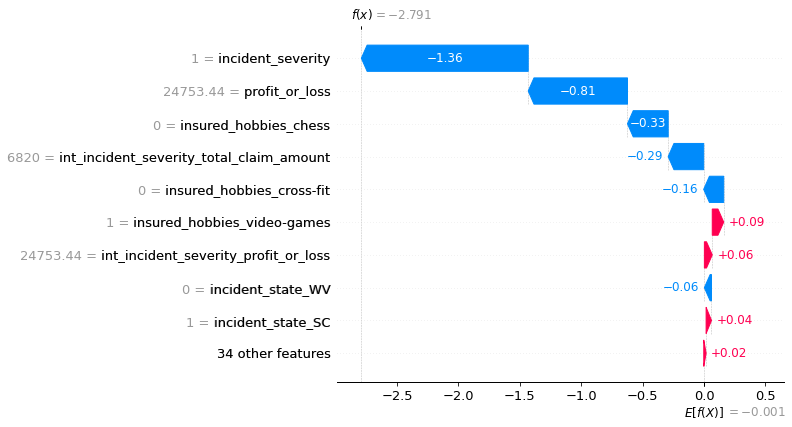

======================================================= row -45 =======================================================
Fraud status (actual): [0]
Fraud status (prediction): [0]
Probability of committing to fraud: 6.043%


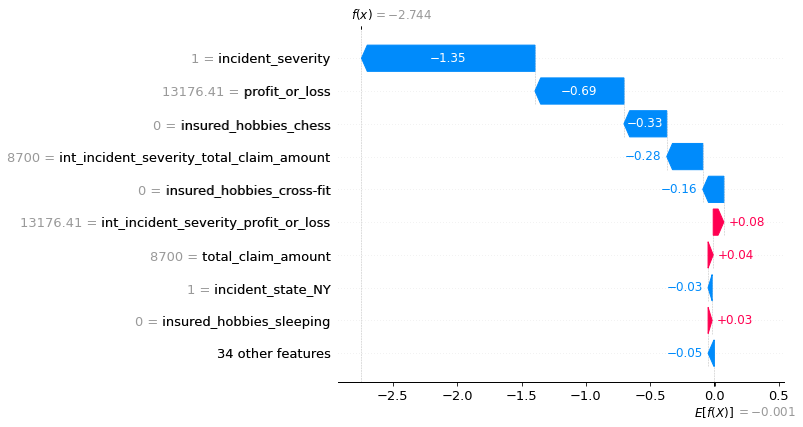

In [115]:
# examine the contribution of each feature on a single observation
for i in range(1, 10):
    print('='*55, f'row {-i*5}', '='*55)
    force_plot, waterfall = check_contribution(i = -i*5, 
                                               model = tuning_model_2['xg'].best_estimator_,
                                               X = temp_X_train.drop('probability_of_fraud', axis = 1), y = temp_y_train,
                                               display_sample = False)
    force_plot

### Model impact for business performance

The main objective of this project is to help the fraud analyst team to detect fraudulent claims more easily and efficiently, at least, we give them a good model to flag some potential fraudulent claims so they don't have to evaluate all out the claims. This will make their time more efficient to more focus on those potential fraudulent claims.

Given the unseen dataset (`X_test` and `y_test`) which contains `250` claims of `188` non-fraudulent claims and `62` fraudulent claims. By using this model, we have flagged `82` potential frauds among all of `250` claims with `62.2%` precision. So in overall, we correctly predict `51` actual fraud cases and incorrectly predict `31` claims as a fraud cases.

Assuming that the time required to evaluate and assess whether a claim is fraudulent or not is a week on average. If we have `250` claims, so it will take about `250 weeks` to evalute them manually! However, since we have this ML model, the fraud analysts could speed up the process on evaluating and assessing claims by focusing only on those potential fraudulent claims which is predicted by the model. They can save their time about `168 weeks`, that is `67.2%` more efficient than the normal time!


Assuming that the fraud analyst team has evaluated all of the potential fraudulent claims and assessed whether a claim is fraudulent or not. They infer that there are `51` fraudulent claims among `82` potential fraudulent claims detected by the model. We have cut the the total loss from the fraudulent claims about `2179703.55` USD (the avg is `42739.29 ± 17509.43` USD). 

Assuming that the fraud analyst team didn't evaluate and assess the non-potential fraudulent claims predicted by the model, hence the insurance company will has a total loss due to undetected fraudulent claims by the model about `428987.96` USD (the avg is `38998.91 ± 21972.54` USD).

In sum, we are able to minimize the total loss due to fraudulent claims by up to `83.56%` from the total expected loss and increase the time efficiency in evaluating and assessing claims by up to `67.2%`.

In [116]:
# set 'X_test' as "unseen_data"
unseen_data = X_test.copy()

y_pred = tuning_model_2['xg'].best_estimator_.predict(X_test)
unseen_data['y_test'] = y_test
unseen_data['y_pred'] = y_pred
unseen_data['TP'] = ((unseen_data['y_test'] == unseen_data['y_pred']) & (unseen_data['y_test'] == 1))
unseen_data['TN'] = ((unseen_data['y_test'] == unseen_data['y_pred']) & (unseen_data['y_test'] == 0))
unseen_data['FN'] = ((unseen_data['y_test'] != unseen_data['y_pred']) & (unseen_data['y_test'] == 1))
unseen_data['FP'] = ((unseen_data['y_test'] != unseen_data['y_pred']) & (unseen_data['y_test'] == 0))
print(confusion_matrix(unseen_data['y_test'], unseen_data['y_pred'])); print('='*80)

# loss by True Positive
print('loss by "detected fraudulent claims":')
loss_TP = unseen_data.groupby('TP').agg(total_loss = ('profit_or_loss', 'sum'),
                                        avg_loss = ('profit_or_loss', 'mean'),
                                        std_loss = ('profit_or_loss', 'std')).loc[[1]]; print(loss_TP); print('='*80)
# loss by False Negative
print('loss by "undetected fraudulent claims":')
loss_FN = unseen_data.groupby('FN').agg(total_loss = ('profit_or_loss', 'sum'),
                                        avg_loss = ('profit_or_loss', 'mean'),
                                        std_loss = ('profit_or_loss', 'std')).loc[[1]]; print(loss_FN); print('='*80)

# percentage of loss reduction
percent_red_loss = round(float(loss_TP['total_loss'] / (loss_FN['total_loss'] + loss_TP['total_loss'])), 4)*100
print(f'percentage of loss reduction: {percent_red_loss}%' )

[[157  31]
 [ 11  51]]
loss by "detected fraudulent claims":
    total_loss      avg_loss      std_loss
TP                                        
1  -2179703.55 -42739.285294  17509.435603
loss by "undetected fraudulent claims":
    total_loss      avg_loss     std_loss
FN                                       
1   -428987.96 -38998.905455  21972.54261
percentage of loss reduction: 83.56%


# Conclusions

1. We have used six machine learning models (i.e. Logistic Regression, KNN, SVM, Random Forest, XGBoost, and AdaBoost), two kind of dataset to be fed in machine learning models (i.e. "all features" dataset and "feature selection" dataset), and two different techniques to handle the imbalanced class data (i.e. "class weighting" and "SMOTE"). After evaluating all the possible models using different datasets and techniques to handle imbalanced class, we found that trained XGboost using "feature selection" dataset and "class weighting" technique has the best performance. It has `84.8%` ROC AUC score and `70.8%` F1-score.
2. Using "feature selection" dataset to train machine learning models would increase the model performances. This could happen because we have removed irrelevant features from the dataset which are not significant to predict output target.
3. The XGboost model tells us that `incident_severity` as the most important and impactful feature which gives a very high contribution to the output prediction based on the "The mean of absolute Shapley Values" (i.e. +1.24 log-odds or 0.775 probability) and then followed by `insured_hobbies_chess`, `insured_hobbies_cross-fit`, `total_claim_amount`, and `profit_or_loss` features. `incident_severity` also contributes the most as the splitter within XGBoost trees.
4. Using our best XGBoost model, we are able to minimize the total loss due to fraudulent claims by up to `83.56%` from the total expected loss and increase the time efficiency in evaluating and assessing claims by up to `67.2%`.

# Recommendations

The first question to ask when assessing and evaluating a claim is how is the incident severity occured. Most of the fraudulent claims come from "Major Damage" incident severity so we have to be aware of these incidents, perhaps most of the policyholders motive are to exaggerate their incident severity to gain more claim amount. 

Then followed by a question of what is the policyholder hobby. Chess players and cross-fitters are more prone of committing to fraud compared to other hobbies. For chess players, the fraud rate of "Trivial Damage" and "Minor Damage" are relatively very high whereas for cross-fitters, the fraud rate of "Minor Damage" and "Total Loss" are relatively high. These could be useful rules to flag some potential fraudulent claims.

For the region state, incidents that occur in "OH" state have the highest fraud rate whereas in "WV" state have the lowest fraud rate. We could flag "OH" state as the "red zone" of someone committing to fraud while "WV" as the "safe zone". But the one million dollar question to ask is, why does a hobby matter? Does a particular hobby lead someone to commit fraudulent claims? Or fraudster tend to like a particular hobby? This seems to be the most difficult question to answer.

# References

1. [Background on: Insurance fraud](https://www.iii.org/article/background-on-insurance-fraud)
2. [A Predictive Modeling for Detecting Fraudulent Automobile Insurance Claims](https://www.scirp.org/journal/paperinformation.aspx?paperid=94450)
3. [Automobile Insurance Fraud Detection using
Supervised Classifiers](https://ieeexplore.ieee.org/document/9255426)
4. [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
5. [How to Perform Feature Selection With Numerical Input Data
](https://machinelearningmastery.com/feature-selection-with-numerical-input-data/)
6. [A Gentle Introduction to the Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
7. [Decoding the Chi-Square Test - Use along with Implementation and Visualization](https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/)
8. [What is Multicollinearity? Here’s Everything You Need to Know](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)
9. [SMOTE for Imbalanced Classification with Python](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
10. [A Unique Method for Machine Learning Interpretability: Game Theory & Shapley Values!](https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/#h2_1)
11. [Shapley Value: Explaining AI](https://medium.com/geekculture/shapley-value-explaining-ai-190cd836a045#:~:text=The%20Shapley%20value%20is%20characterized,external%20enforcement%20of%20cooperative%20behavior.)